In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_plot():
    fig,ax = plt.subplots(figsize=(8,5),dpi=300)
    ax.grid(color='white')
    ax.set_xscale("log")
    ax.set_yscale("log")
    #ax.set_facecolor("aliceblue")
    ax.set_facecolor('#e4eff5')
    ax.set_title("1D Burgers Equation")
    ax.set_xlabel("Training time (s)")
    ax.set_ylabel("MSE")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom = False,left = False)
    ax.tick_params(axis='x', which='minor', bottom=False, 
                   top=False, labelbottom=True) 
    ax.tick_params(axis='y', which='minor', right=False, 
                   left=False, labelleft=True) 
    
    return fig,ax

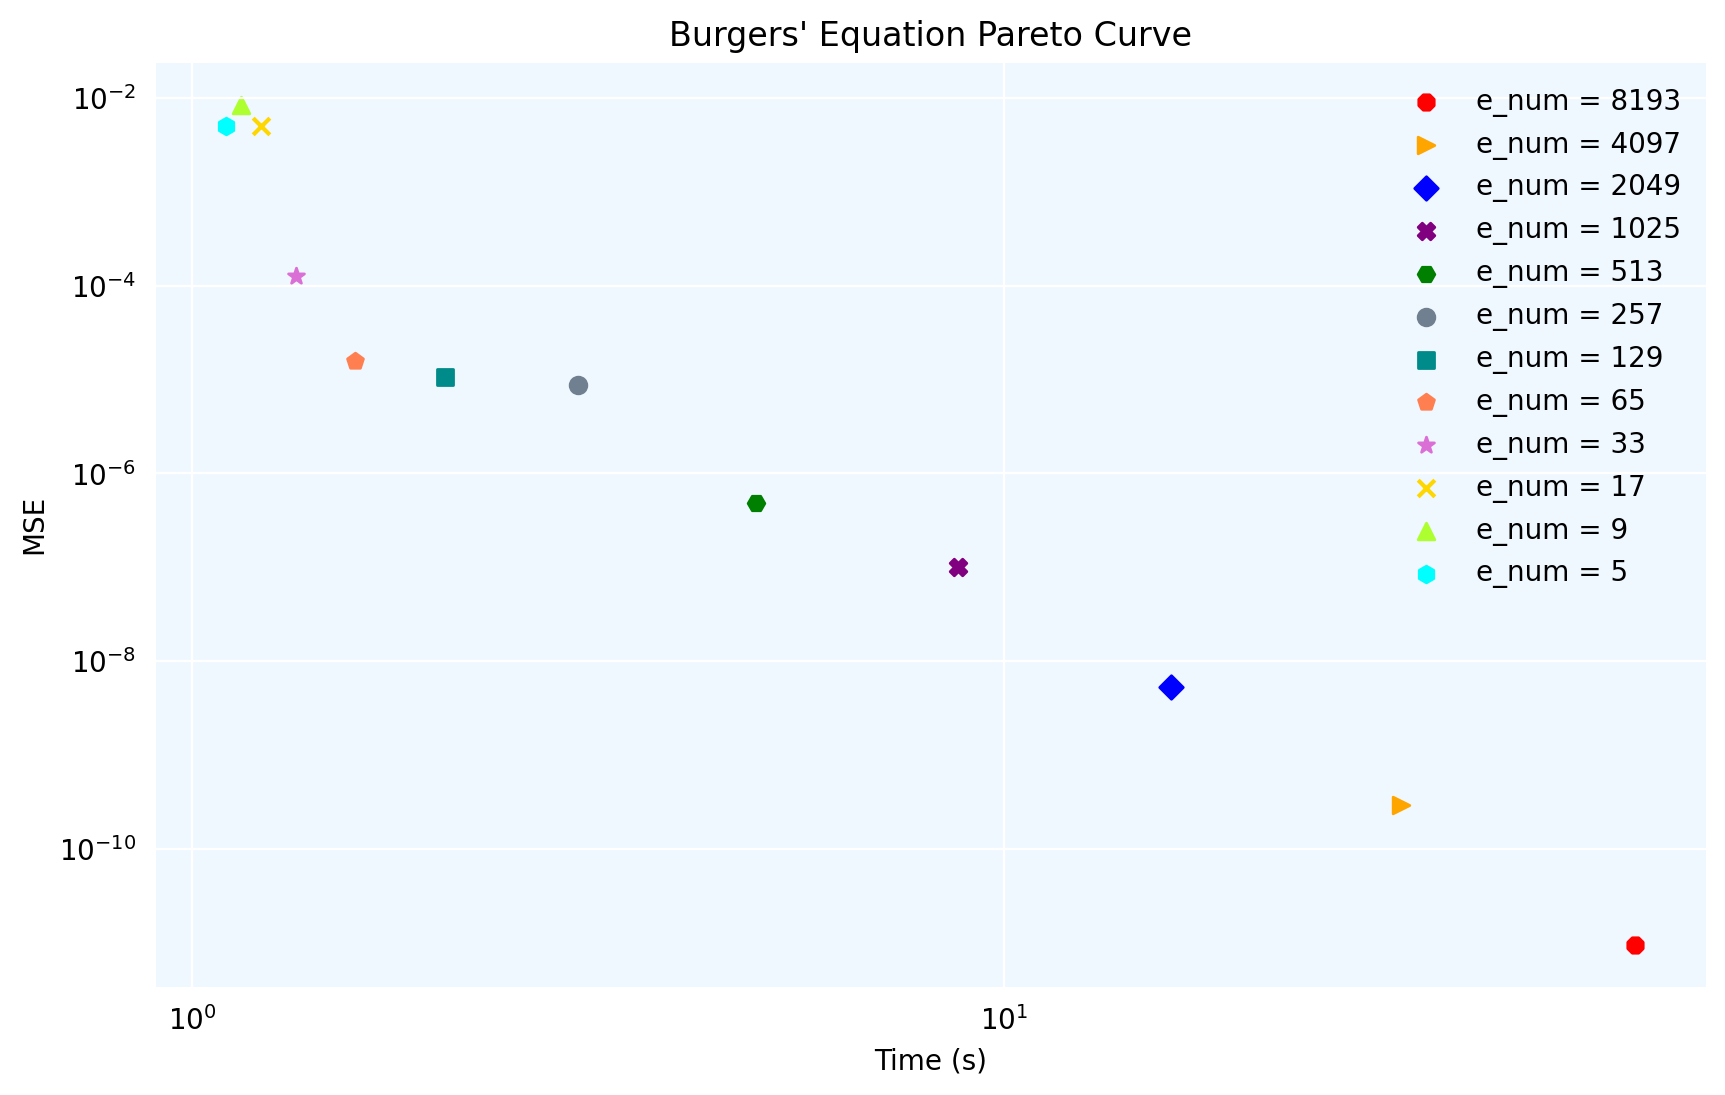

In [57]:
# Create FEniCS data
fig,ax = create_plot()

times_fenics = [59.9866251945495,30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526,2.04935121536254,1.58771944,1.34269523620605,1.213310003,1.147418261,1.101080894]
mse_fenics = [9.69E-12,2.95E-10,5.29E-09,1.02E-07,4.83E-07,8.80e-06,1.07E-05,0.0000158205732871485,0.000126802,0.005016258,0.008452139,0.0049517]
labels_fenics = ['e_num = 8193','e_num = 4097','e_num = 2049','e_num = 1025','e_num = 513','e_num = 257','e_num = 129','e_num = 65','e_num = 33','e_num = 17','e_num = 9','e_num = 5']
markers_fenics = ['8','>','D','X','H','o','s','p','*','x','^','h']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan']
for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    ax.scatter(x, y, color=color, marker=shape,label=label)
    
# CPU results
#times_fenics_cpu = [3.407055616378784,2.345950126647949,1.8304100036621094,1.5094473361968994,1.3566067218780518,1.2851500511169434,1.245417594909668]
#mse_fenics_cpu = [8.80E-06,1.07E-05,1.58E-05,0.000126802,0.005016258,0.008452139,0.0049517]
#ax.plot(times_fenics_cpu,mse_fenics_cpu,label='FEniCS (CPU)',color='hotpink',marker='o')

ax.set_title("Burgers' Equation Pareto Curve")
ax.legend(framealpha=0)

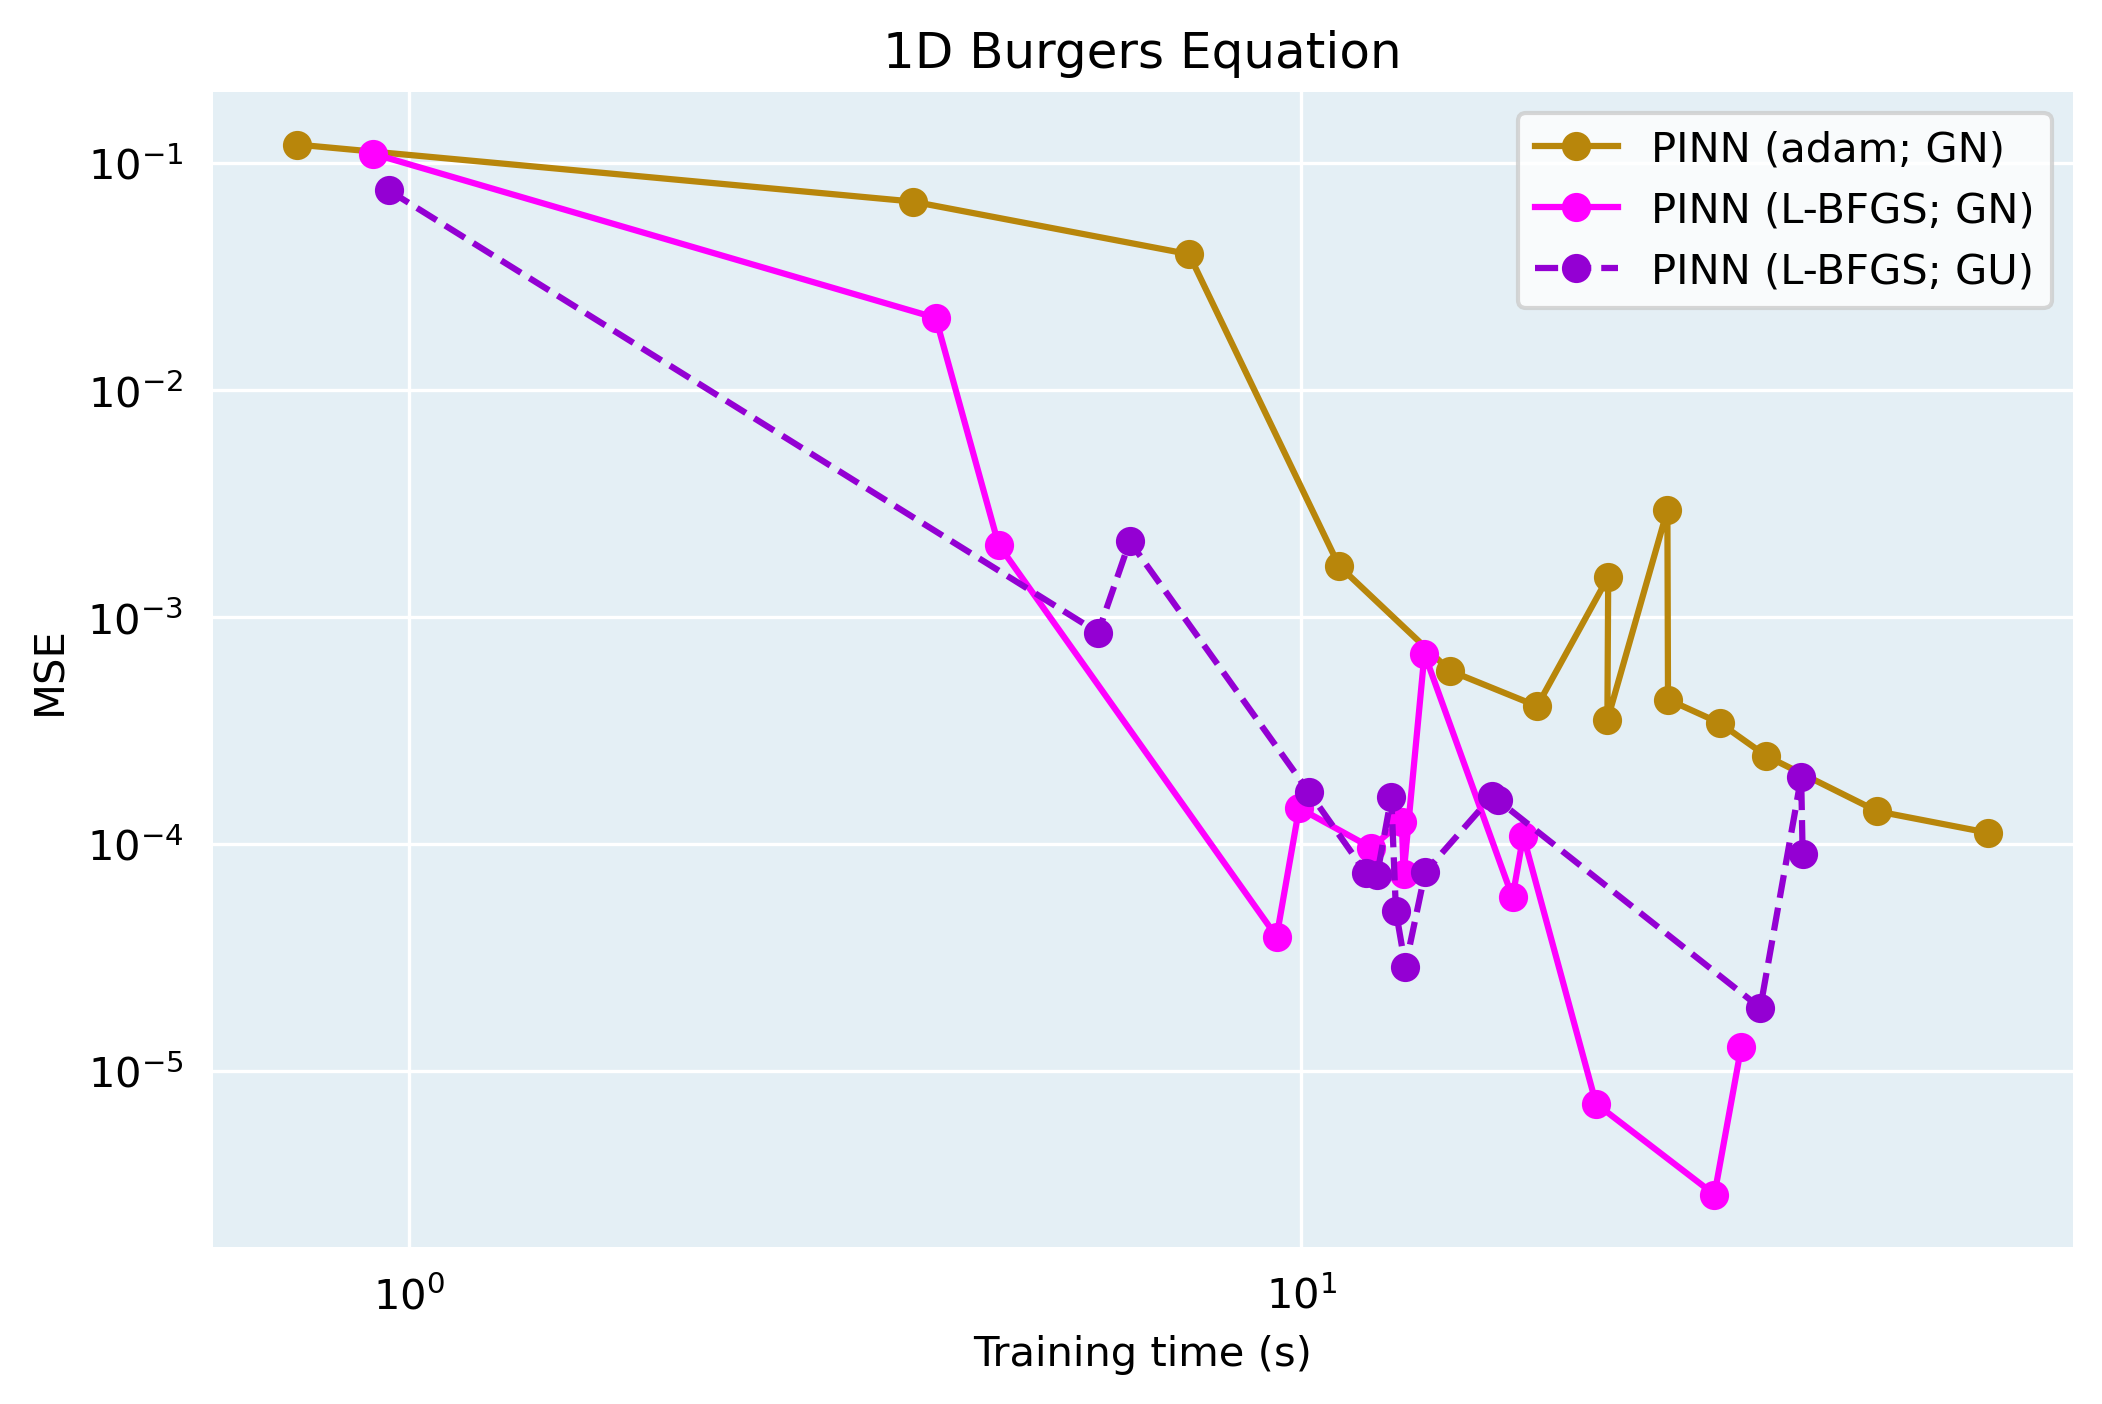

In [6]:
fig,ax = create_plot()

# PINN with adam
times_pinn_adam = [0.749743,3.667864,7.48237,11.021747,14.678907,18.369558,22.067676,22.021291,25.707173,25.748649,29.436362,33.164753,44.183418,58.7822]
mse_pinn_adam = [0.120607341,0.06768261,0.039696095,0.001680476,0.000579744,0.000405323,0.00150196,0.000352311,0.002962653,0.000433381,0.000341411,0.000244663,0.000139517,0.000112237]
ax.plot(times_pinn_adam,mse_pinn_adam,label='PINN (adam; GN)',color='darkgoldenrod',marker='o')

# PINN with L-BFGS-B, Glorot Normal (Xavier Normal)
times_pinn_lbfgs = [0.91177,3.893805,4.578683,9.381281,9.942845,11.970476,12.958448,13.018774,13.73799,17.241901,17.723027,21.387025,29.024792,31.1047]
mse_pinn_lbfgs = [0.109893353,0.020802184,0.002085903,3.91e-05,0.000144161,9.65e-05,0.000125415,7.40E-05,0.000688713,5.83E-05,0.000108639,7.19E-06,2.86E-06,1.28E-05]
ax.plot(times_pinn_lbfgs,mse_pinn_lbfgs,label='PINN (L-BFGS; GN)',color='fuchsia',marker='o')

# PINN with L-BFGS-B, Glorot Uniform (Xavier Uniform)
times_pinn_lbfgs_uniform = [0.950043,5.920131,6.422087,10.191842,11.822431,12.157963,12.611013,12.763678,13.077793,13.763143,16.372855,16.615351,32.670098,36.301488,36.43965]
mse_pinn_lbfgs_uniform = [0.0757241,0.000854667,0.002155735,0.000170091,7.44E-05,7.32E-05,0.000161457,5.05E-05,2.89E-05,7.53E-05,0.000163632,0.000155757,1.90E-05,0.000197306,9.07E-05]
ax.plot(times_pinn_lbfgs_uniform,mse_pinn_lbfgs_uniform,label='PINN (L-BFGS; GU)',color='darkviolet',marker='o',ls='--')

ax.legend()

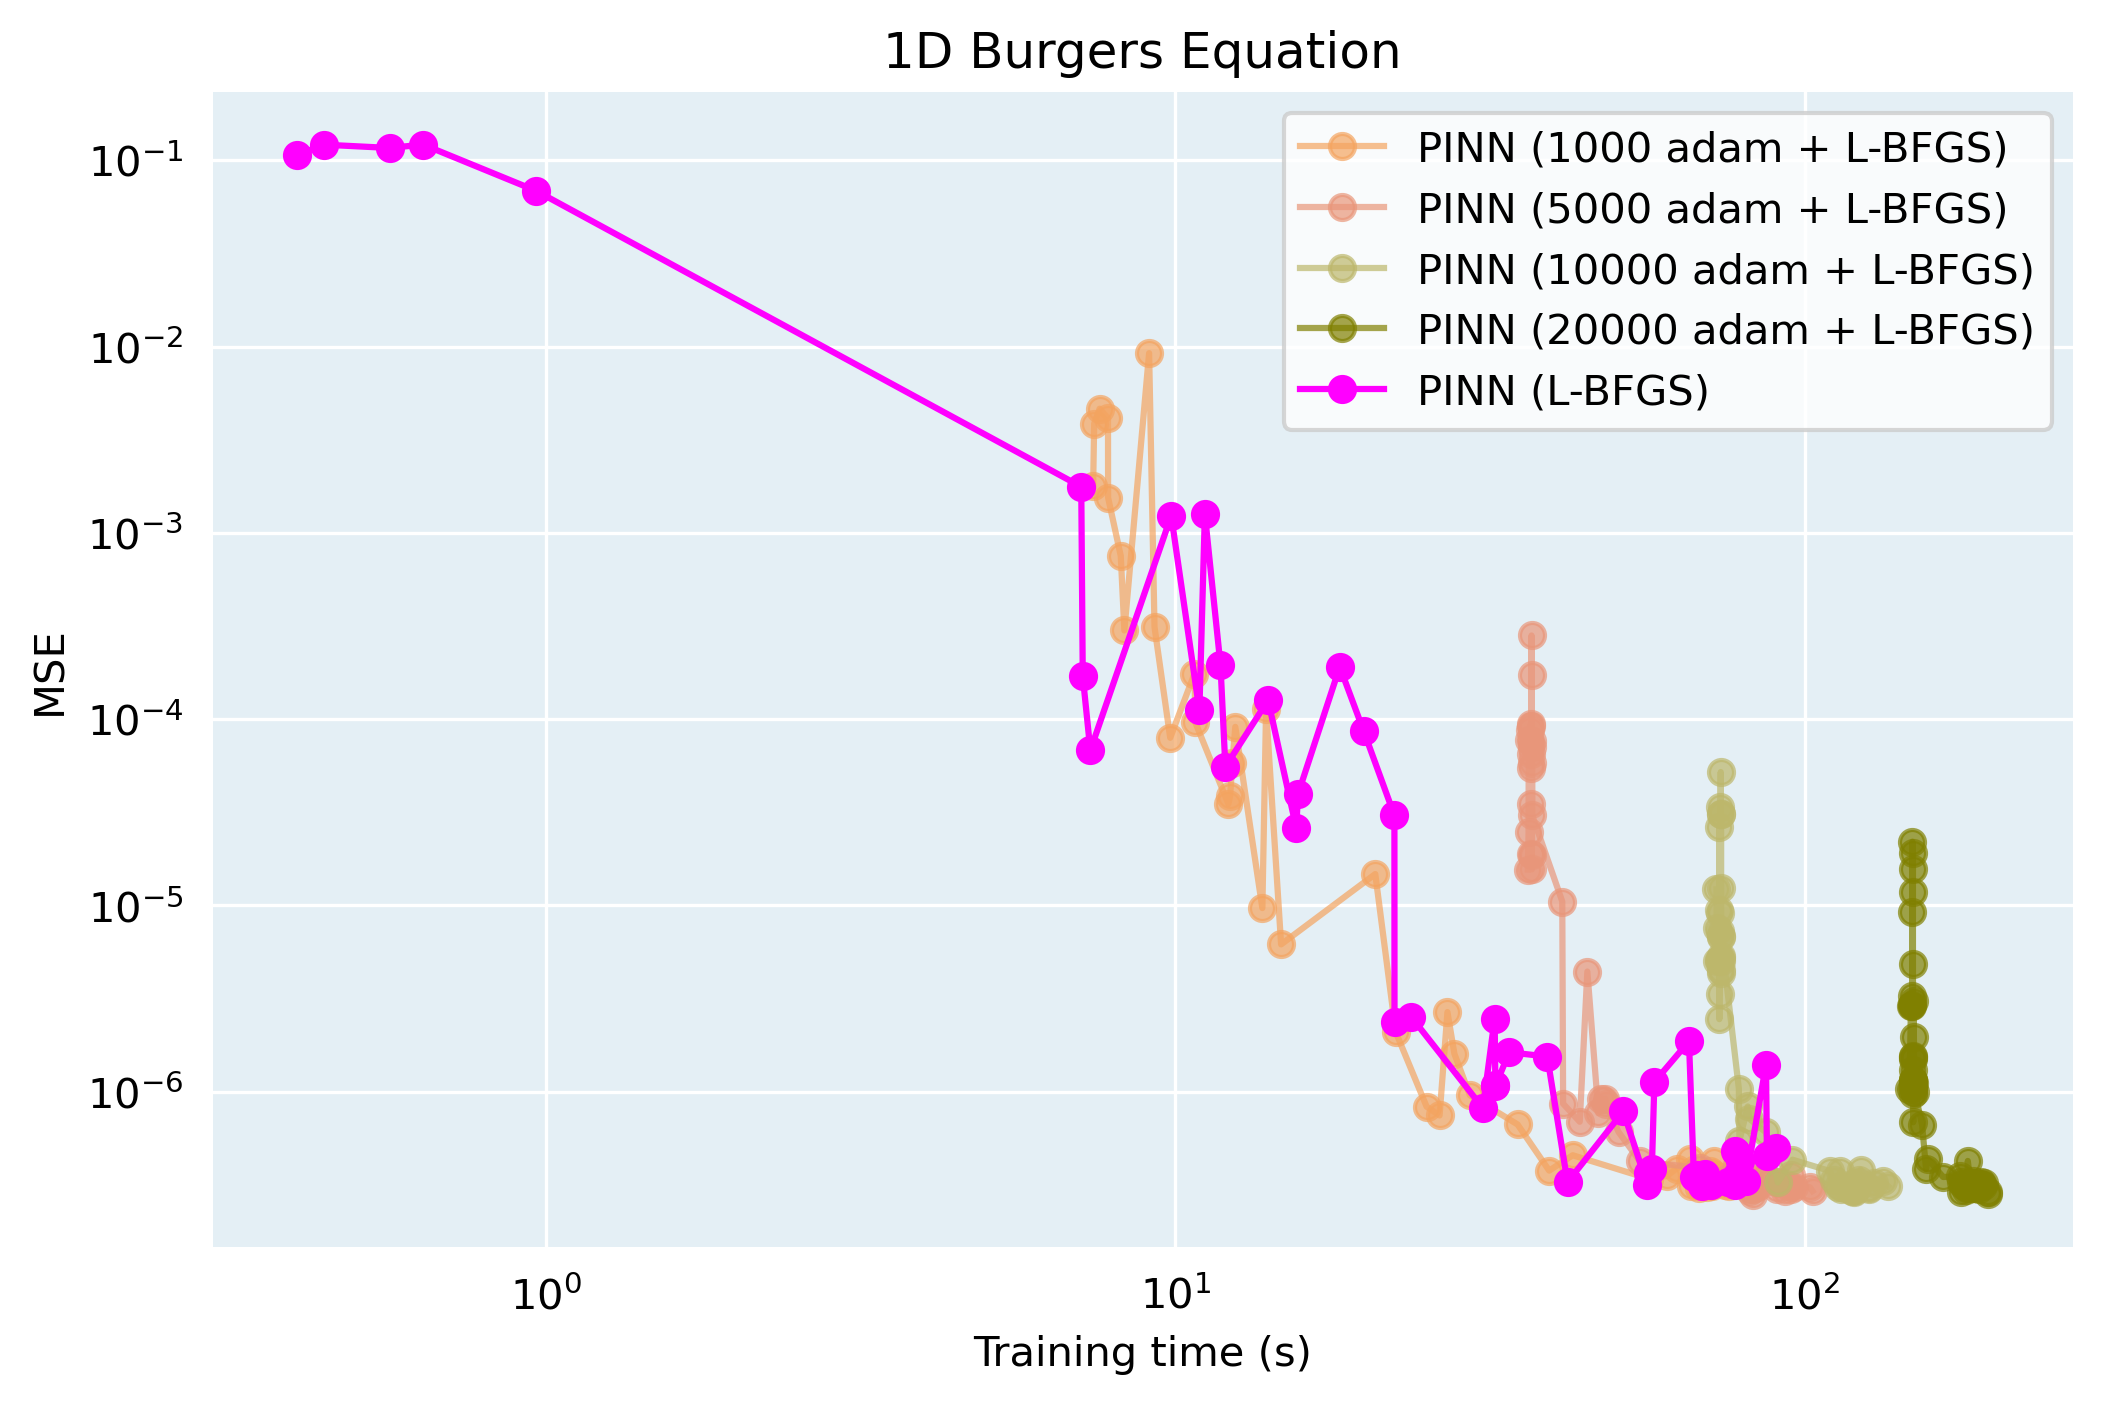

In [21]:
fig,ax = create_plot()

load = np.load('vanilla_times_mses_1000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN (1000 adam + L-BFGS)',color='sandybrown',marker='o',alpha=0.7)

load = np.load('vanilla_times_mses_5000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN (5000 adam + L-BFGS)',color='darksalmon',marker='o',alpha=0.7)

load = np.load('vanilla_times_mses_10000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN (10000 adam + L-BFGS)',color='darkkhaki',marker='o',alpha=0.7)

load = np.load('vanilla_times_mses_20000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN (20000 adam + L-BFGS)',color='olive',marker='o',alpha=0.7)

load = np.load('Data_diff_train/vanilla_times_mses_20000nf100nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN (L-BFGS)',color='fuchsia',marker='o')

ax.legend()

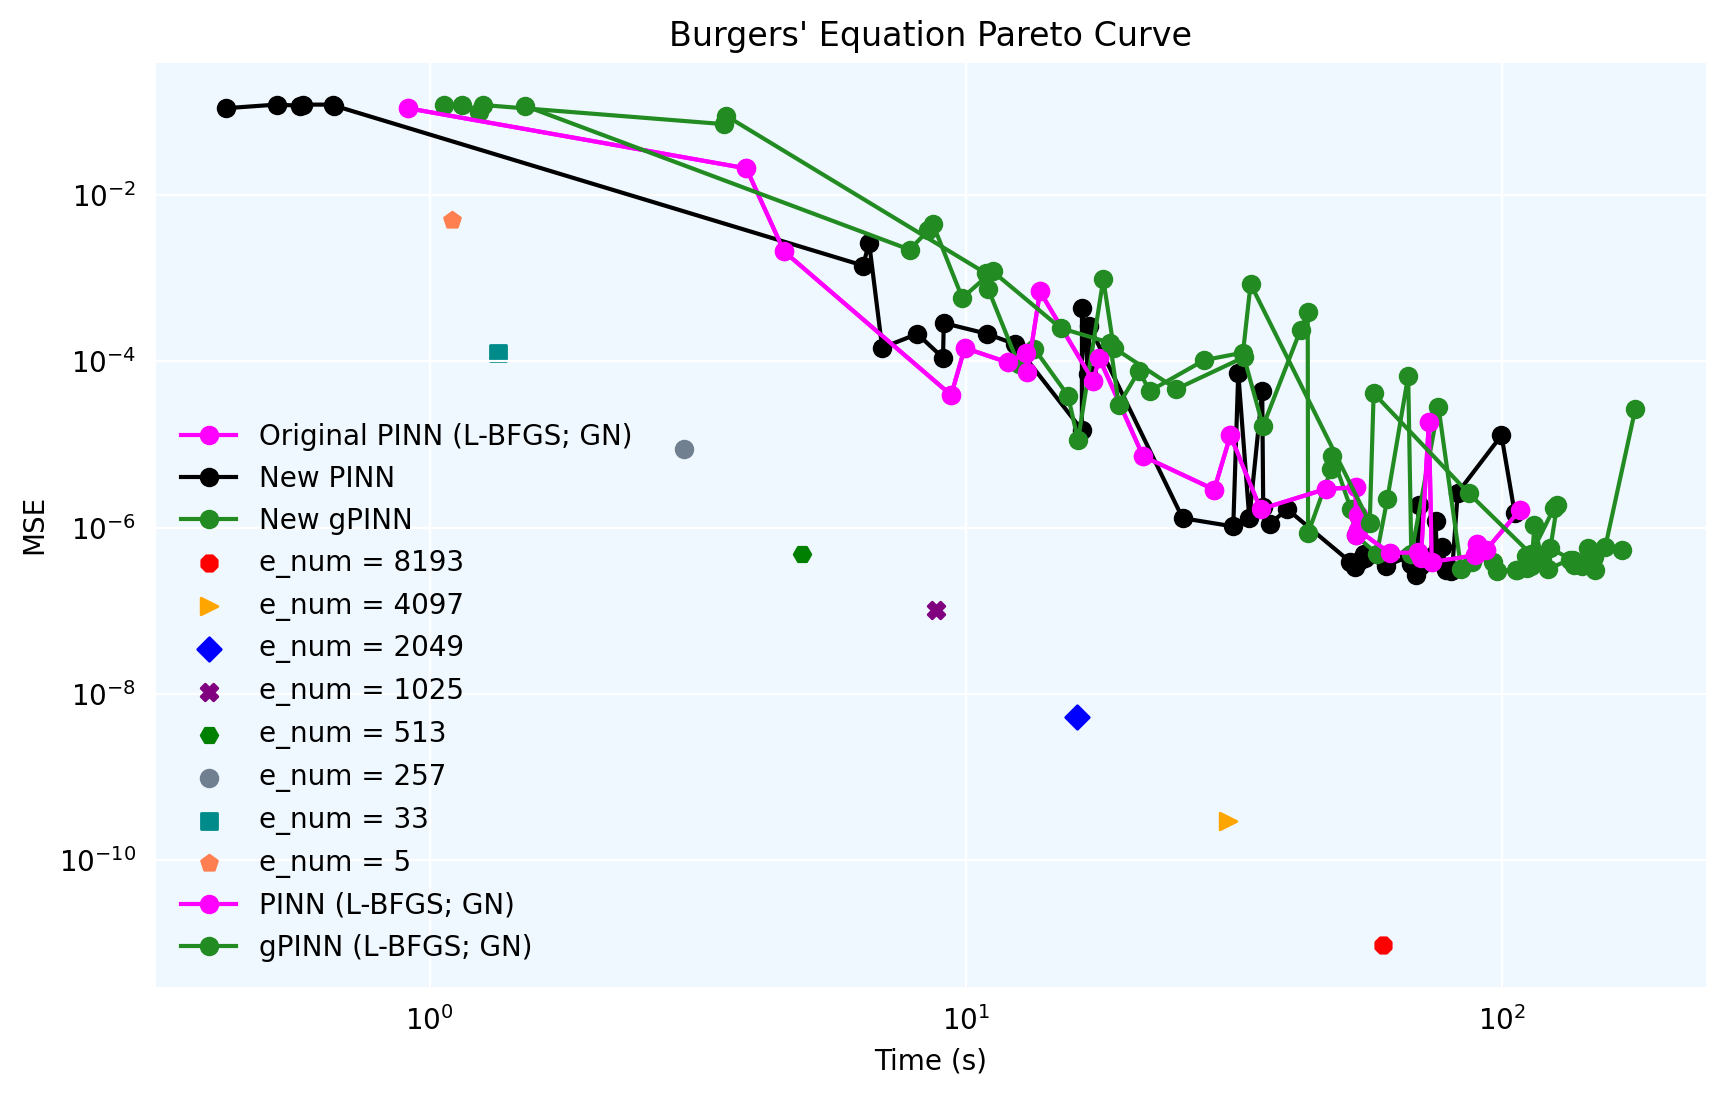

In [6]:
# Create FEniCS data

############# ALL E_NUMS ##########
#times_fenics = [59.9866251945495,30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526,2.04935121536254,1.58771944,1.34269523620605,1.213310003,1.147418261,1.101080894]
#mse_fenics = [9.69E-12,2.95E-10,5.29E-09,1.02E-07,4.83E-07,8.80e-06,1.07E-05,0.0000158205732871485,0.000126802,0.005016258,0.008452139,0.0049517]
#labels_fenics = ['e_num = 8193','e_num = 4097','e_num = 2049','e_num = 1025','e_num = 513','e_num = 257','e_num = 129','e_num = 65','e_num = 33','e_num = 17','e_num = 9','e_num = 5']
###################################

times_fenics = [59.9866251945495,30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526,1.34269523620605,1.101080894]
mse_fenics = [9.69E-12,2.95E-10,5.29E-09,1.02E-07,4.83E-07,8.80e-06,0.000126802,0.0049517]
labels_fenics = ['e_num = 8193','e_num = 4097','e_num = 2049','e_num = 1025','e_num = 513','e_num = 257','e_num = 33','e_num = 5']
markers_fenics = ['8','>','D','X','H','o','s','p','*','x','^','h']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan']
for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    ax.scatter(x, y, color=color, marker=shape,label=label)
   
    
# PINN with L-BFGS-B, Glorot Normal (Xavier Normal)
times_pinn_lbfgs = [0.91177,3.893805,4.578683,9.381281,9.942845,11.970476,12.958448,13.018774,13.73799,17.241901,17.723027,21.387025,29.024792,31.1047,35.415687,46.942523,53.23241,53.386,53.822927,53.847763,61.734428,69.753677,70.502201,72.939068,73.873481,88.999372,89.242423,89.582033,93.066459,107.866896,]
mse_pinn_lbfgs = [0.109893353,0.020802184,0.002085903,3.91e-05,0.000144161,9.65e-05,0.000125415,7.40E-05,0.000688713,5.83E-05,0.000108639,7.19E-06,2.86E-06,1.28E-05,1.66E-06,2.92E-06,3.03E-06,8.05E-07,1.41E-06,9.25E-07,4.92E-07,5.04E-07,4.36E-07,1.84E-05,3.85E-07,4.64E-07,4.80E-07,6.27E-07,5.30E-07,1.63E-06]
ax.plot(times_pinn_lbfgs,mse_pinn_lbfgs,label='PINN (L-BFGS; GN)',color='fuchsia',marker='o')
iterations_pinn_lbfgs = [74,236,282,548,585,704,749,751,782,976,1000,1216,1640,1740,2000,2554,3000,3000,3000,3000,3521,3865,4000,4000,4184,5000,5000,5000,5000,5000]

# gPINN 
times_gpinn = [1.502428,7.847788,8.50502,8.667343,9.840814,11.205884,15.00827,18.5615,19.261341,21.006845,22.007765,27.821814,32.838319,33.92621,56.585406,57.545522,86.51828,113.13,124.869226,126.489133,122.887231,139.274479,140.689167,144.166719,166.918026]
mse_gpinn = [0.117996493,0.002195709,0.003738456,0.004516308,0.000576449,0.001204766,0.000250064,0.0001661,2.99E-05,7.63E-05,4.38E-05,0.000103129,0.000126632,0.000848189,1.14E-06,4.12E-05,2.59E-06,4.78E-07,1.73E-06,1.85E-06,5.66E-07,3.62E-07,3.42E-07,5.60E-07,5.44E-07]
ax.plot(times_gpinn,mse_gpinn,label='gPINN (L-BFGS; GN)',color='forestgreen',marker='o')
iterations_gpinn = [58,295,314,321,359,413,548,669,690,755,788,1000,1141,1167,2000,2000,3000,4000,4252,4252,4329,4901,4901,5000,5684]

ax.legend(framealpha=0)
fig

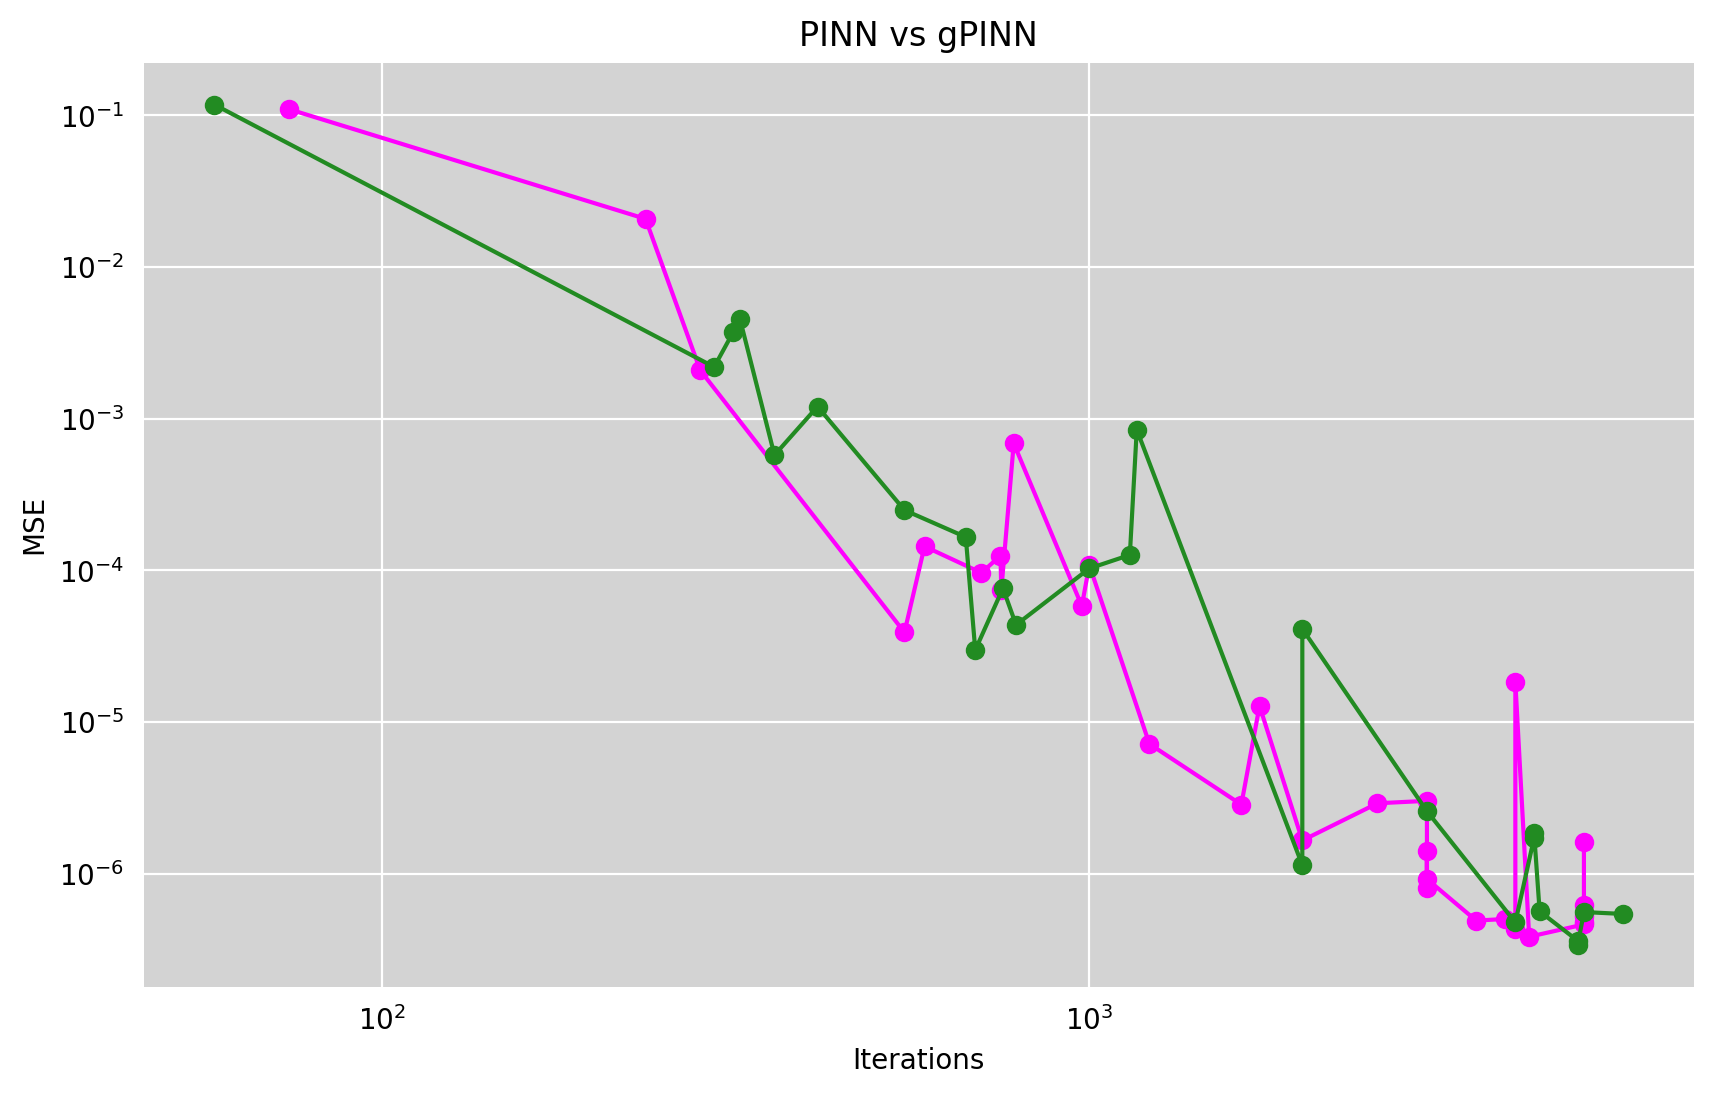

In [8]:
fig,ax = plt.subplots(figsize=(10,6),dpi=200)
ax.grid(color='white')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_facecolor("lightgray")
ax.set_title("PINN vs gPINN")
ax.set_xlabel("Iterations")
ax.set_ylabel("MSE")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom = False,left = False)
ax.tick_params(axis='x', which='minor', bottom=False, 
               top=False, labelbottom=True) 
ax.tick_params(axis='y', which='minor', right=False, 
               left=False, labelleft=True) 

ax.plot(iterations_pinn_lbfgs,mse_pinn_lbfgs,label='PINN (L-BFGS; GN)',color='fuchsia',marker='o')
ax.plot(iterations_gpinn,mse_gpinn,label='gPINN (L-BFGS; GN)',color='forestgreen',marker='o')

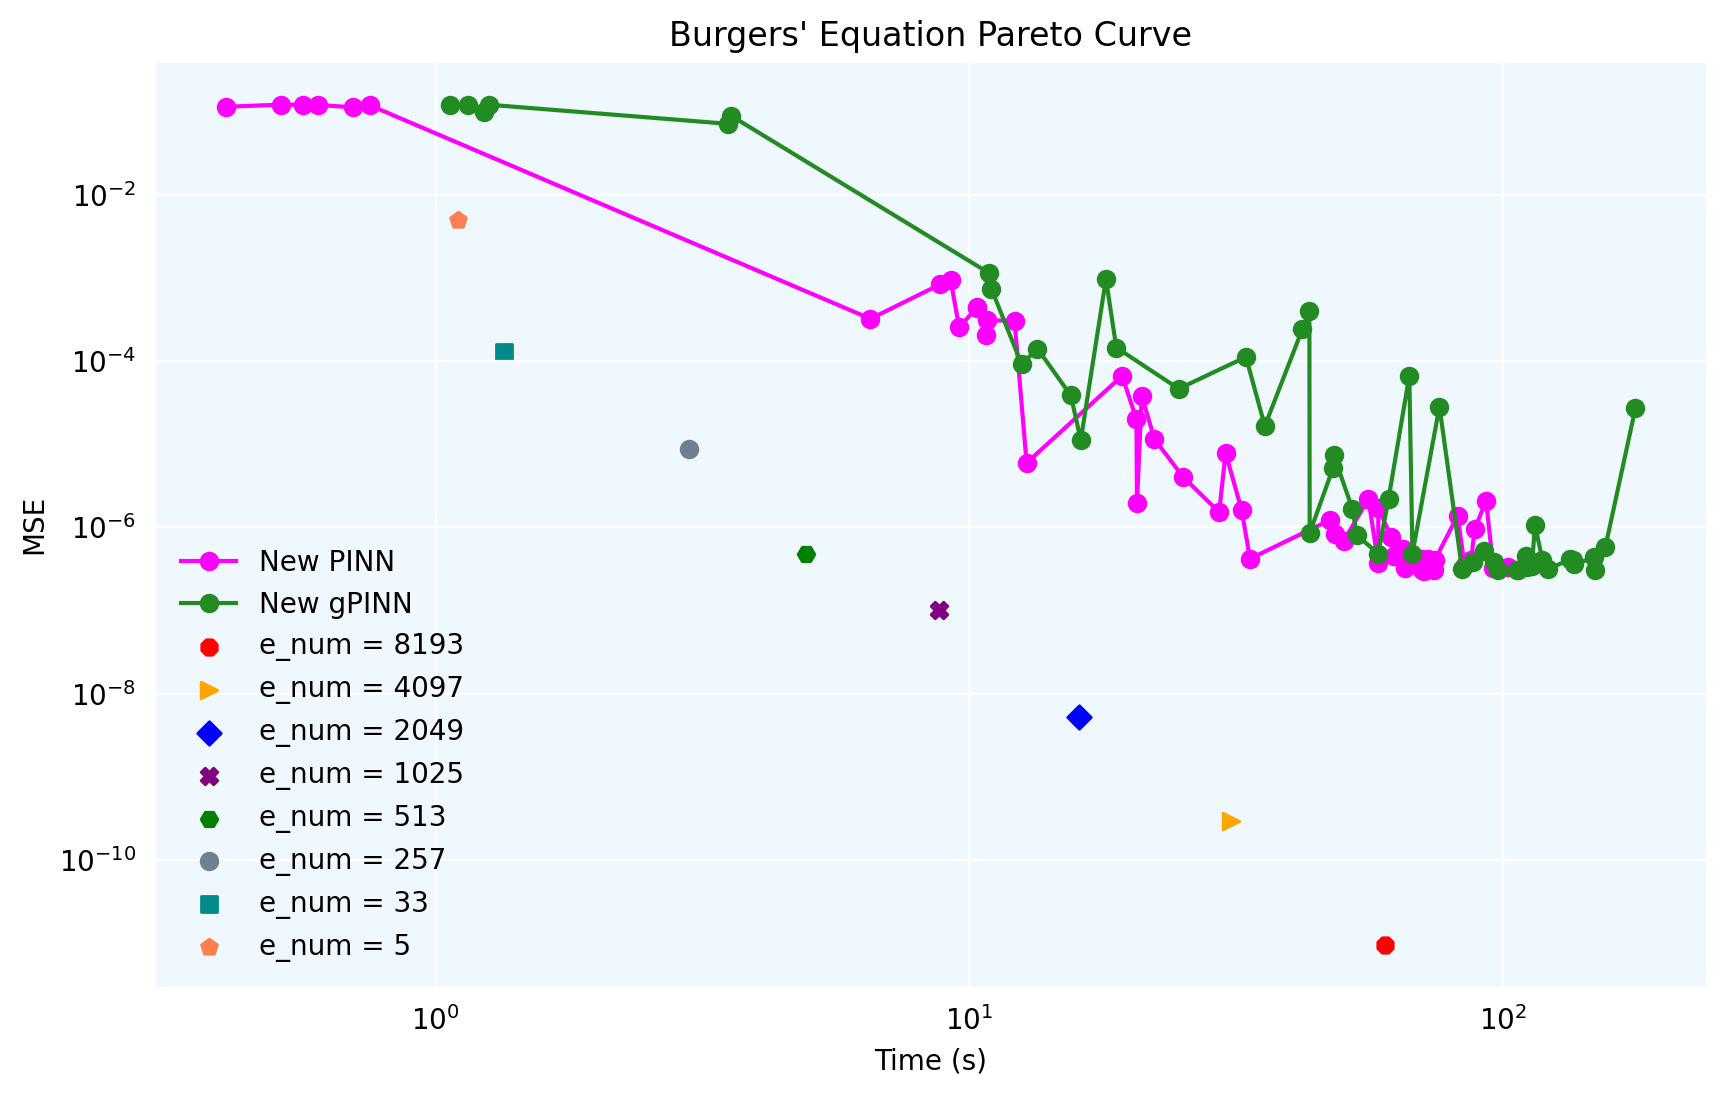

In [51]:
load = np.load('vanilla_times_mses2.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New PINN',color='fuchsia',marker='o')

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New gPINN',color='forestgreen',marker='o')

times_fenics = [59.9866251945495,30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526,1.34269523620605,1.101080894]
mse_fenics = [9.69E-12,2.95E-10,5.29E-09,1.02E-07,4.83E-07,8.80e-06,0.000126802,0.0049517]
labels_fenics = ['e_num = 8193','e_num = 4097','e_num = 2049','e_num = 1025','e_num = 513','e_num = 257','e_num = 33','e_num = 5']
markers_fenics = ['8','>','D','X','H','o','s','p','*','x','^','h']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan']
for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    ax.scatter(x, y, color=color, marker=shape,label=label)
    
ax.legend(framealpha=0)
fig
#print(np.mean(mses)-np.mean(mse_pinn_lbfgs))

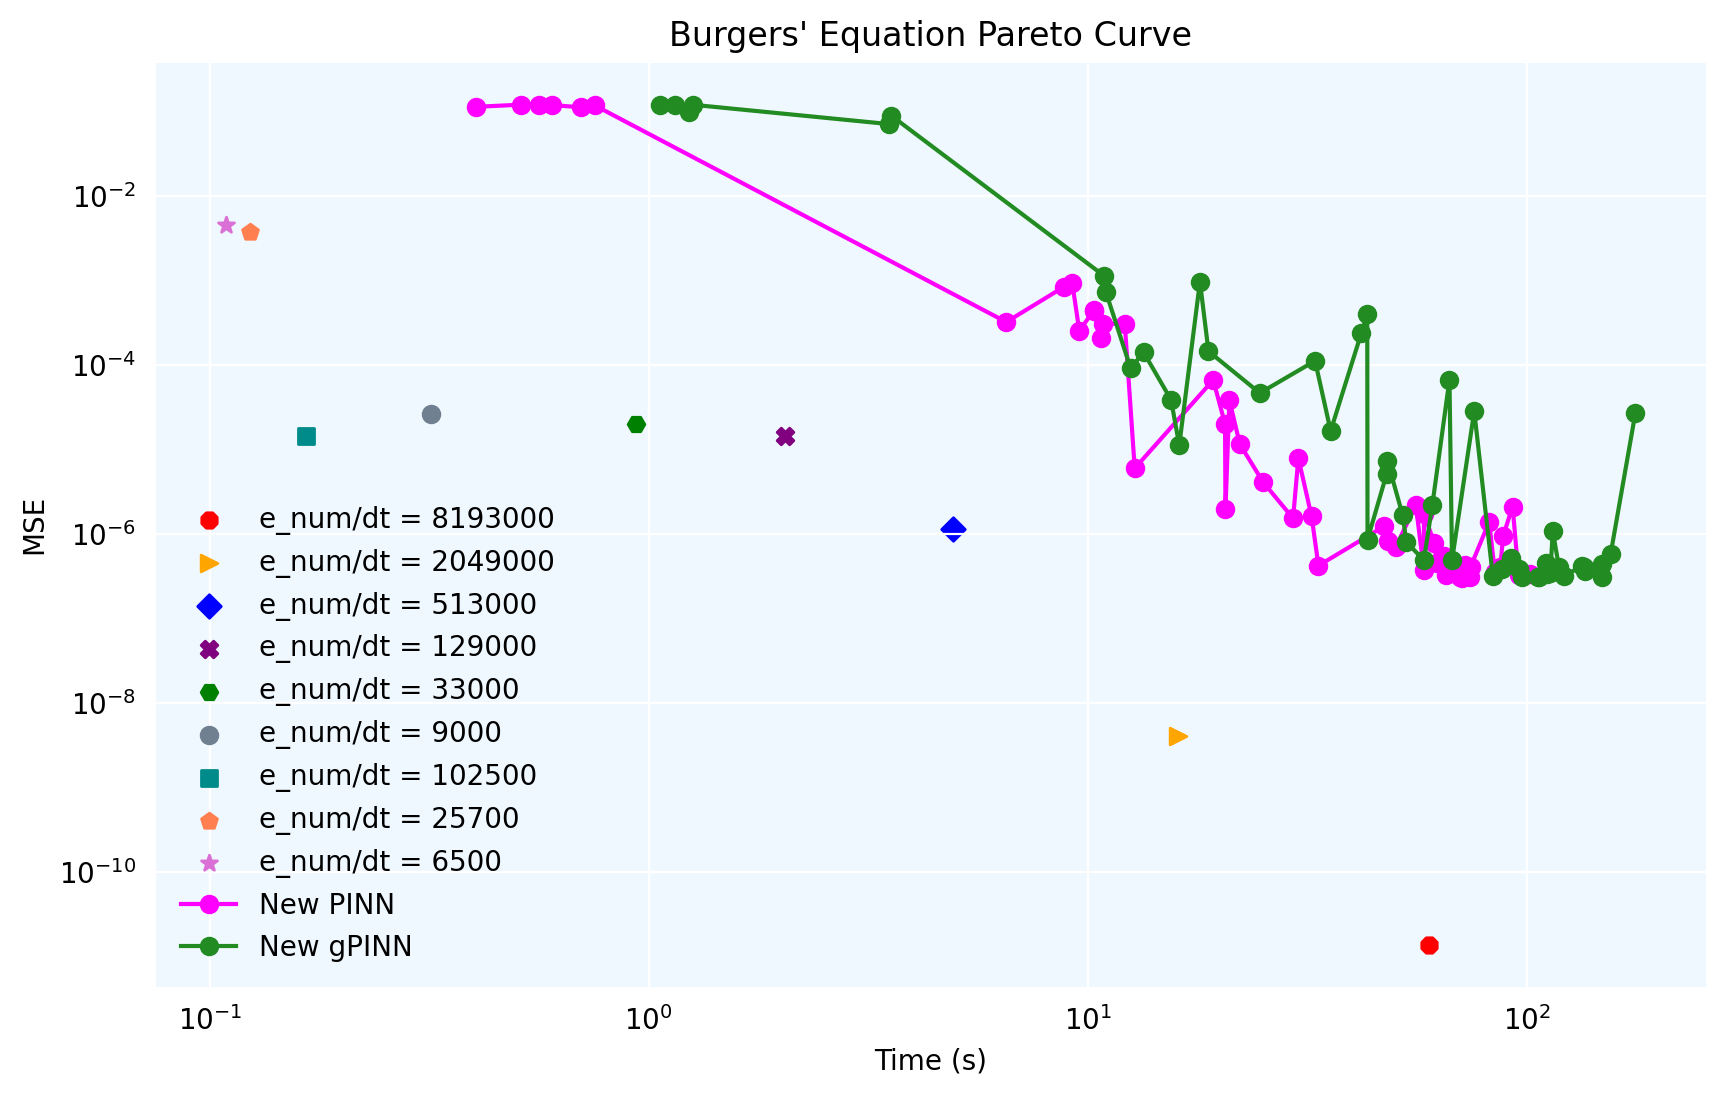

In [56]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

# Create FEniCS data
#times_fenics = [59.9866251945495,30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526,2.04935121536254,1.58771944,0.935578823,0.520414829,0.319884539,0.217564106,0.165743112564086,0.140399456024169,0.123669147491455,0.117711305618286,0.109034776687622]
#mse_fenics = [1.37E-11,2.11E-10,4.04E-09,8.14E-08,1.14E-06,1.58E-05,1.44E-05,1.44E-05,1.97E-05,3.19E-05,2.59E-05,4.00E-05,1.44E-05,0.000108454,0.00372555,0.007740559,0.004554599]
# Every other
times_fenics = [59.9866251945495,16.0761799812316,4.94502711296081,2.04935121536254,0.935578823,0.319884539,0.165743112564086,0.123669147491455,0.109034776687622]
mse_fenics = [1.37E-11,4.04E-09,1.14E-06,1.44E-05,1.97E-05,2.59E-05,1.44E-05,0.00372555,0.004554599]
labels_fenics = ['e_num/dt = 8193000','e_num/dt = 2049000','e_num/dt = 513000','e_num/dt = 129000','e_num/dt = 33000','e_num/dt = 9000','e_num/dt = 102500','e_num/dt = 25700','e_num/dt = 6500','e_num/dt = 1700','e_num/dt = 500']
markers_fenics = ['8','>','D','X','H','o','s','p','*','x','^','h','8','>','D','X','H','o','s','p','*']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold']
for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    ax.scatter(x, y, color=color, marker=shape,label=label)
    
load = np.load('vanilla_times_mses2.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New PINN',color='fuchsia',marker='o')

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New gPINN',color='forestgreen',marker='o')
    
ax.legend(framealpha=0)

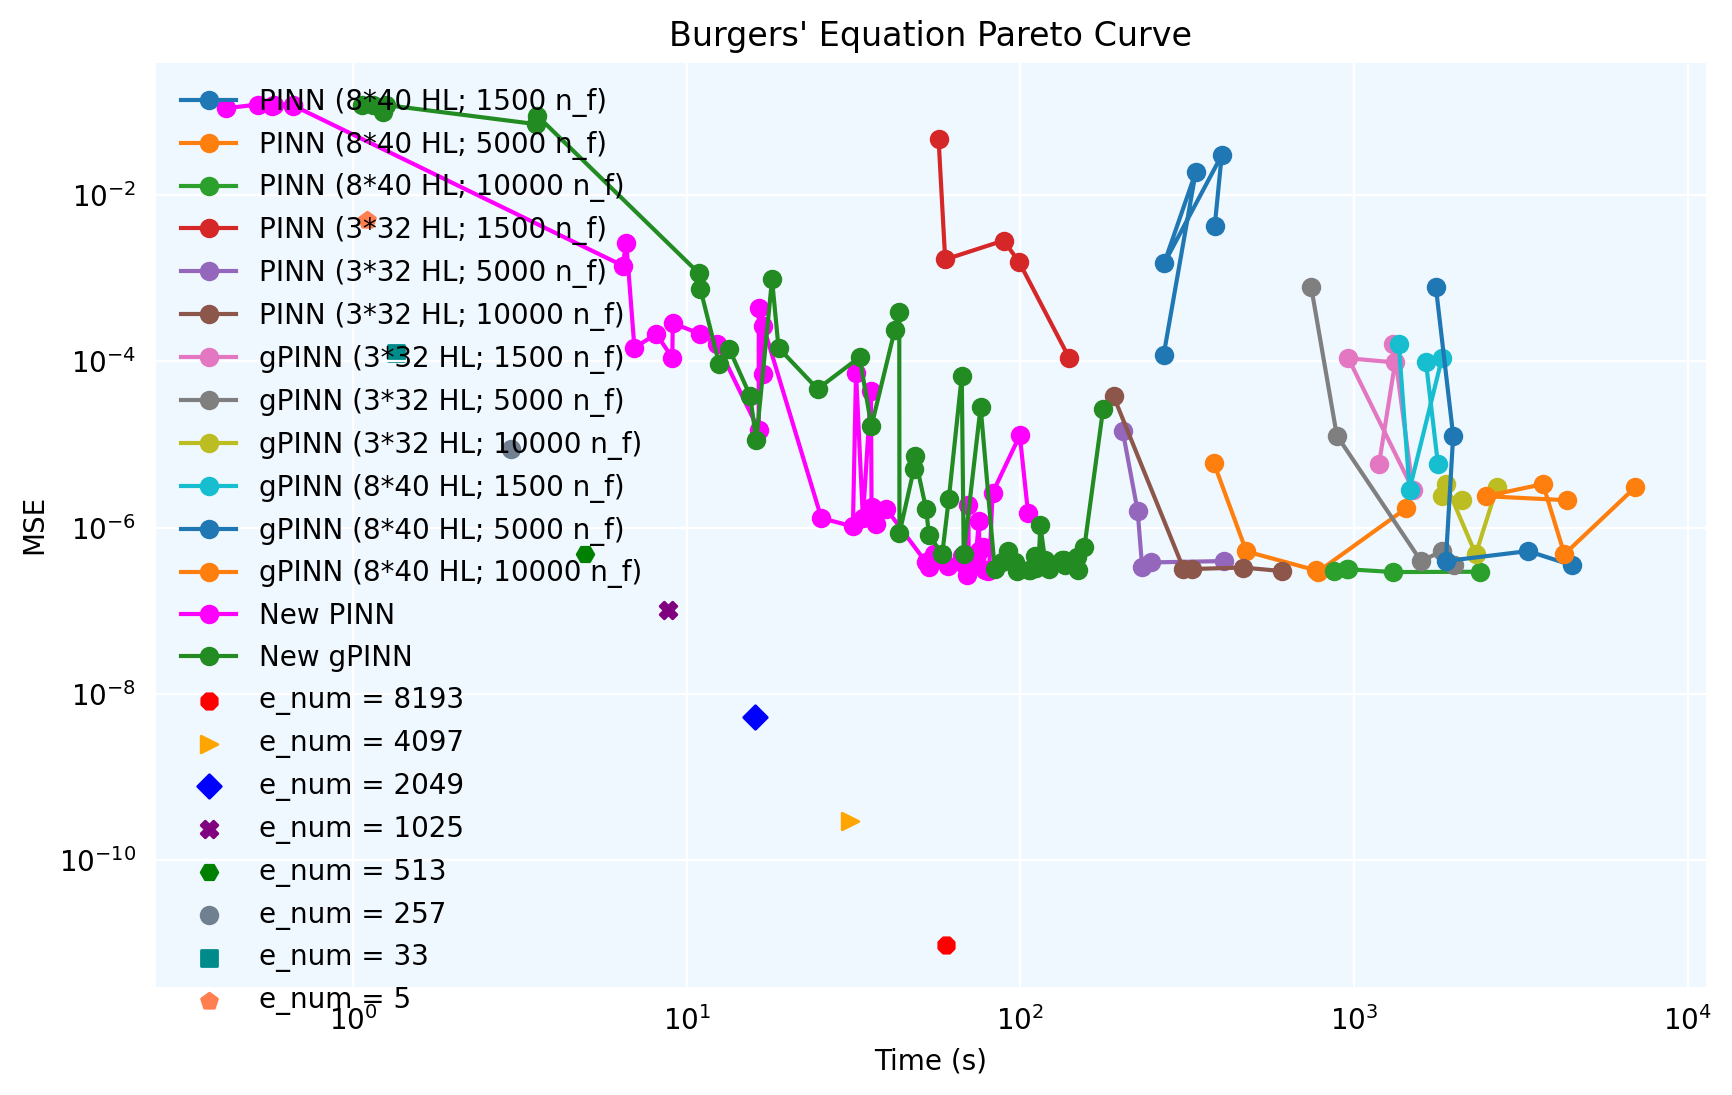

In [44]:
domain_nums = [1500,5000,10000]
epoch_nums=[0,1000,5000,10000,20000]

mses_pinn_myarch = np.load('mses_pinn_myarch.npy')
mses_pinn_theirarch = np.load('mses_pinn_theirarch.npy')
mses_gpinn_theirarch = np.load('mses_gpinn_theirarch.npy')
mses_gpinn_myarch = np.load('mses_gpinn_theirarch.npy')

times_pinn_myarch = np.load('times_pinn_myarch.npy')
times_pinn_theirarch = np.load('times_pinn_theirarch.npy')
times_gpinn_theirarch = np.load('times_gpinn_theirarch.npy')
times_gpinn_myarch = np.load('times_gpinn_myarch.npy')

mses_pinn_myarch = np.split(mses_pinn_myarch,3) # split into 3 parts, for # domain points
mses_pinn_theirarch = np.split(mses_pinn_theirarch,3)
mses_gpinn_theirarch = np.split(mses_gpinn_theirarch,3)
mses_gpinn_myarch = np.split(mses_gpinn_myarch,3)

times_pinn_myarch = np.split(times_pinn_myarch,3) # each of 3 elements has 5 elements
times_pinn_theirarch = np.split(times_pinn_theirarch,3)
times_gpinn_theirarch = np.split(times_gpinn_theirarch,3)
times_gpinn_myarch = np.split(times_gpinn_myarch,3)

for i in range(3):
    ax.plot(times_pinn_myarch[i],mses_pinn_myarch[i],label=f'PINN (8*40 HL; {domain_nums[i]} n_f)',marker='o')
for i in range(3):
    ax.plot(times_pinn_theirarch[i],mses_pinn_theirarch[i],label=f'PINN (3*32 HL; {domain_nums[i]} n_f)',marker='o')
for i in range(3):
    ax.plot(times_gpinn_theirarch[i],mses_gpinn_theirarch[i],label=f'gPINN (3*32 HL; {domain_nums[i]} n_f)',marker='o')
for i in range(3):
    ax.plot(times_gpinn_myarch[i],mses_gpinn_myarch[i],label=f'gPINN (8*40 HL; {domain_nums[i]} n_f)',marker='o')
    
    
load = np.load('vanilla_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New PINN',color='fuchsia',marker='o')

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New gPINN',color='forestgreen',marker='o')

times_fenics = [59.9866251945495,30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526,1.34269523620605,1.101080894]
mse_fenics = [9.69E-12,2.95E-10,5.29E-09,1.02E-07,4.83E-07,8.80e-06,0.000126802,0.0049517]
labels_fenics = ['e_num = 8193','e_num = 4097','e_num = 2049','e_num = 1025','e_num = 513','e_num = 257','e_num = 33','e_num = 5']
markers_fenics = ['8','>','D','X','H','o','s','p','*','x','^','h']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan']
for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    ax.scatter(x, y, color=color, marker=shape,label=label)
        
    

    
    
ax.legend(framealpha=0)
fig

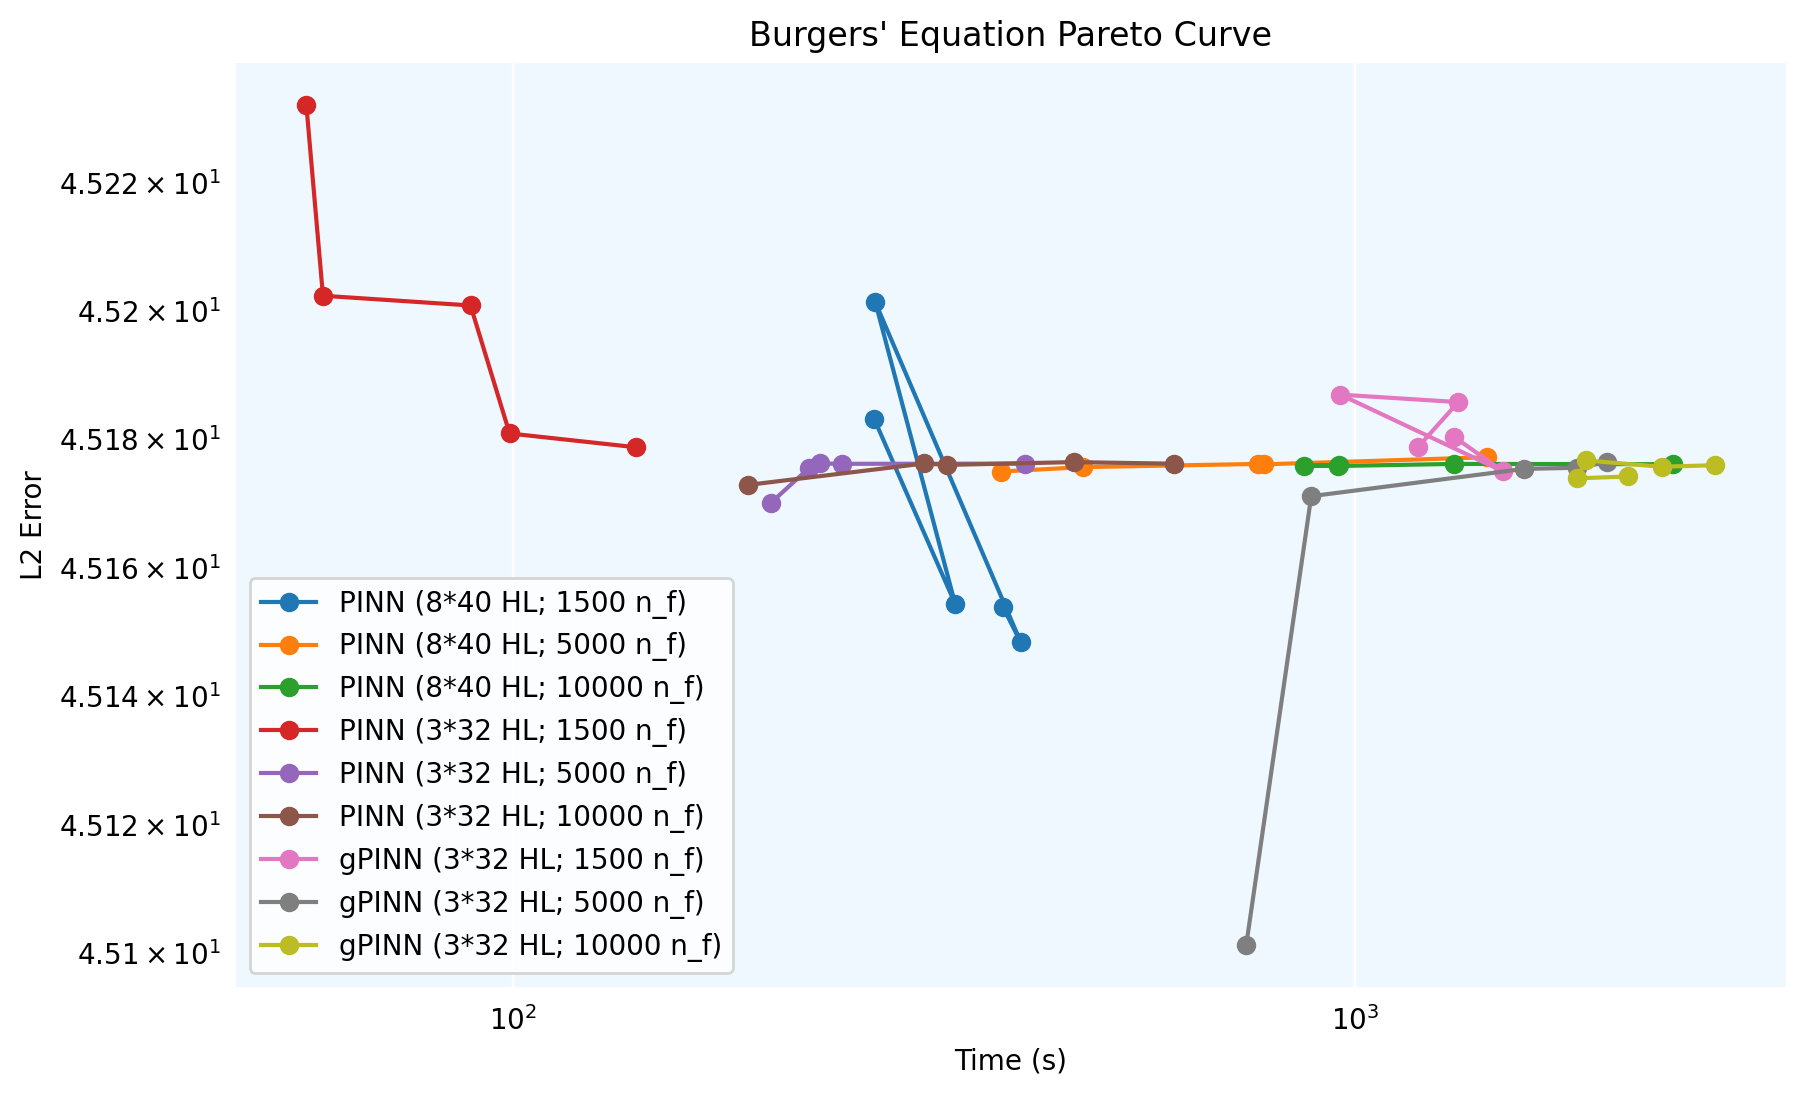

In [17]:
domain_nums = [1500,5000,10000]
epoch_nums=[0,1000,5000,10000,20000]

l2_pinn_myarch = np.load('l2_errors_pinn_myarch.npy')
l2_pinn_theirarch = np.load('l2_errors_pinn_theirarch.npy')
l2_gpinn_theirarch = np.load('l2_errors_gpinn_theirarch.npy')

times_pinn_myarch = np.load('times_pinn_myarch.npy')
times_pinn_theirarch = np.load('times_pinn_theirarch.npy')
times_gpinn_theirarch = np.load('times_gpinn_theirarch.npy')

l2_pinn_myarch = np.split(l2_pinn_myarch,3) # split into 3 parts, for # domain points
l2_pinn_theirarch = np.split(l2_pinn_theirarch,3)
l2_gpinn_theirarch = np.split(l2_gpinn_theirarch,3)

times_pinn_myarch = np.split(times_pinn_myarch,3) # each of 3 elements has 5 elements
times_pinn_theirarch = np.split(times_pinn_theirarch,3)
times_gpinn_theirarch = np.split(times_gpinn_theirarch,3)




fig,ax = plt.subplots(figsize=(10,6),dpi=200)
ax.grid(color='white')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_facecolor("aliceblue")
ax.set_title("Burgers' Equation Pareto Curve")
ax.set_xlabel("Time (s)")
ax.set_ylabel("L2 Error")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom = False,left = False)
ax.tick_params(axis='x', which='minor', bottom=False, 
               top=False, labelbottom=True) 
ax.tick_params(axis='y', which='minor', right=False, 
               left=False, labelleft=True) 


for i in range(3):
    ax.plot(times_pinn_myarch[i],l2_pinn_myarch[i],label=f'PINN (8*40 HL; {domain_nums[i]} n_f)',marker='o')
for i in range(3):
    ax.plot(times_pinn_theirarch[i],l2_pinn_theirarch[i],label=f'PINN (3*32 HL; {domain_nums[i]} n_f)',marker='o')
for i in range(3):
    ax.plot(times_gpinn_theirarch[i],l2_gpinn_theirarch[i],label=f'gPINN (3*32 HL; {domain_nums[i]} n_f)',marker='o')
ax.legend()

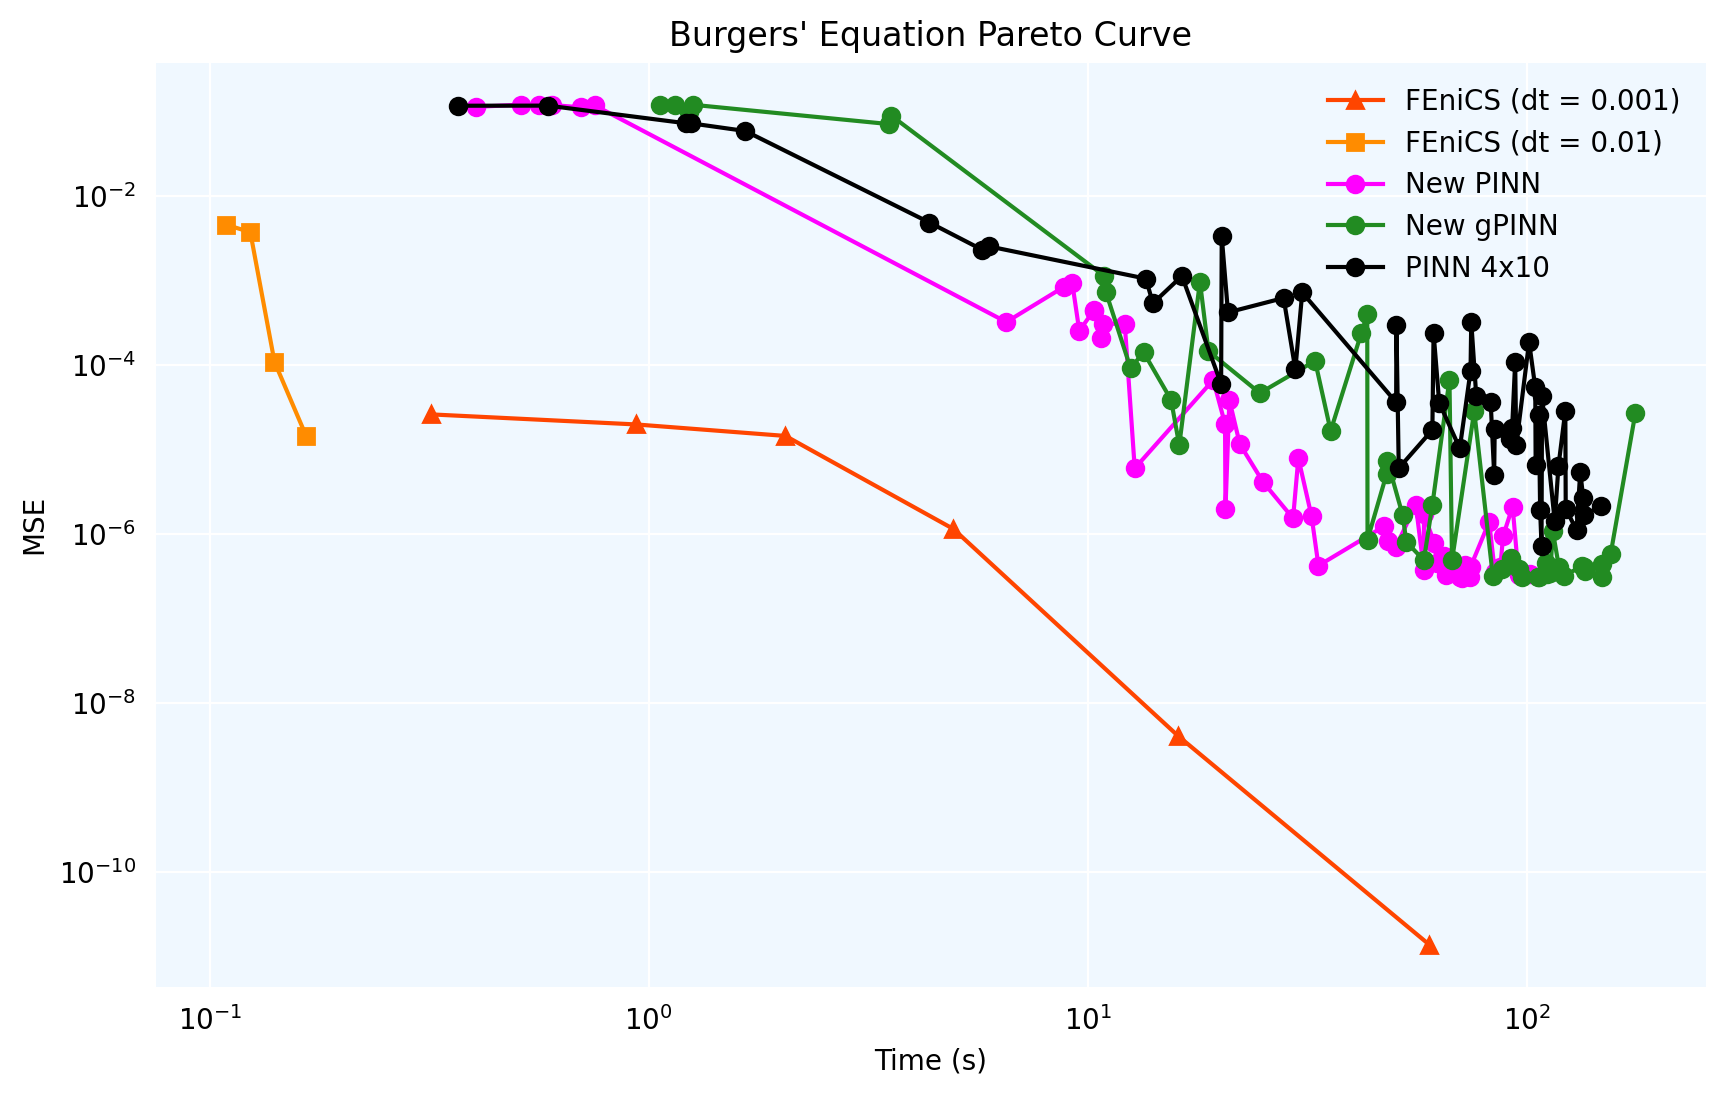

In [107]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

# Create FEniCS data
times_fenics = [59.9866251945495,16.0761799812316,4.94502711296081,2.04935121536254,0.935578823,0.319884539,0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics = [1.37E-11,4.04E-09,1.14E-06,1.44E-05,1.97E-05,2.59E-05,1.44E-05,0.000108454,0.00372555,0.004554599]
labels_fenics = ['n = 8193, dt = 0.001','e_num/dt = 2049000','e_num/dt = 513000','e_num/dt = 129000','e_num/dt = 33000','e_num/dt = 9000','e_num/dt = 102500','e_num/dt = 25700','e_num/dt = 6500','e_num/dt=3300','e_num/dt = 1700','e_num/dt = 500']
markers_fenics = ['^','^','^','^','^','^','s','s','s','s','^','h','8','>','D','X','H','o','s','s','s']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold']
#for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    #ax.scatter(x, y, color=color, marker=shape,label=label)
ax.plot(times_fenics[0:6],mse_fenics[0:6],label="FEniCS (dt = 0.001)",color='orangered',marker='^')
ax.plot(times_fenics[6:],mse_fenics[6:],label="FEniCS (dt = 0.01)",color='darkorange',marker='s')
    
load = np.load('vanilla_times_mses2.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New PINN',color='fuchsia',marker='o')

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='New gPINN',color='forestgreen',marker='o')


######### NEURON, LAYERS VARIANTS #########
load = np.load('vanilla_times_mses_2x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 2x10',color='black',marker='o')

load = np.load('vanilla_times_mses_2x20.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 2x20',color='gray',marker='o')

load = np.load('vanilla_times_mses_2x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 2x40',color='white',marker='o')

load = np.load('vanilla_times_mses_2x60.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 2x60',color='navy',marker='o')

load = np.load('vanilla_times_mses_4x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 4x10',color='black',marker='o')


#############################################
    
    
ax.legend(framealpha=0)

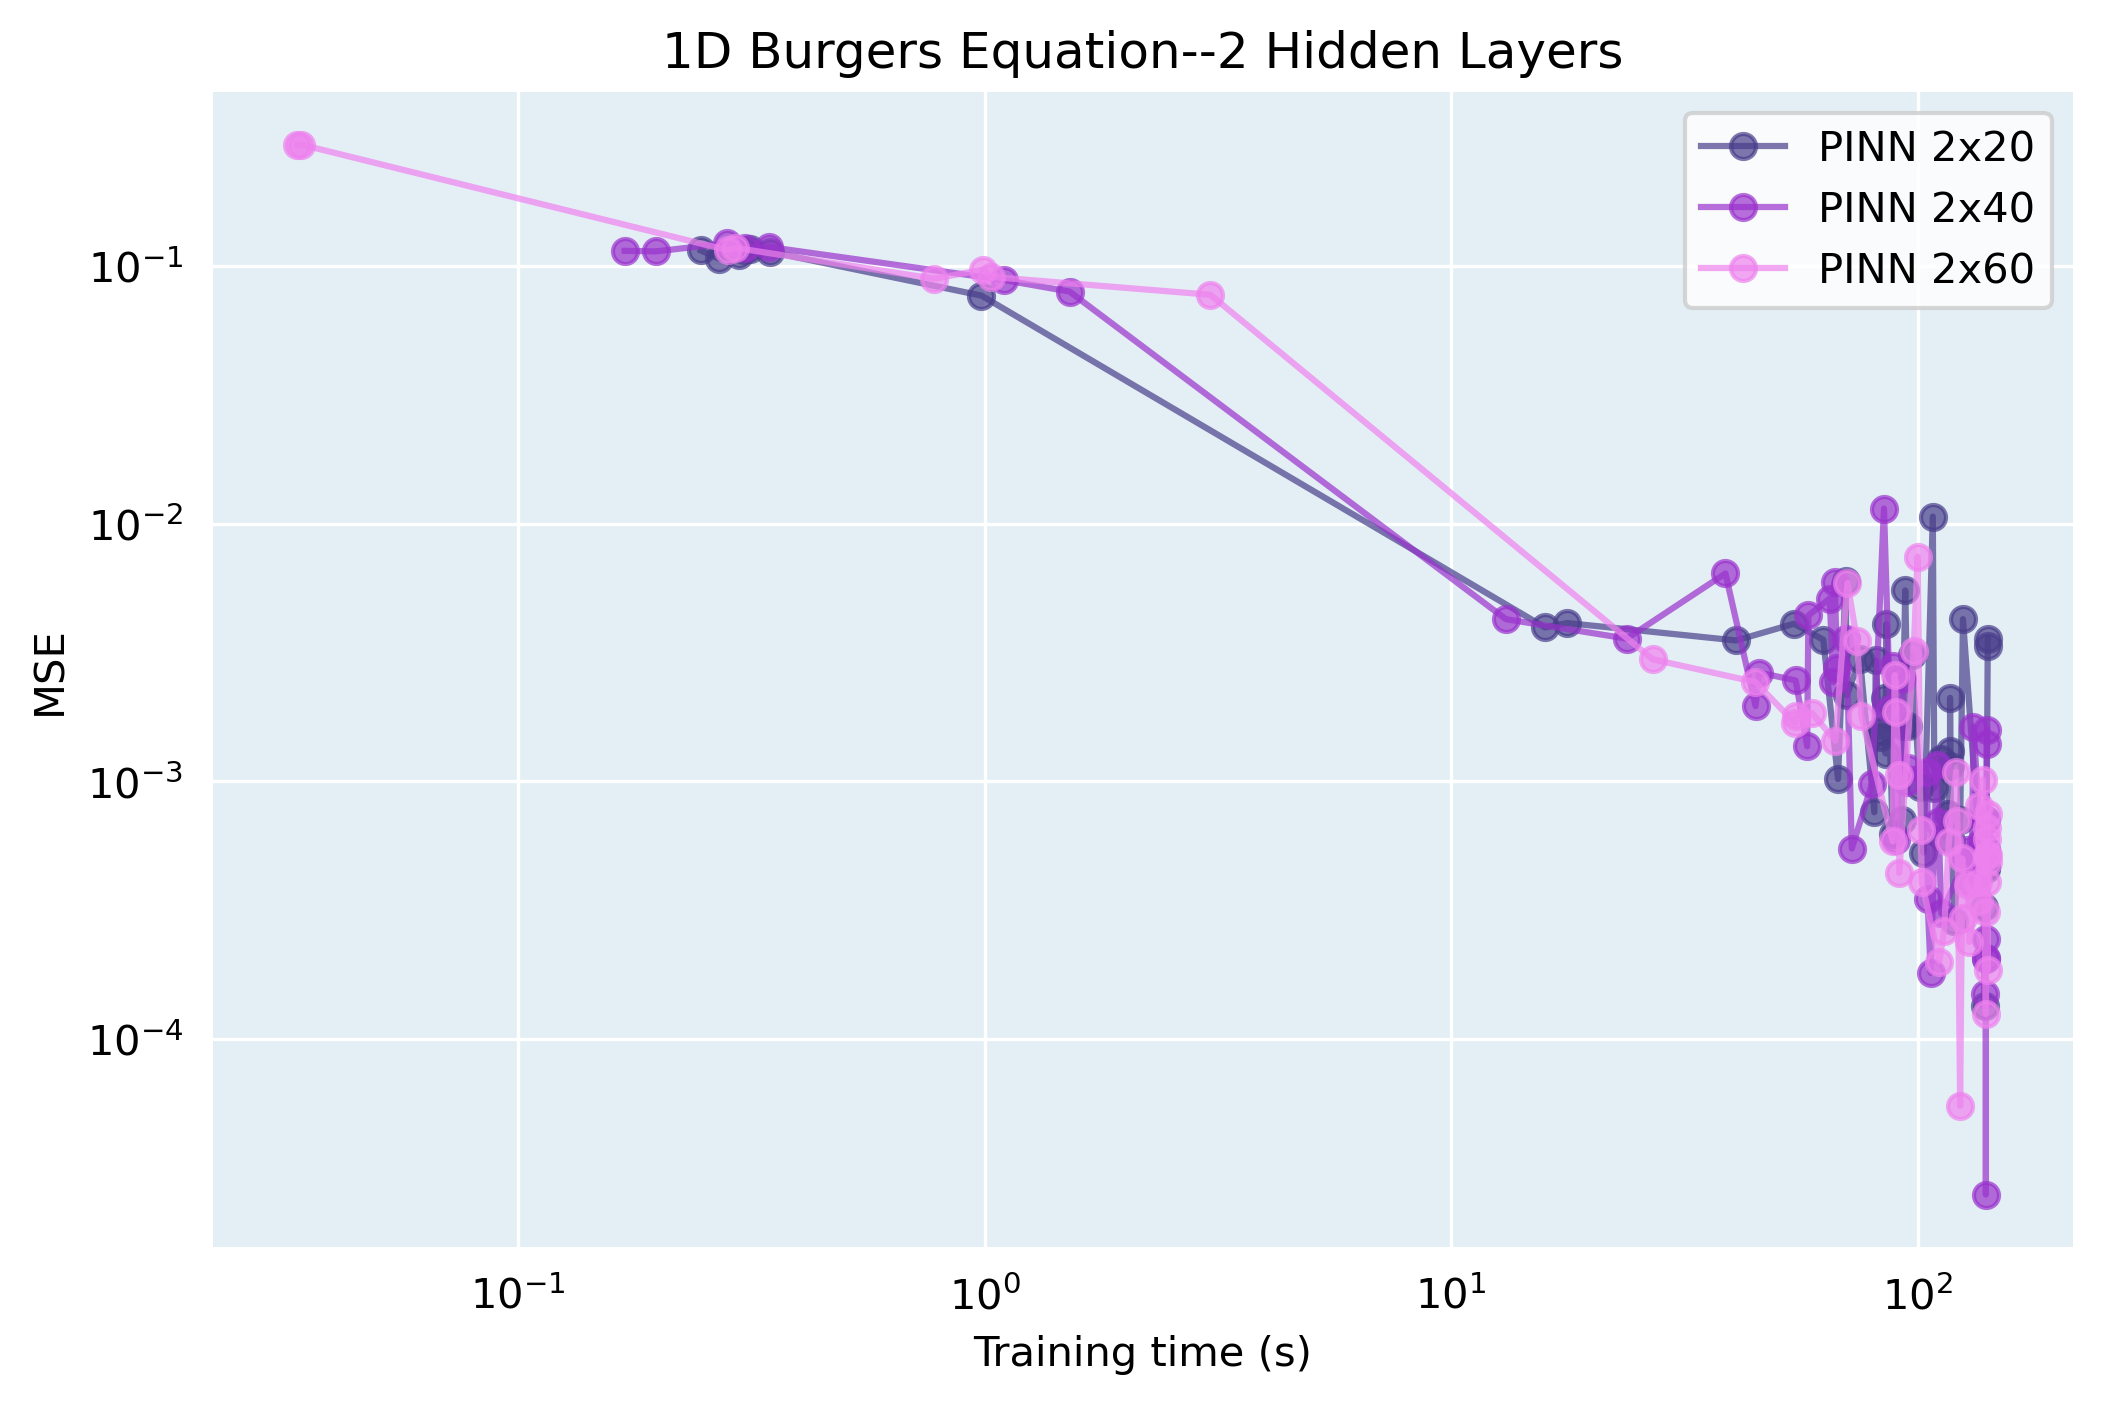

In [36]:
 #WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########
load = np.load('Data_diff_architectures/vanilla_times_mses_2x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 2x10',color='royalblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_2x20.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 2x20',color='darkslateblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_2x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 2x40',color='darkorchid',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_2x60.npy') ##### BEST
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 2x60',color='violet',marker='o',alpha=0.7)


ax.set_title('1D Burgers Equation--2 Hidden Layers')


ax.legend()

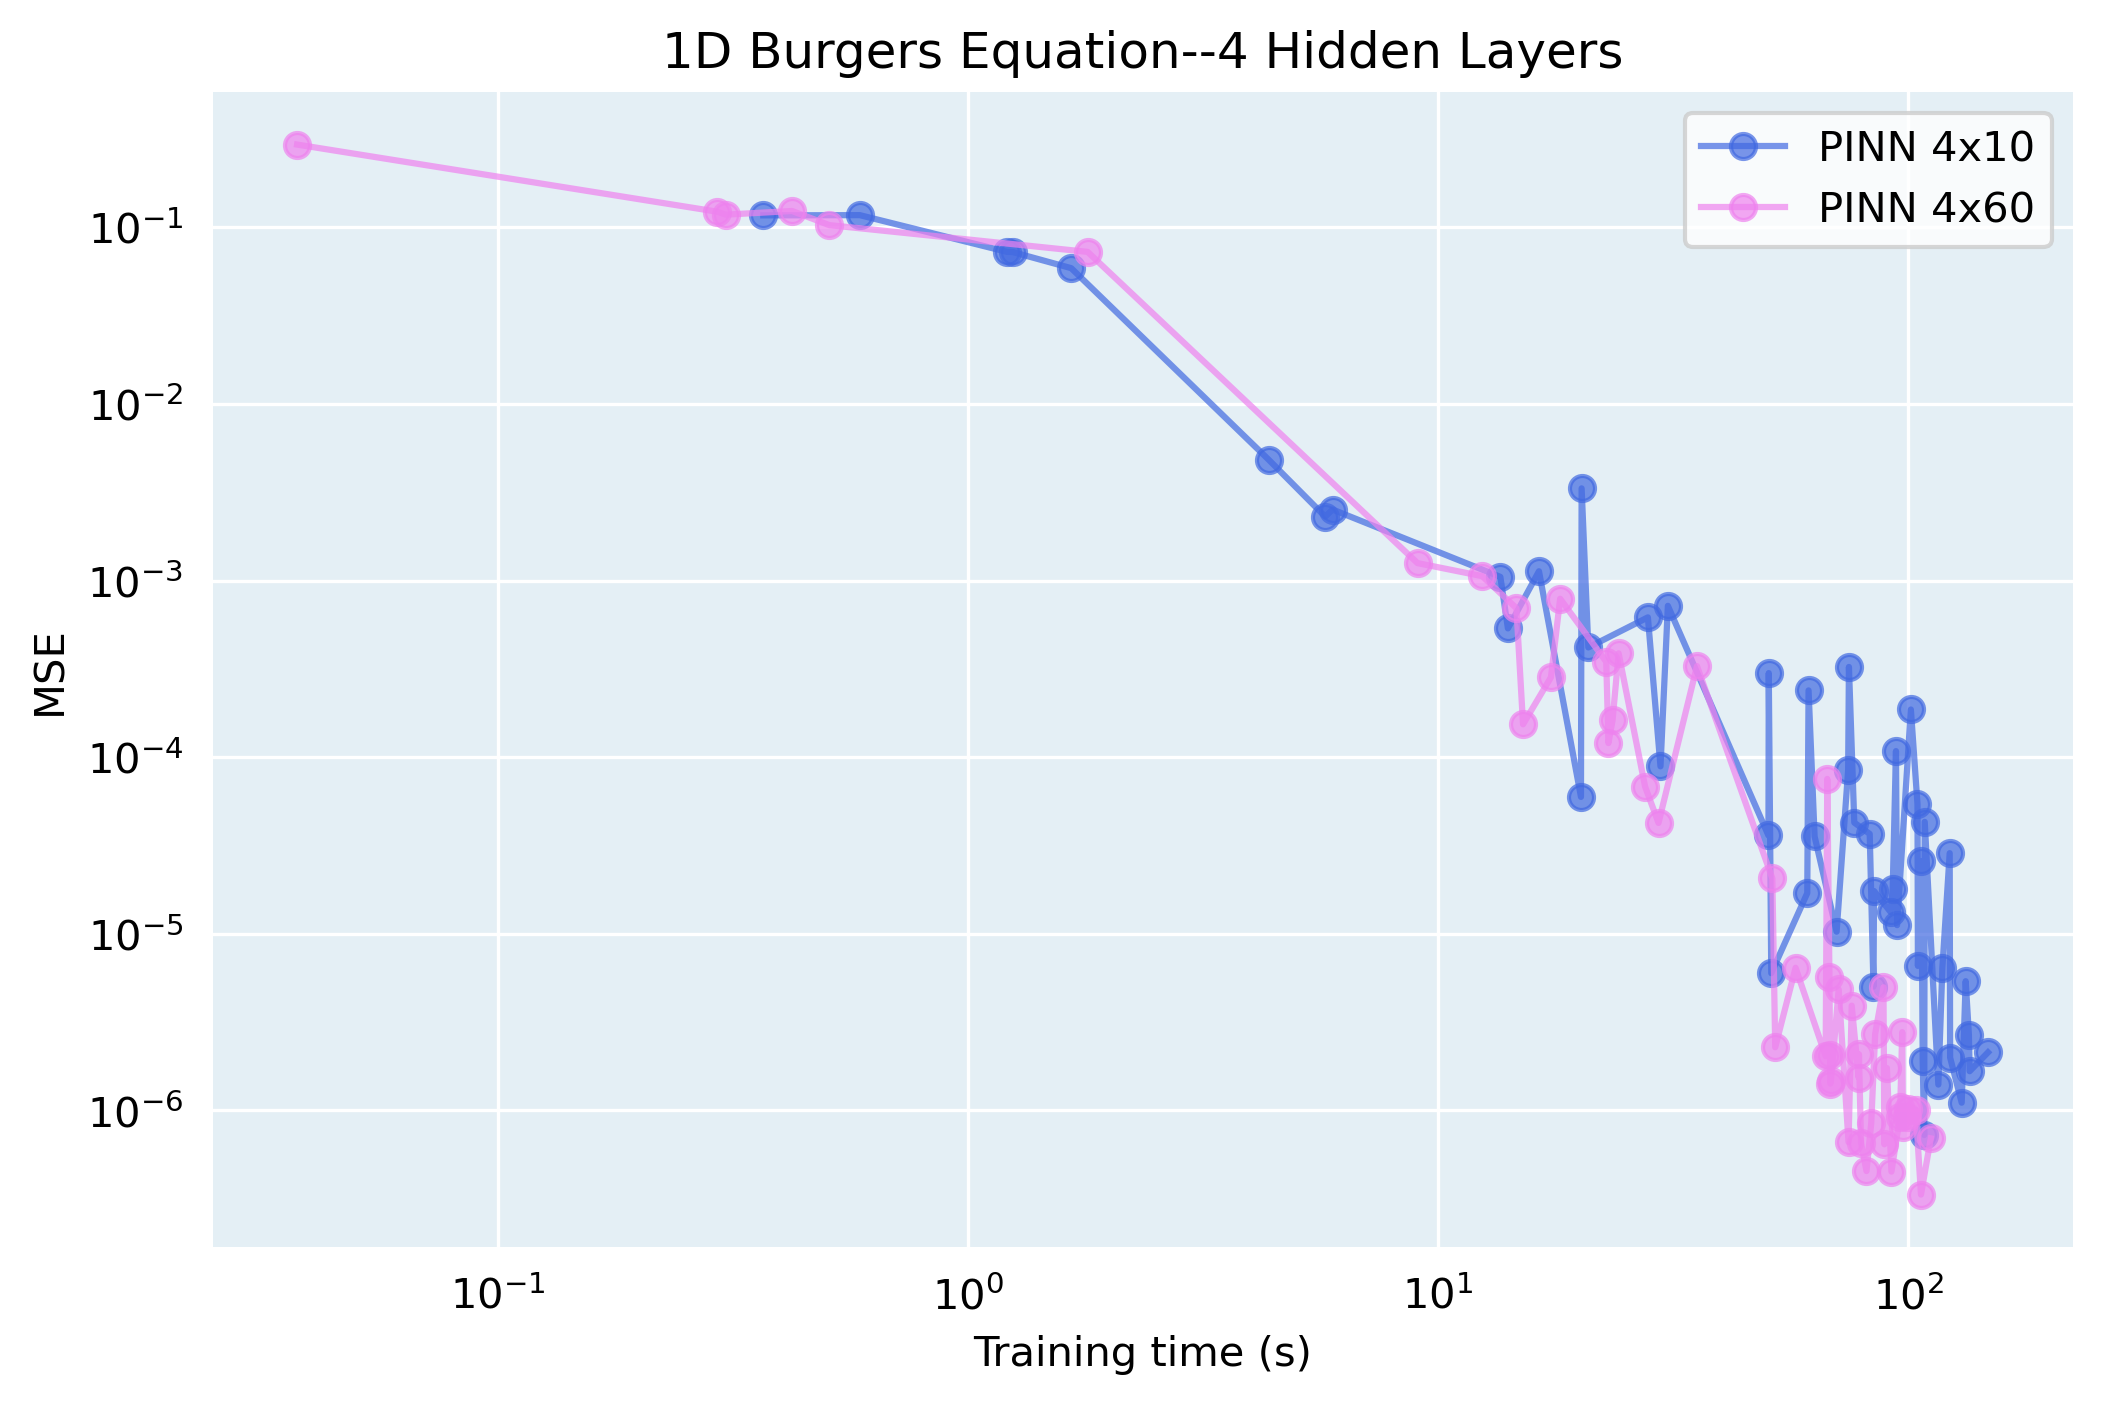

In [28]:
 #WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########
load = np.load('Data_diff_architectures/vanilla_times_mses_4x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 4x10',color='royalblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_4x20.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 4x20',color='darkslateblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_4x40.npy') 
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 4x40',color='darkorchid',marker='o',alpha=0.7)

################## 40 vs 60 UNCLEAR

load = np.load('Data_diff_architectures/vanilla_times_mses_4x60.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 4x60',color='violet',marker='o',alpha=0.7)

ax.set_title('1D Burgers Equation--4 Hidden Layers')

ax.legend()

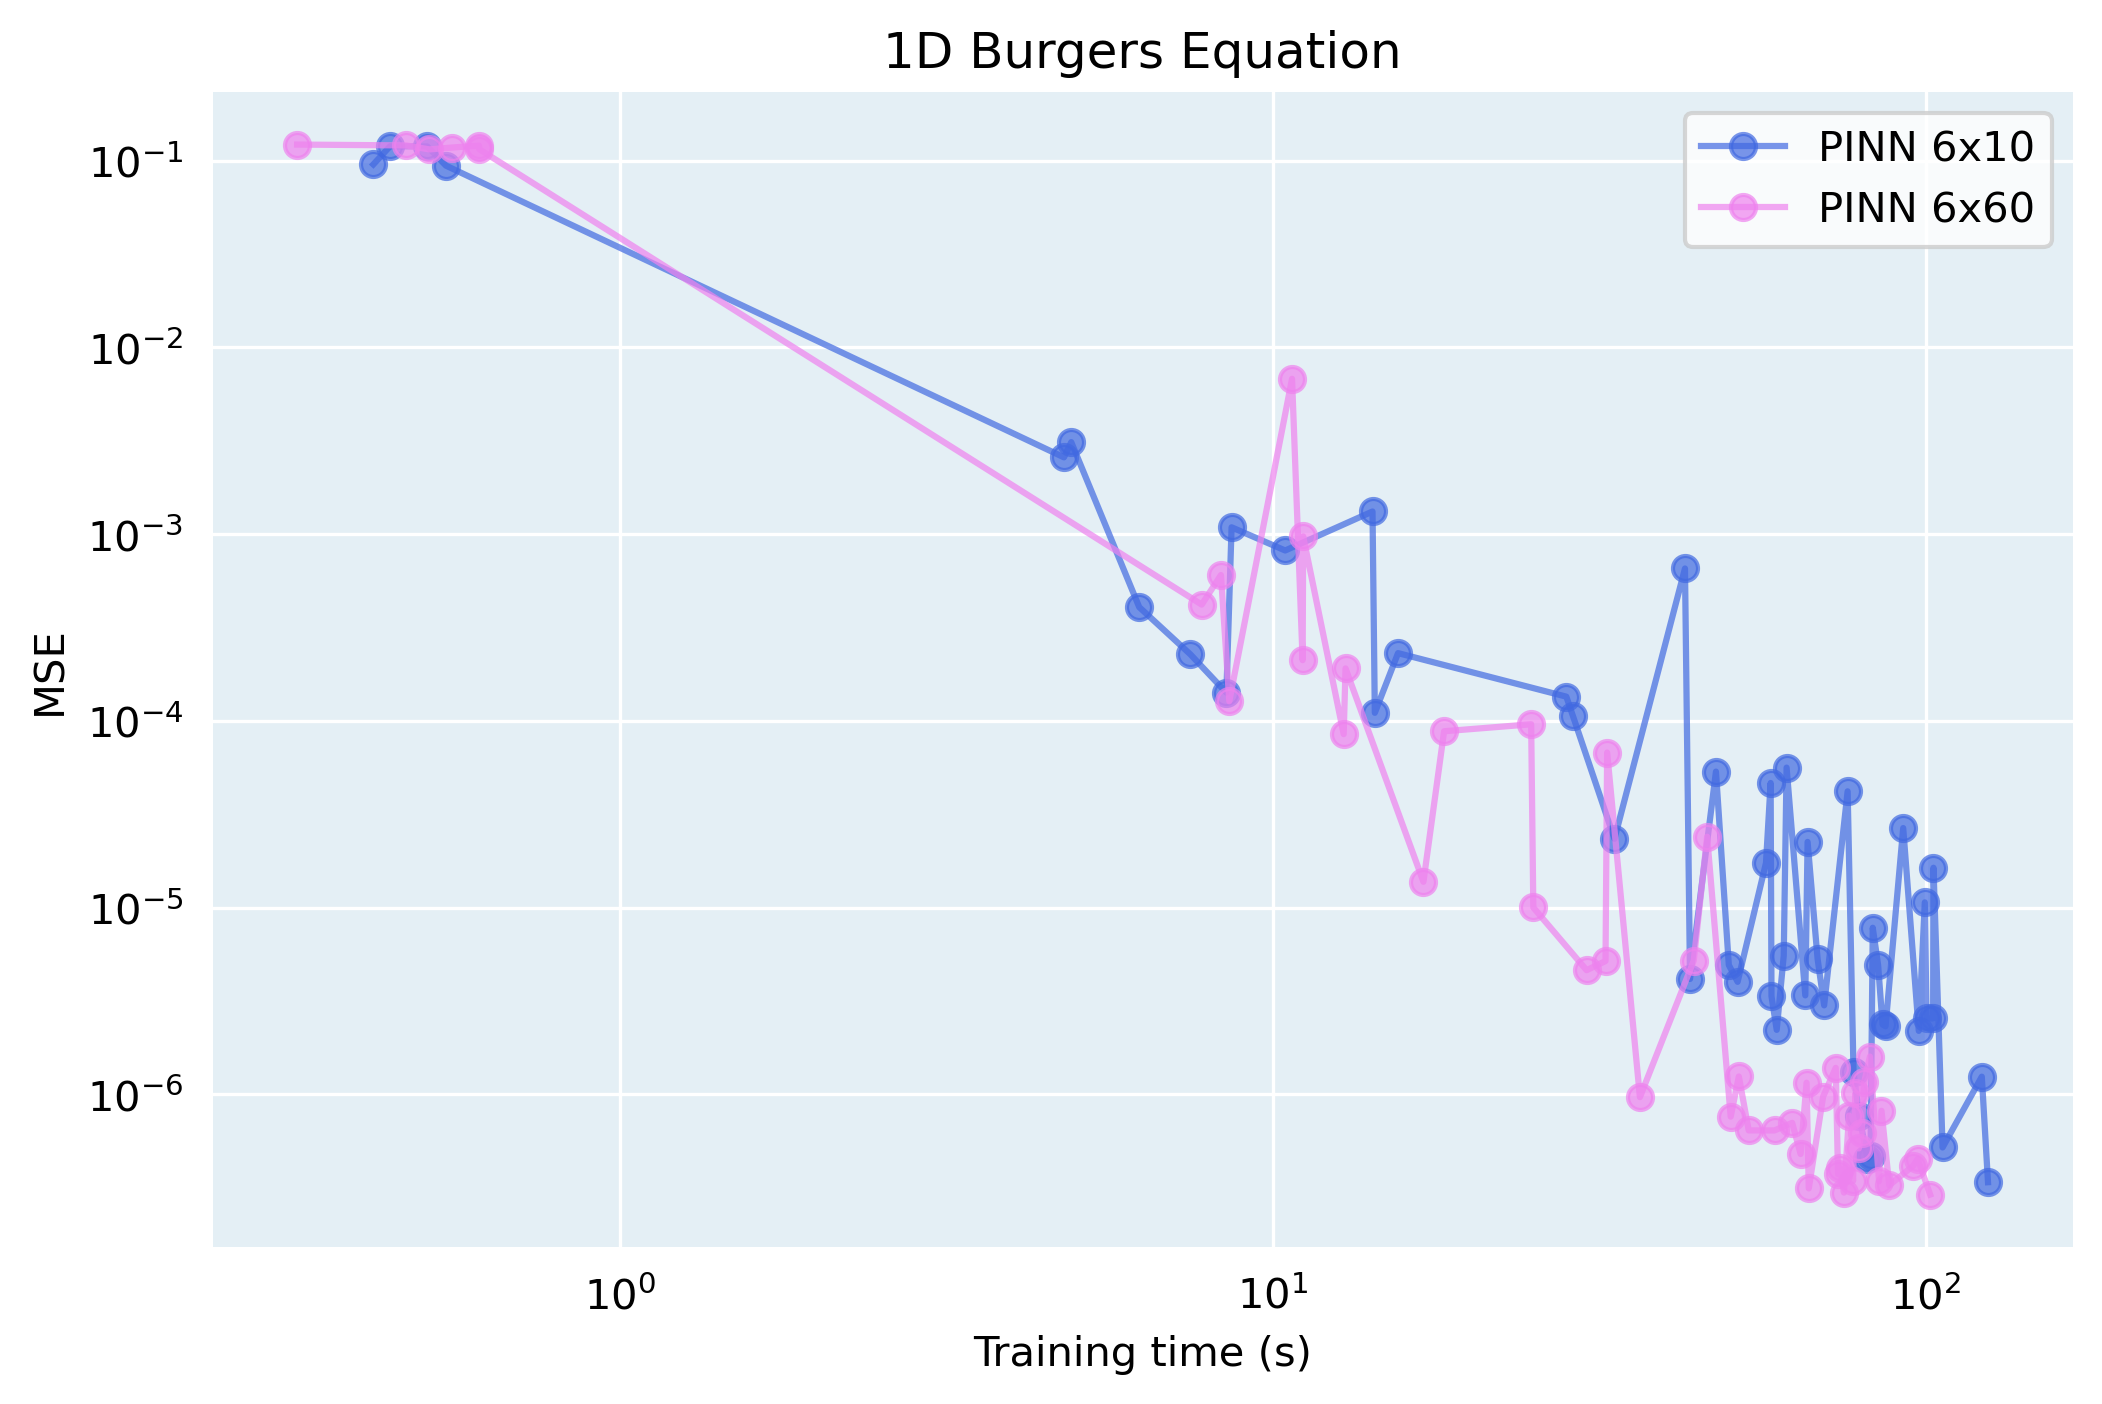

In [35]:
 #WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########
load = np.load('Data_diff_architectures/vanilla_times_mses_6x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 6x10',color='royalblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_6x20.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 6x20',color='darkslateblue',marker='o')

load = np.load('Data_diff_architectures/vanilla_times_mses_6x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 6x40',color='darkorchid',marker='o')

################## 40 vs 60 UNCLEAR

load = np.load('Data_diff_architectures/vanilla_times_mses_6x60.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 6x60',color='violet',marker='o',alpha=0.7)

ax.legend()

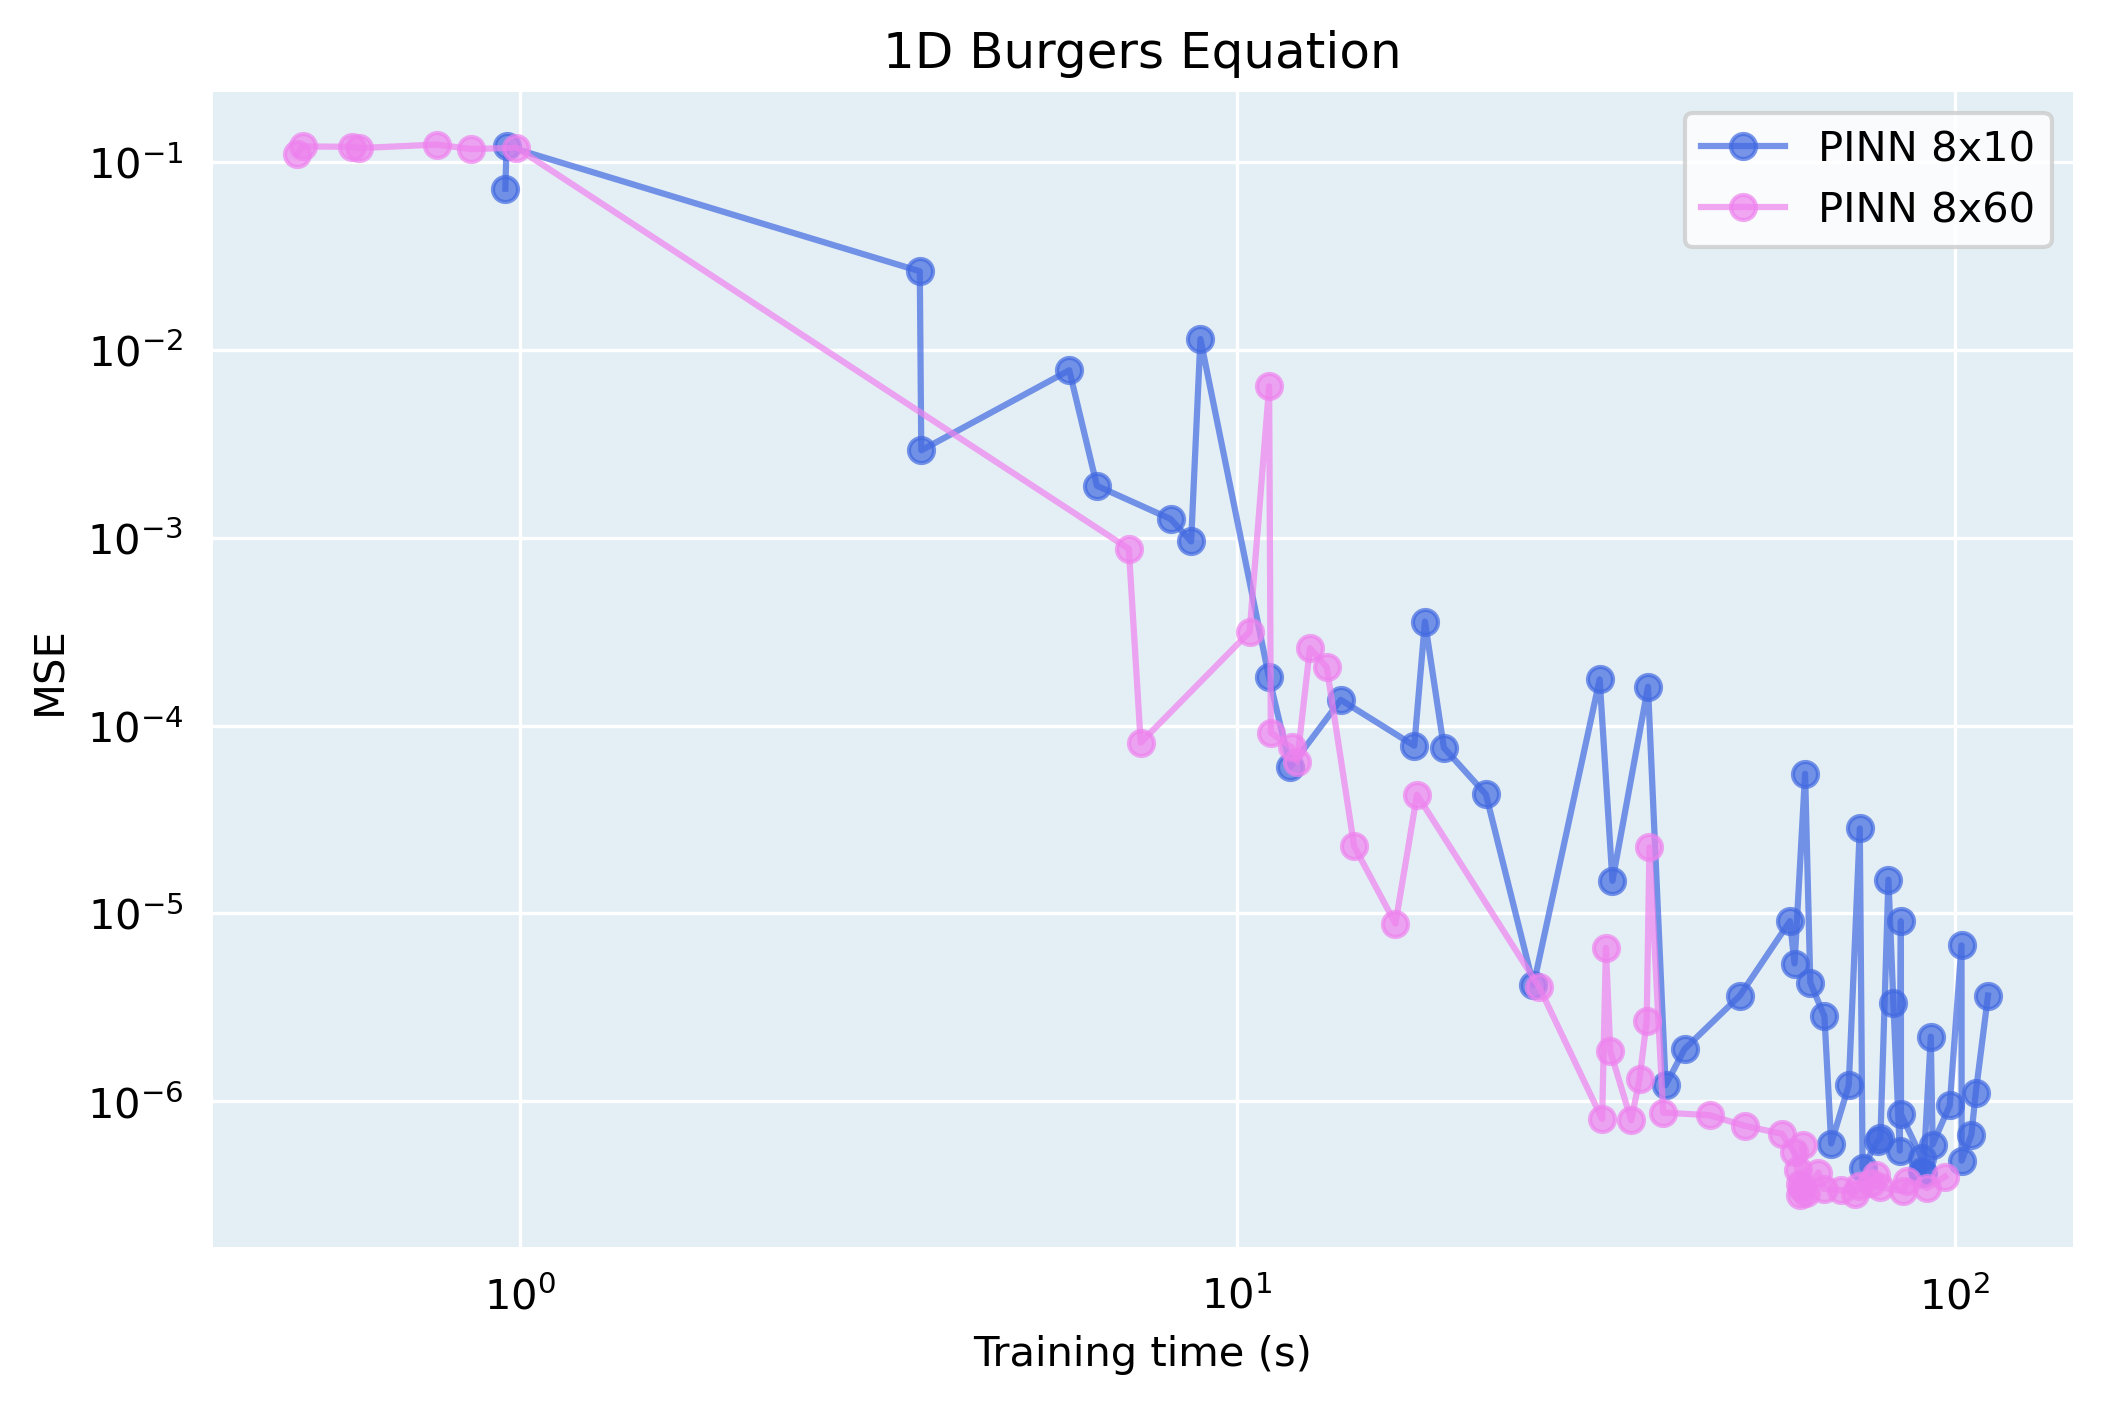

In [34]:
 #WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########
load = np.load('Data_diff_architectures/vanilla_times_mses_8x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x10',color='royalblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_8x20.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 8x20',color='darkslateblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 8x40',color='darkorchid',marker='o',alpha=0.7)

################## 40 IS BETTER!! less time.

load = np.load('Data_diff_architectures/vanilla_times_mses_8x60.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x60',color='violet',marker='o',alpha=0.7)

ax.legend()

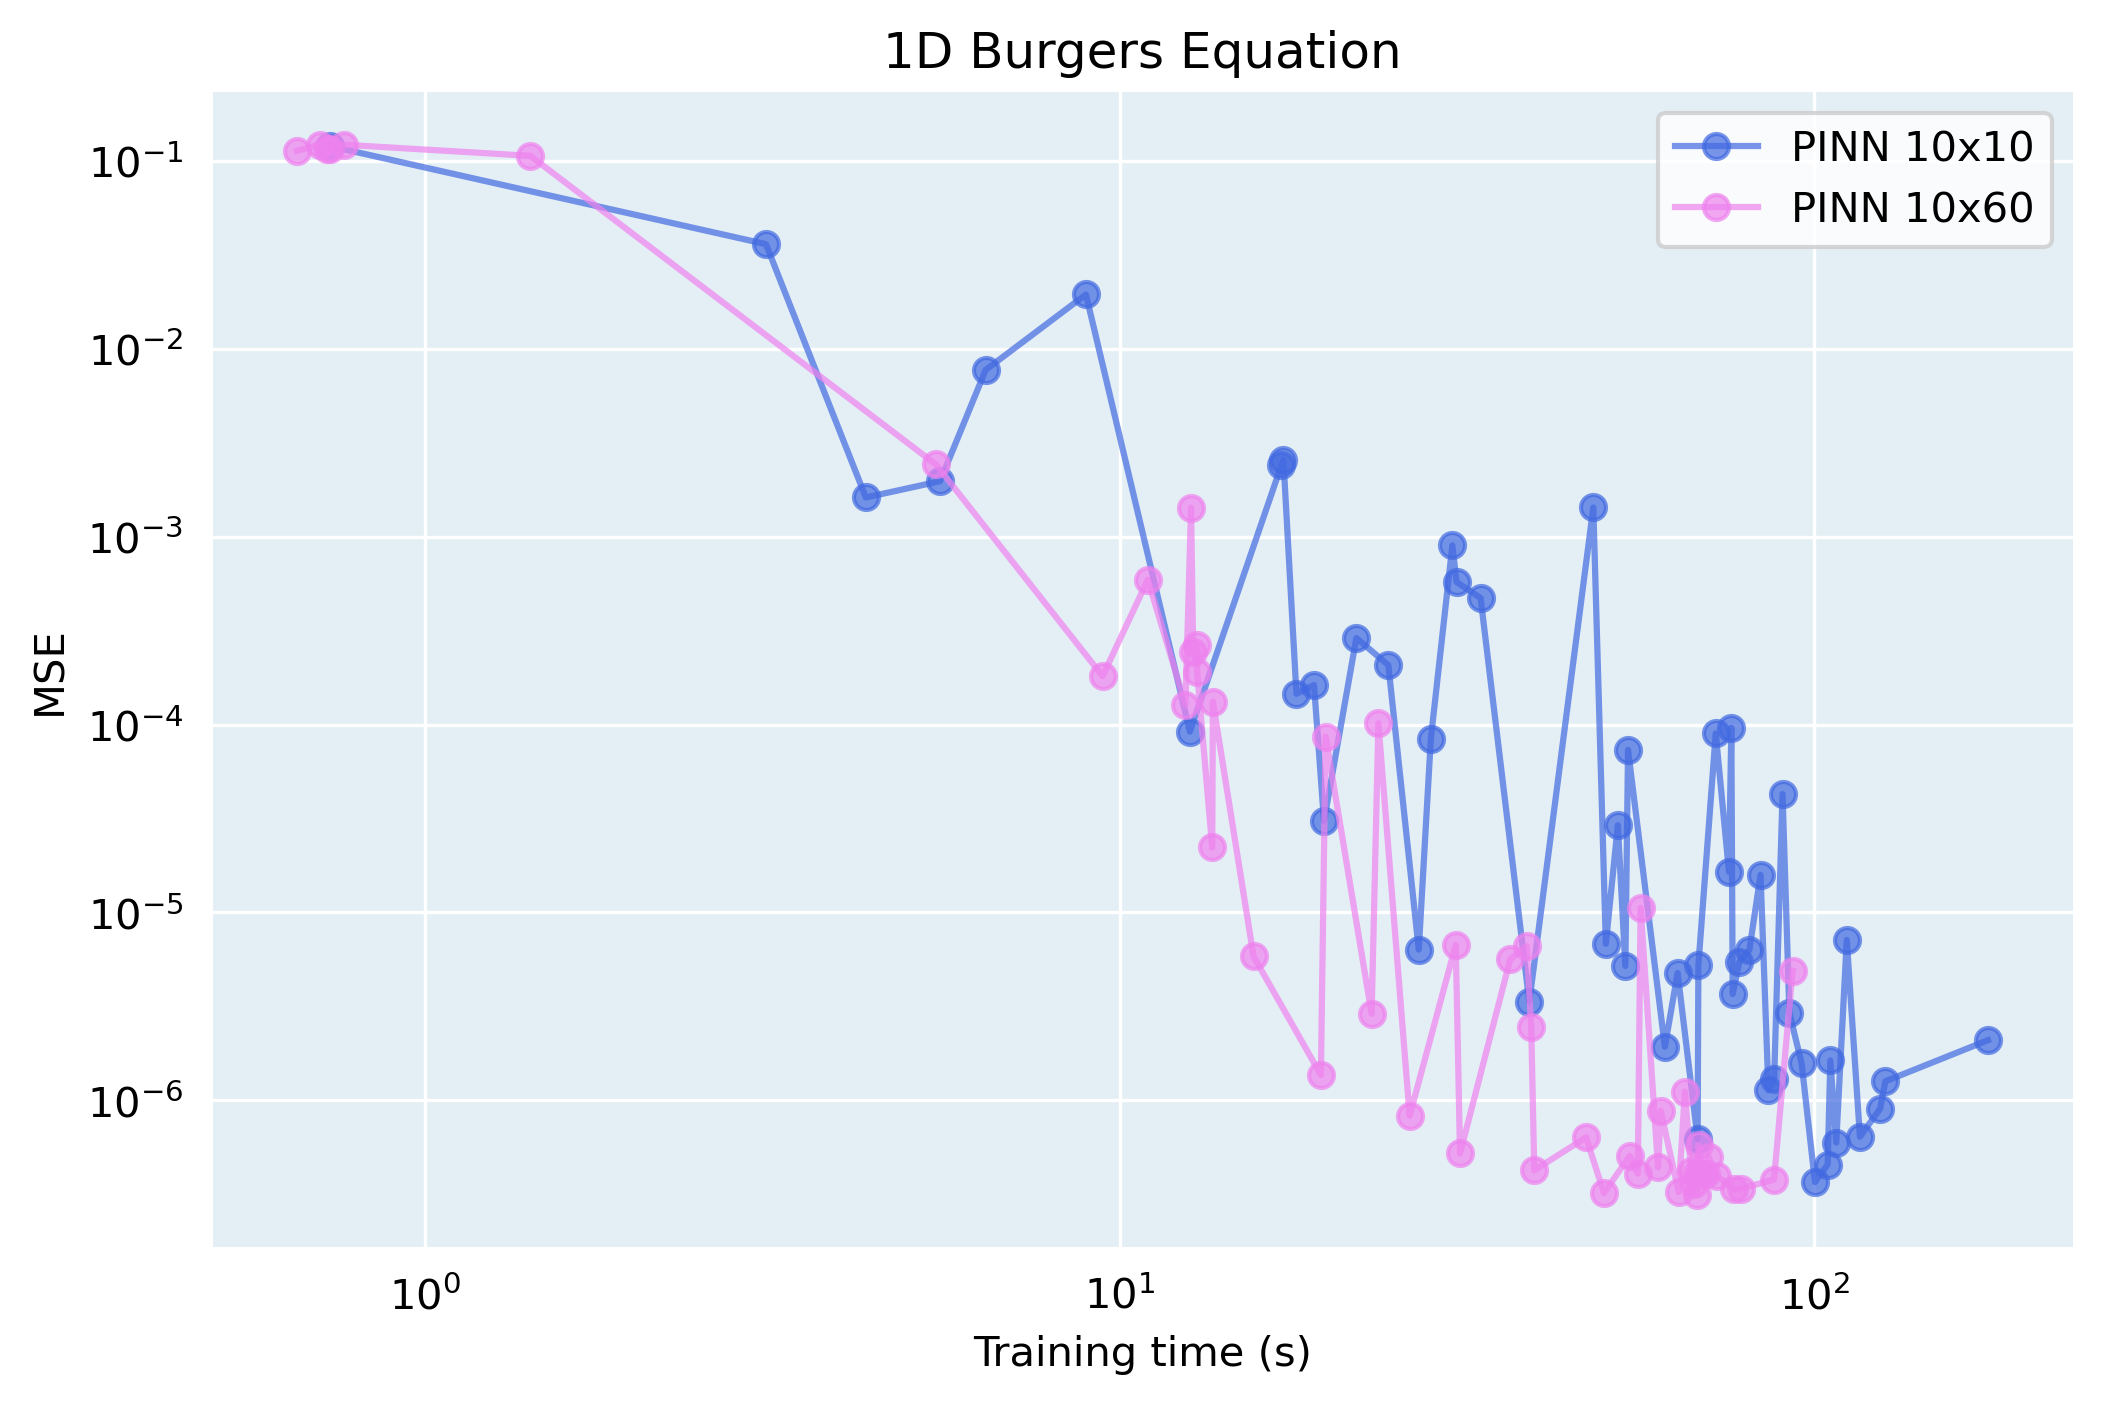

In [33]:
 #WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########
load = np.load('Data_diff_architectures/vanilla_times_mses_10x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 10x10',color='royalblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_10x20.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 10x20',color='darkslateblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_10x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 10x40',color='darkorchid',marker='o',alpha=0.7)

################## 40 vs 60 UNCLEAR

load = np.load('Data_diff_architectures/vanilla_times_mses_10x60.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 10x60',color='violet',marker='o',alpha=0.7)

ax.legend()

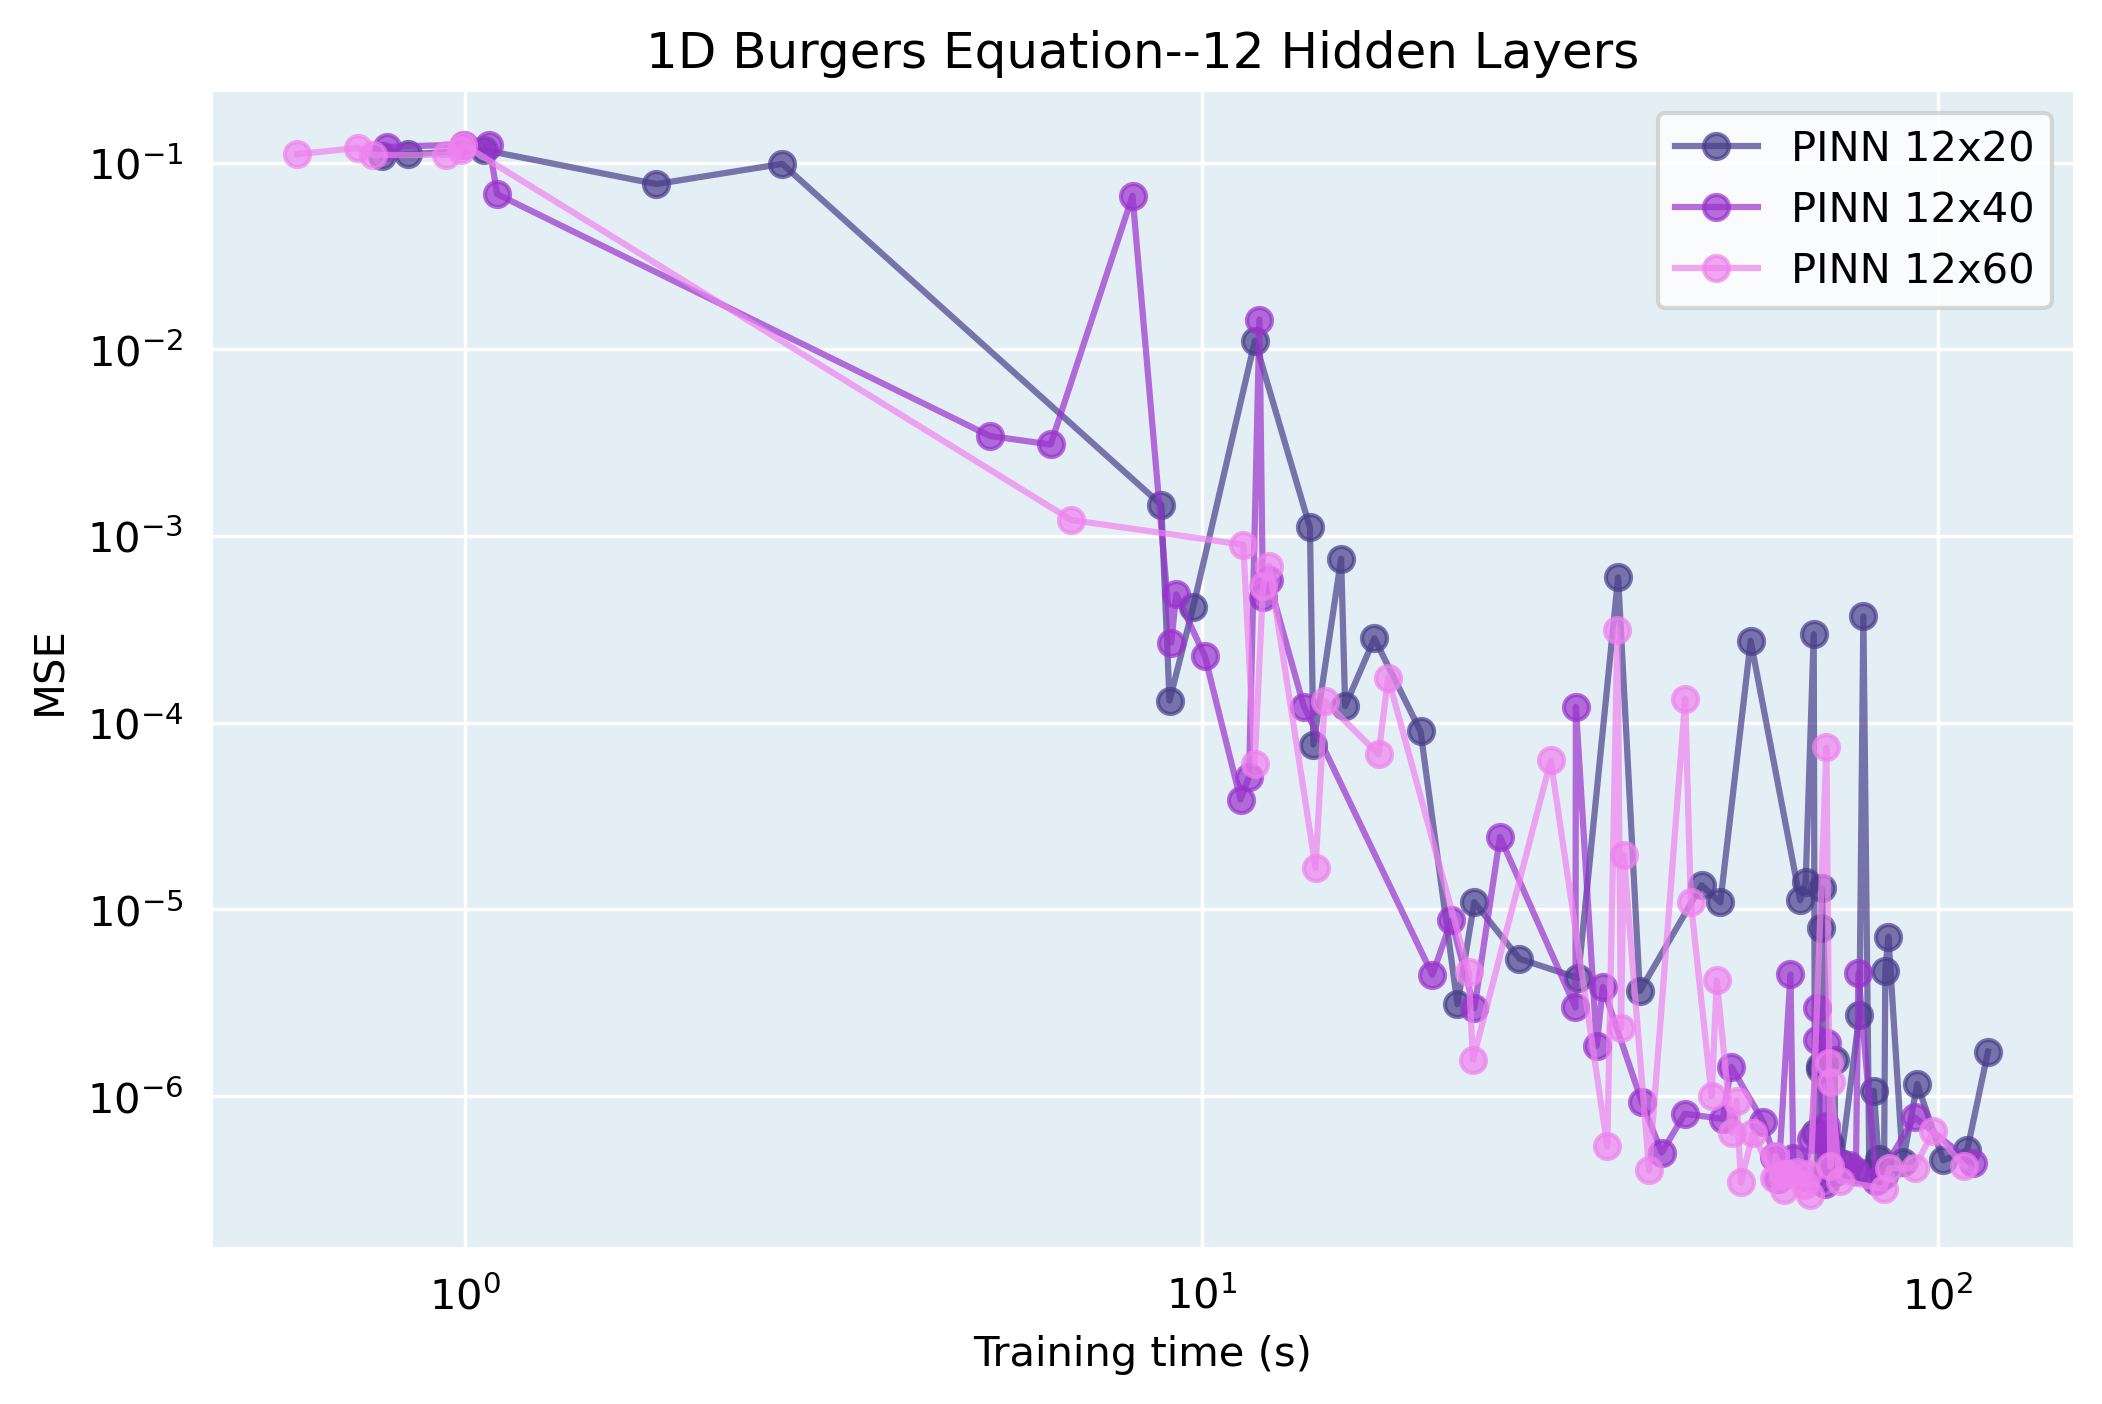

In [37]:
 #WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########
load = np.load('Data_diff_architectures/vanilla_times_mses_12x10.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN 12x10',color='royalblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_12x20.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 12x20',color='darkslateblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_12x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 12x40',color='darkorchid',marker='o',alpha=0.7)

################## 40 vs 60 UNCLEAR

load = np.load('Data_diff_architectures/vanilla_times_mses_12x60.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 12x60',color='violet',marker='o',alpha=0.7)

ax.set_title('1D Burgers Equation--12 Hidden Layers')

ax.legend()

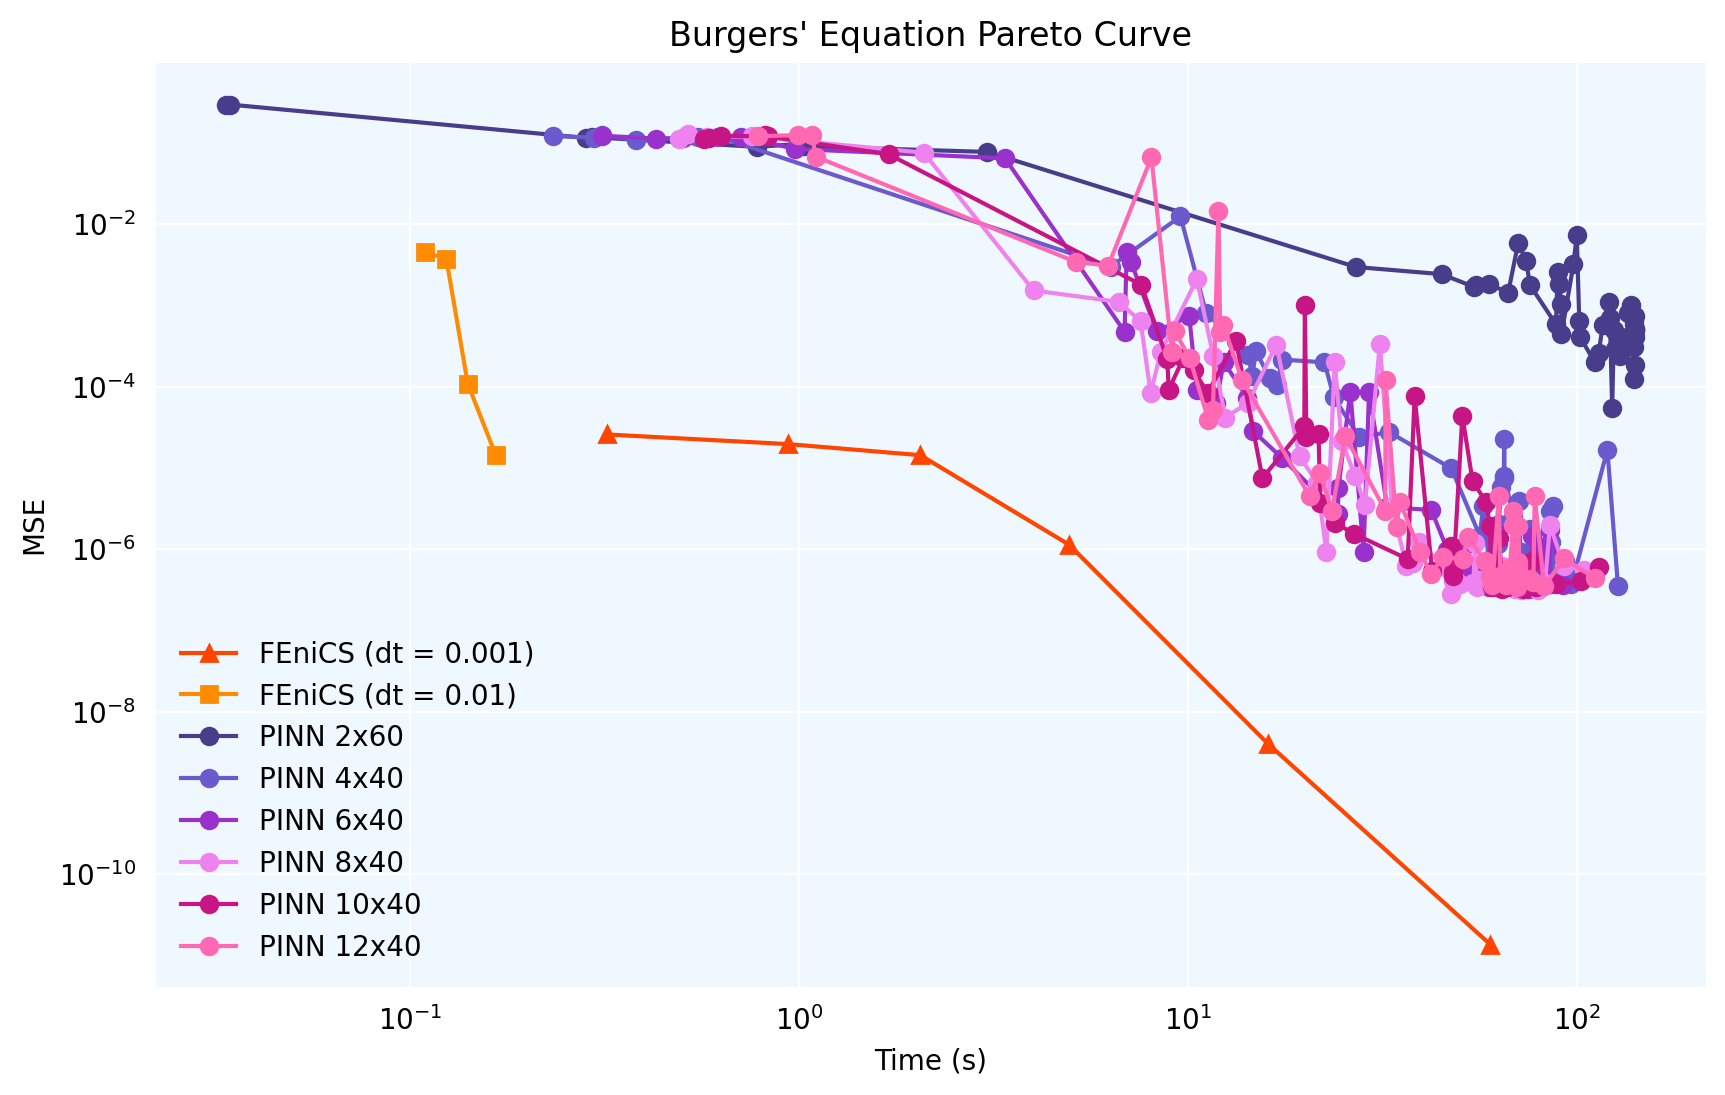

In [109]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

# Create FEniCS data
times_fenics = [59.9866251945495,16.0761799812316,4.94502711296081,2.04935121536254,0.935578823,0.319884539,0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics = [1.37E-11,4.04E-09,1.14E-06,1.44E-05,1.97E-05,2.59E-05,1.44E-05,0.000108454,0.00372555,0.004554599]
labels_fenics = ['n = 8193, dt = 0.001','e_num/dt = 2049000','e_num/dt = 513000','e_num/dt = 129000','e_num/dt = 33000','e_num/dt = 9000','e_num/dt = 102500','e_num/dt = 25700','e_num/dt = 6500','e_num/dt=3300','e_num/dt = 1700','e_num/dt = 500']
markers_fenics = ['^','^','^','^','^','^','s','s','s','s','^','h','8','>','D','X','H','o','s','s','s']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold']
#for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    #ax.scatter(x, y, color=color, marker=shape,label=label)
ax.plot(times_fenics[0:6],mse_fenics[0:6],label="FEniCS (dt = 0.001)",color='orangered',marker='^')
ax.plot(times_fenics[6:],mse_fenics[6:],label="FEniCS (dt = 0.01)",color='darkorange',marker='s')
    
load = np.load('vanilla_times_mses2.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='New PINN',color='fuchsia',marker='o')

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='New gPINN',color='forestgreen',marker='o')


######### NEURON, LAYERS VARIANTS #########
load = np.load('vanilla_times_mses_2x60.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 2x60',color='darkslateblue',marker='o')

load = np.load('vanilla_times_mses_4x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 4x40',color='slateblue',marker='o')

load = np.load('vanilla_times_mses_6x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 6x40',color='darkorchid',marker='o')

load = np.load('vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x40',color='violet',marker='o')

load = np.load('vanilla_times_mses_10x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 10x40',color='mediumvioletred',marker='o')

load = np.load('vanilla_times_mses_12x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 12x40',color='hotpink',marker='o')


#############################################
    
#    COMMENTS: 2 layers not enough. zoom in on others
    
#############################################
ax.legend(framealpha=0)

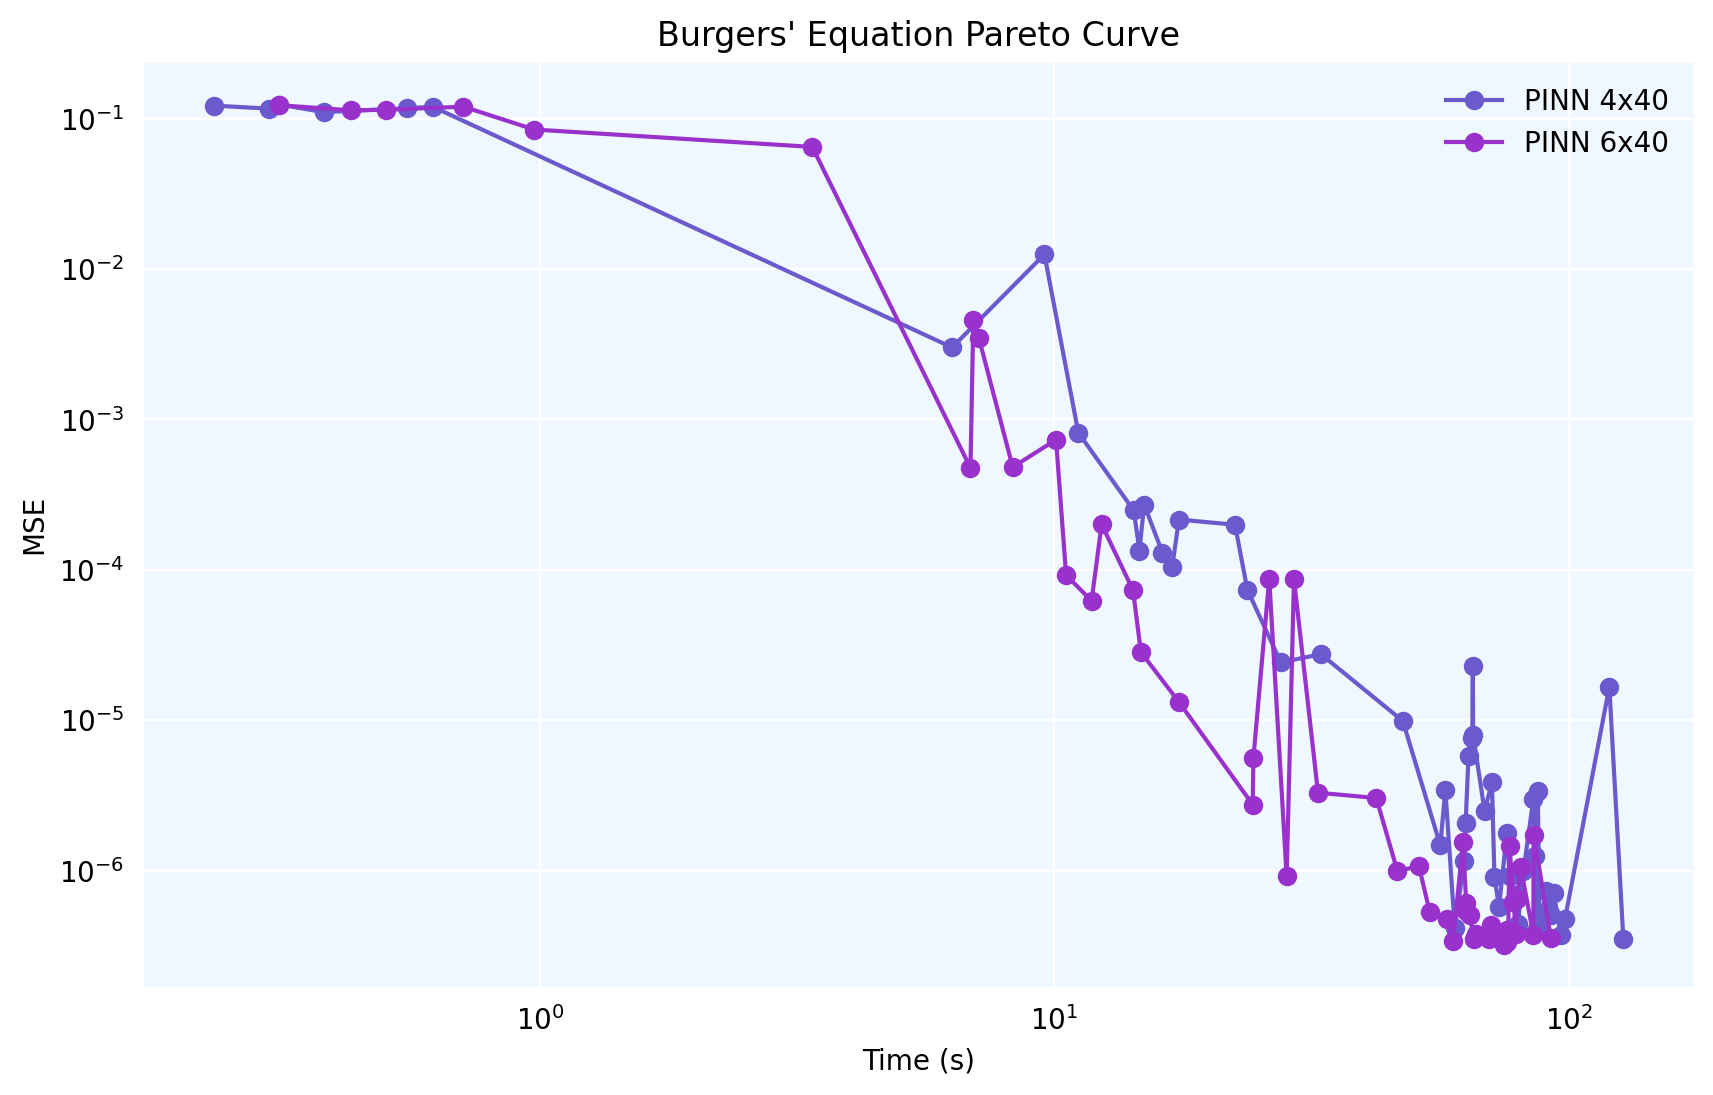

In [111]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########

load = np.load('vanilla_times_mses_4x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 4x40',color='slateblue',marker='o')

load = np.load('vanilla_times_mses_6x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 6x40',color='darkorchid',marker='o')


#############################################
    
#    COMMENTS: comparing 4x40 against 6x40, 6x40 looks better.
    
#############################################
ax.legend(framealpha=0)

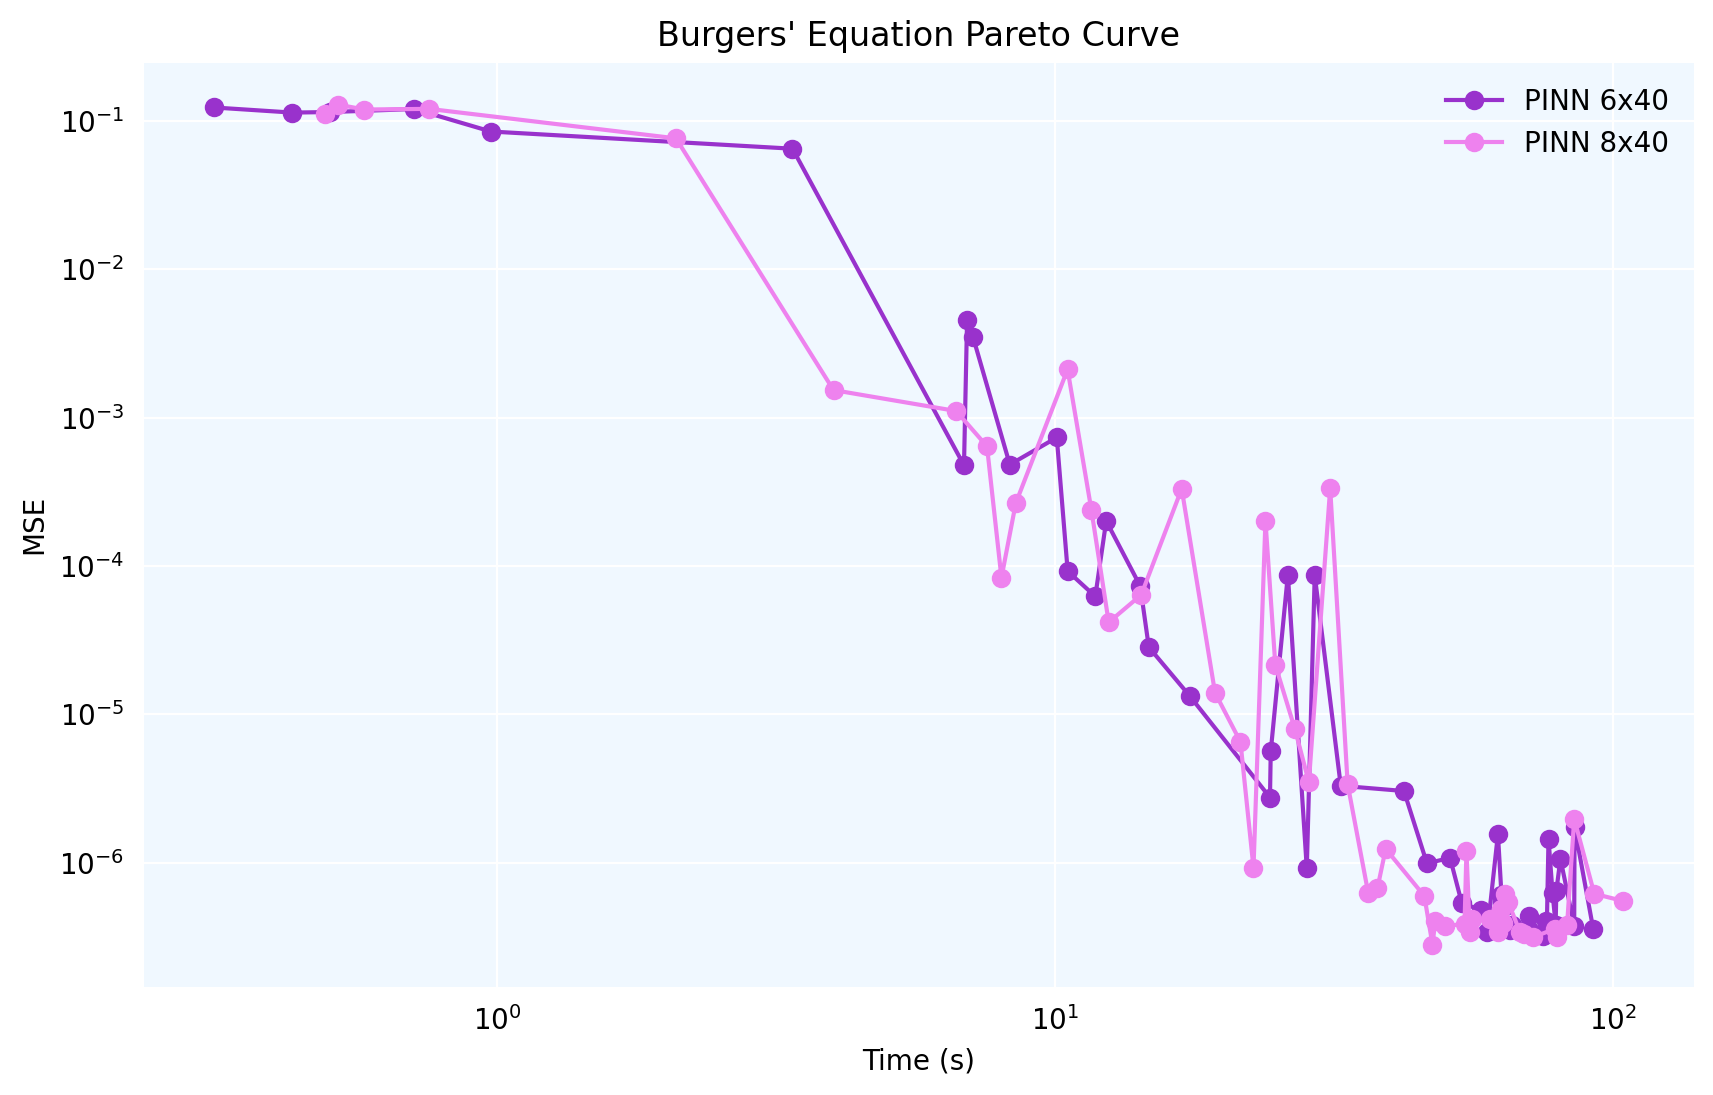

In [117]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########

load = np.load('vanilla_times_mses_6x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 6x40',color='darkorchid',marker='o')

load = np.load('vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x40',color='violet',marker='o')

#############################################
    
#    COMMENTS: comparing 6x40 against 8x40, 8x40 looks better IF NOT SAME. (bottoms out sooner)
    
#############################################
ax.legend(framealpha=0)

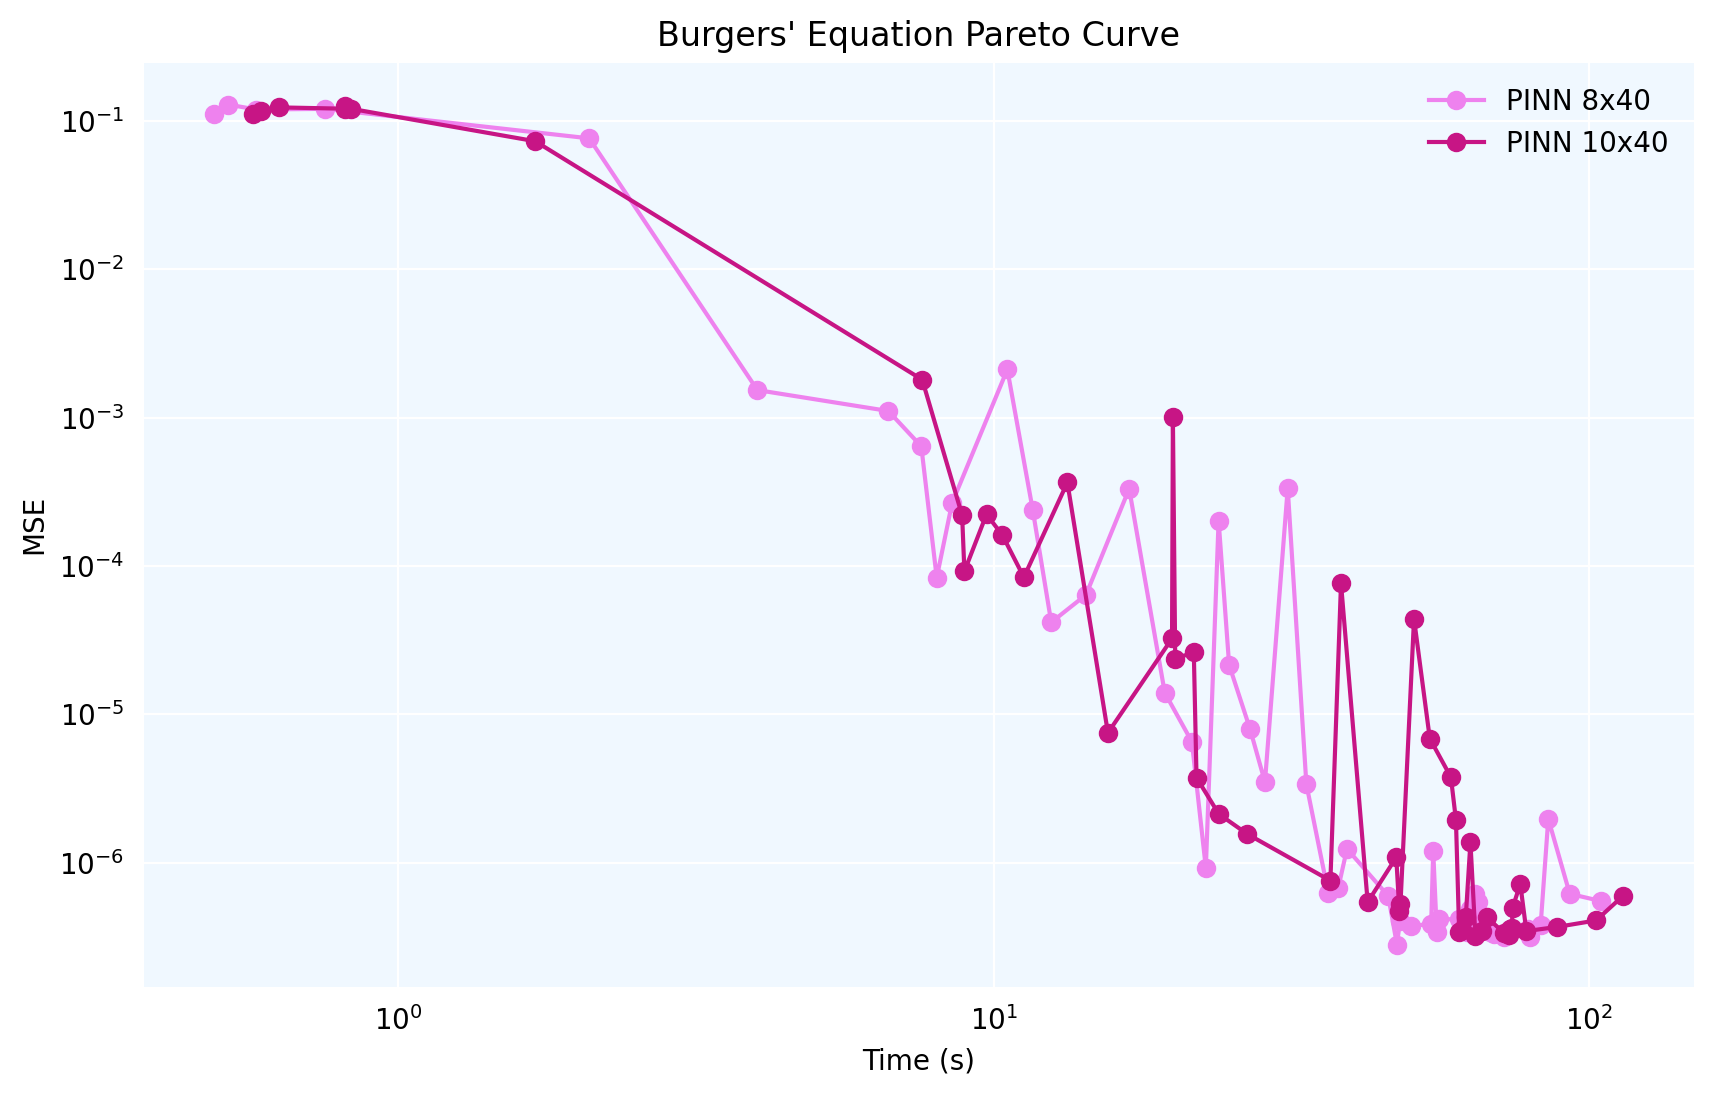

In [120]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########

load = np.load('vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x40',color='violet',marker='o')

load = np.load('vanilla_times_mses_10x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 10x40',color='mediumvioletred',marker='o')

#############################################
    
#    COMMENTS: comparing 8x40 vs 10x40, not noticeable difference
    
#############################################
ax.legend(framealpha=0)

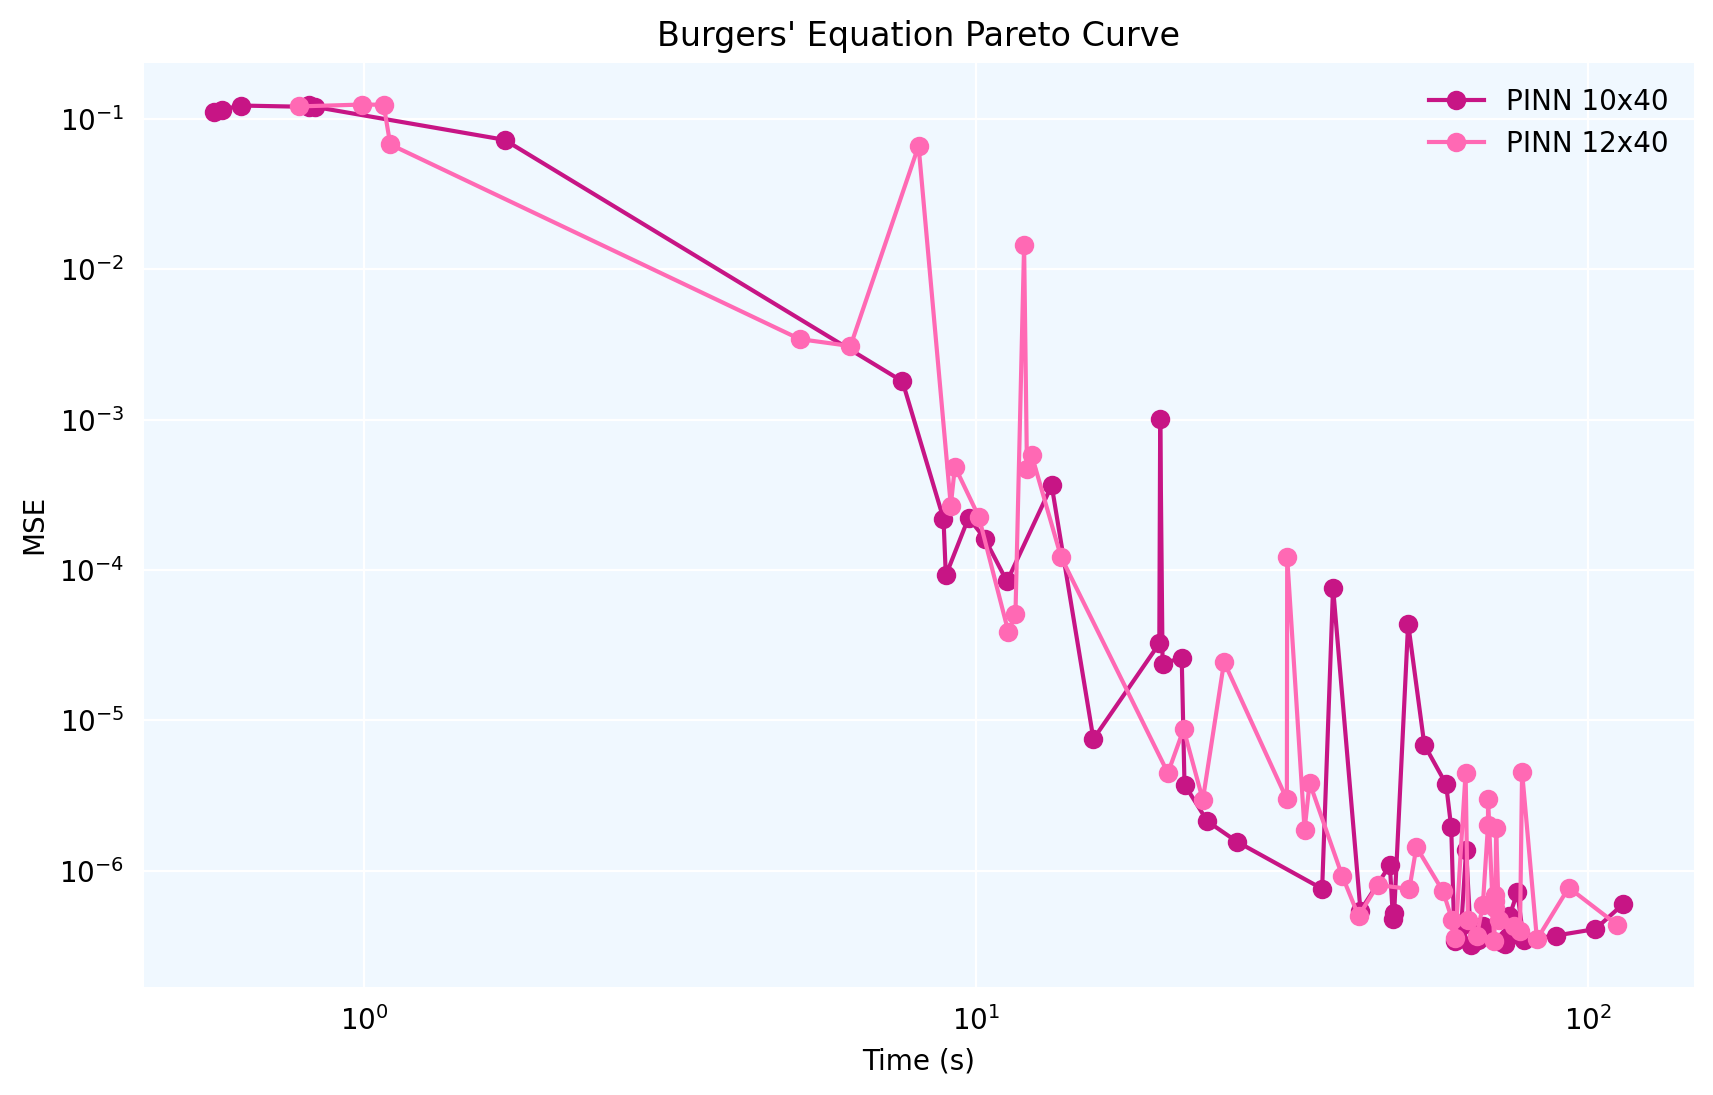

In [121]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########

load = np.load('vanilla_times_mses_10x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 10x40',color='mediumvioletred',marker='o')

load = np.load('vanilla_times_mses_12x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 12x40',color='hotpink',marker='o')


#############################################
    
#    COMMENTS: comparing 10x40 against 12x40, no tangible differnece.
    
#############################################
ax.legend(framealpha=0)

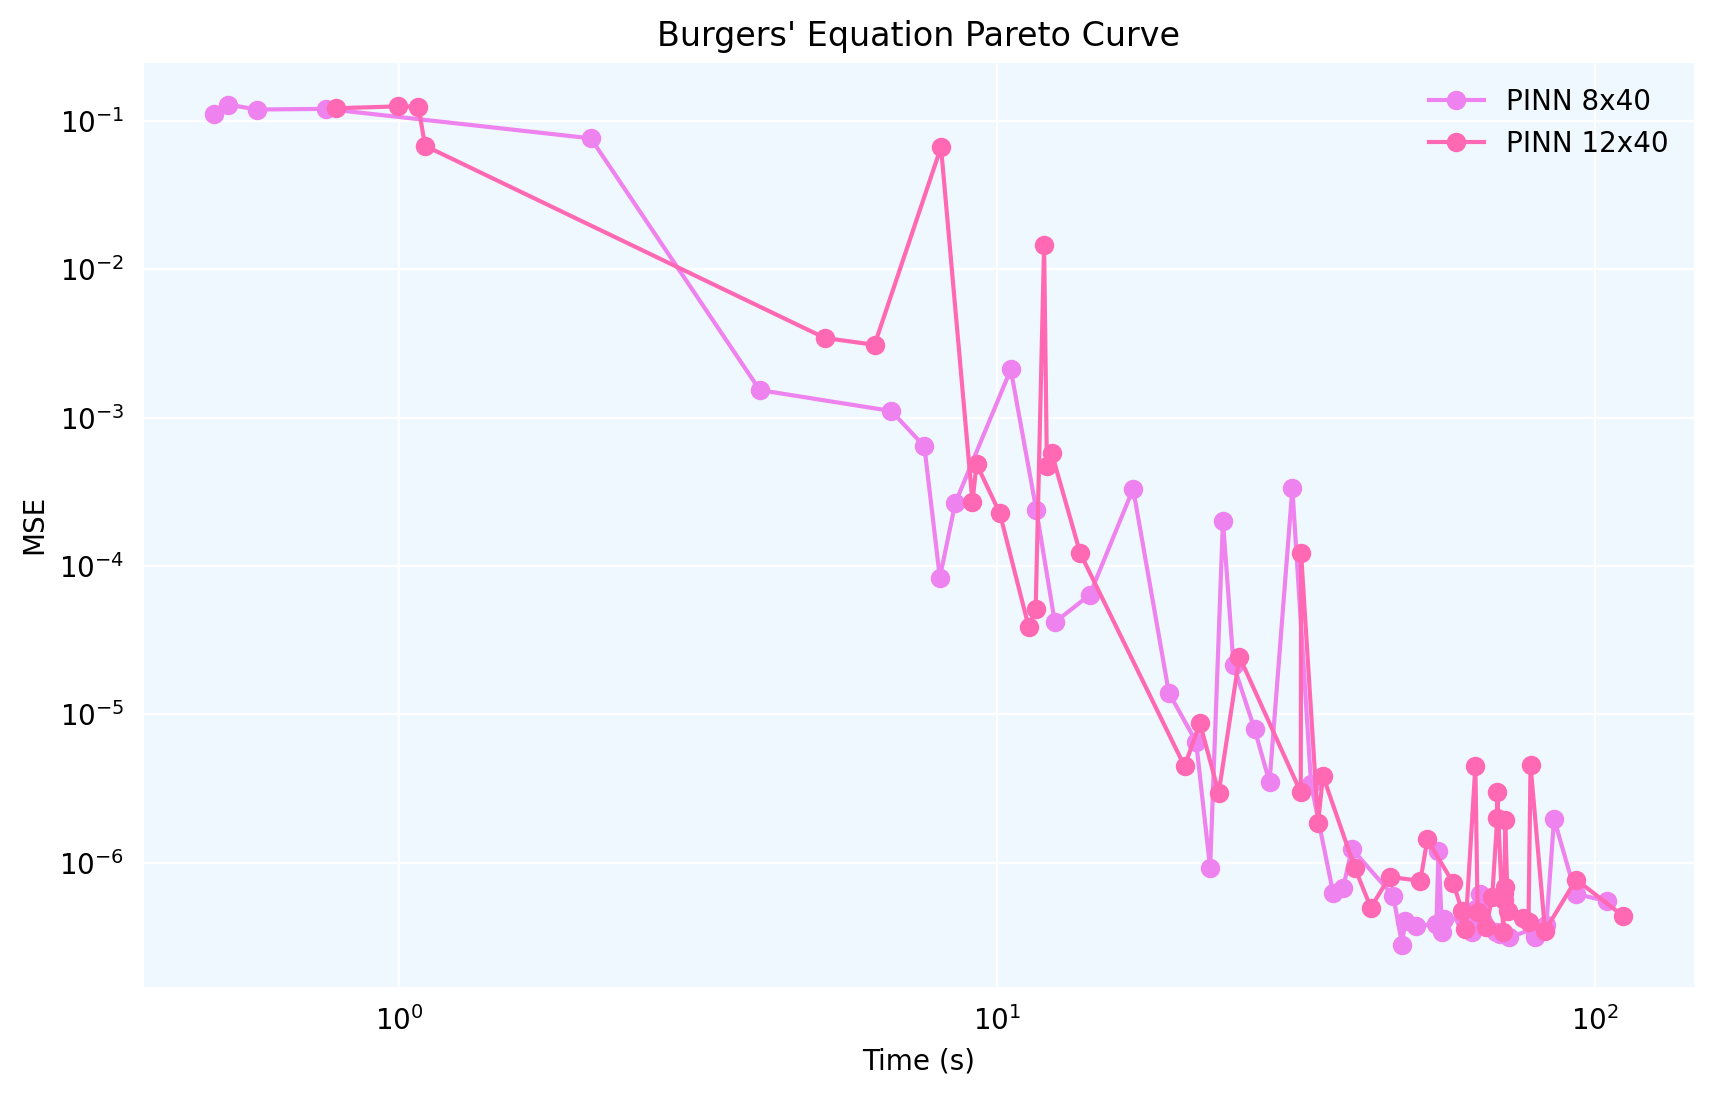

In [122]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

######### NEURON, LAYERS VARIANTS #########

load = np.load('vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x40',color='violet',marker='o')

load = np.load('vanilla_times_mses_12x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 12x40',color='hotpink',marker='o')


#############################################
    
#    COMMENTS: comparing 4x40 against 6x40, 6x40 looks better.
    
#############################################
ax.legend(framealpha=0)

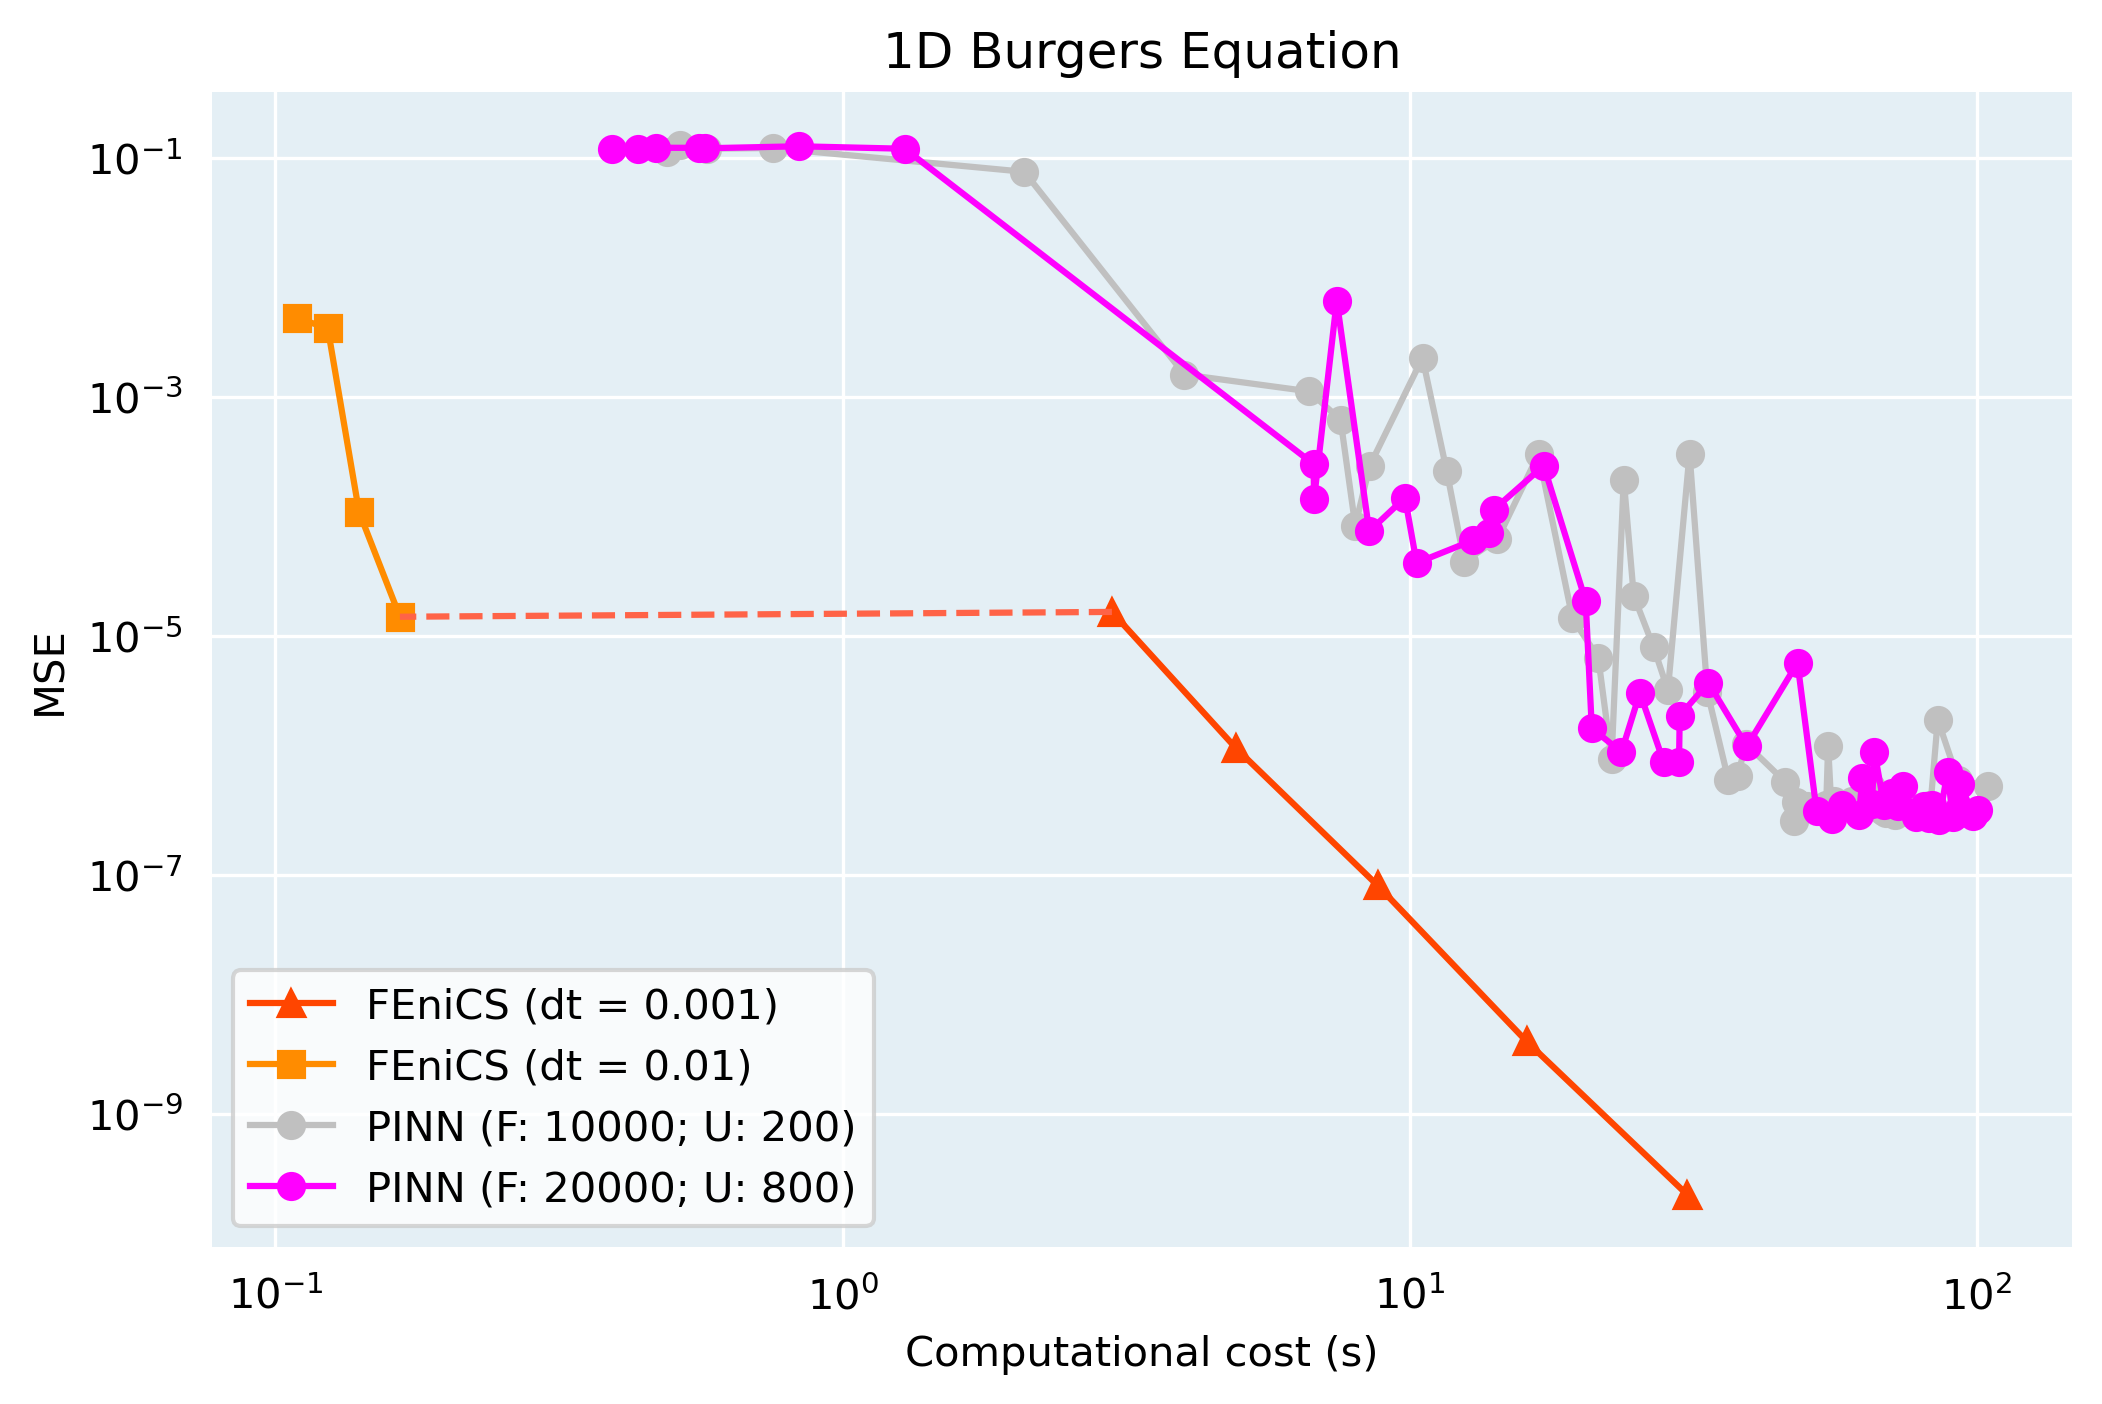

In [7]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

# Create FEniCS data
times_fenics = [59.9866251945495,16.0761799812316,4.94502711296081,2.04935121536254,0.935578823,0.319884539,0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics = [1.37E-11,4.04E-09,1.14E-06,1.44E-05,1.97E-05,2.59E-05,1.44E-05,0.000108454,0.00372555,0.004554599]
labels_fenics = ['n = 8193, dt = 0.001','e_num/dt = 2049000','e_num/dt = 513000','e_num/dt = 129000','e_num/dt = 33000','e_num/dt = 9000','e_num/dt = 102500','e_num/dt = 25700','e_num/dt = 6500','e_num/dt=3300','e_num/dt = 1700','e_num/dt = 500']
markers_fenics = ['^','^','^','^','^','^','s','s','s','s','^','h','8','>','D','X','H','o','s','s','s']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold']
#for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    #ax.scatter(x, y, color=color, marker=shape,label=label)
#ax.plot(times_fenics[0:6],mse_fenics[0:6],label="FEniCS (dt = 0.001)",color='orangered',marker='^')
#ax.plot(times_fenics[6:],mse_fenics[6:],label="FEniCS (dt = 0.01)",color='darkorange',marker='s')

times_fenics_001 = [30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526]
mse_fenics_001 = [2.11E-10,4.04E-09,8.14E-08,1.14E-06,1.58E-05]
n_elements_001 = [4097,2049,1025,513,257]

times_fenics_01 = [0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics_01 = [1.44E-05,0.000108454,0.00372555,0.004554599]
n_elements_01 = [65,33,17,5]

ax.plot(times_fenics_001,mse_fenics_001,label="FEniCS (dt = 0.001)",color='orangered',marker='^')
ax.plot(times_fenics_01,mse_fenics_01,label="FEniCS (dt = 0.01)",color='darkorange',marker='s')
ax.plot([2.98526,0.165743112564086],[1.58E-05,1.44E-05],color='tomato',linestyle='--')


load = np.load('Data_diff_architectures/vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN (F: 10000; U: 200)',color='silver',marker='o')

load = np.load('Data_diff_train/vanilla_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN (F: 20000; U: 800)',color='fuchsia',marker='o')
# 8 x 40 PINN, 20000 domain, 400 boundary 400 ic

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')

load = np.load('gPINN_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o', alpha=0.6)

load = np.load('2vanilla_times_mses_rar_1000at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (1000)',color='black',marker='o')

load = np.load('2vanilla_times_mses_rar_500at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (500)',color='yellow',marker='o')

load = np.load('2vanilla_times_mses_rar_100at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (40 evals)',color='teal',marker='o',alpha=0.6)

load = np.load('2vanilla_times_mses_rar_40at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (40)',color='purple',marker='o')

ax.set_xlabel('Computational cost (s)')


#############################################
    
    
ax.legend()

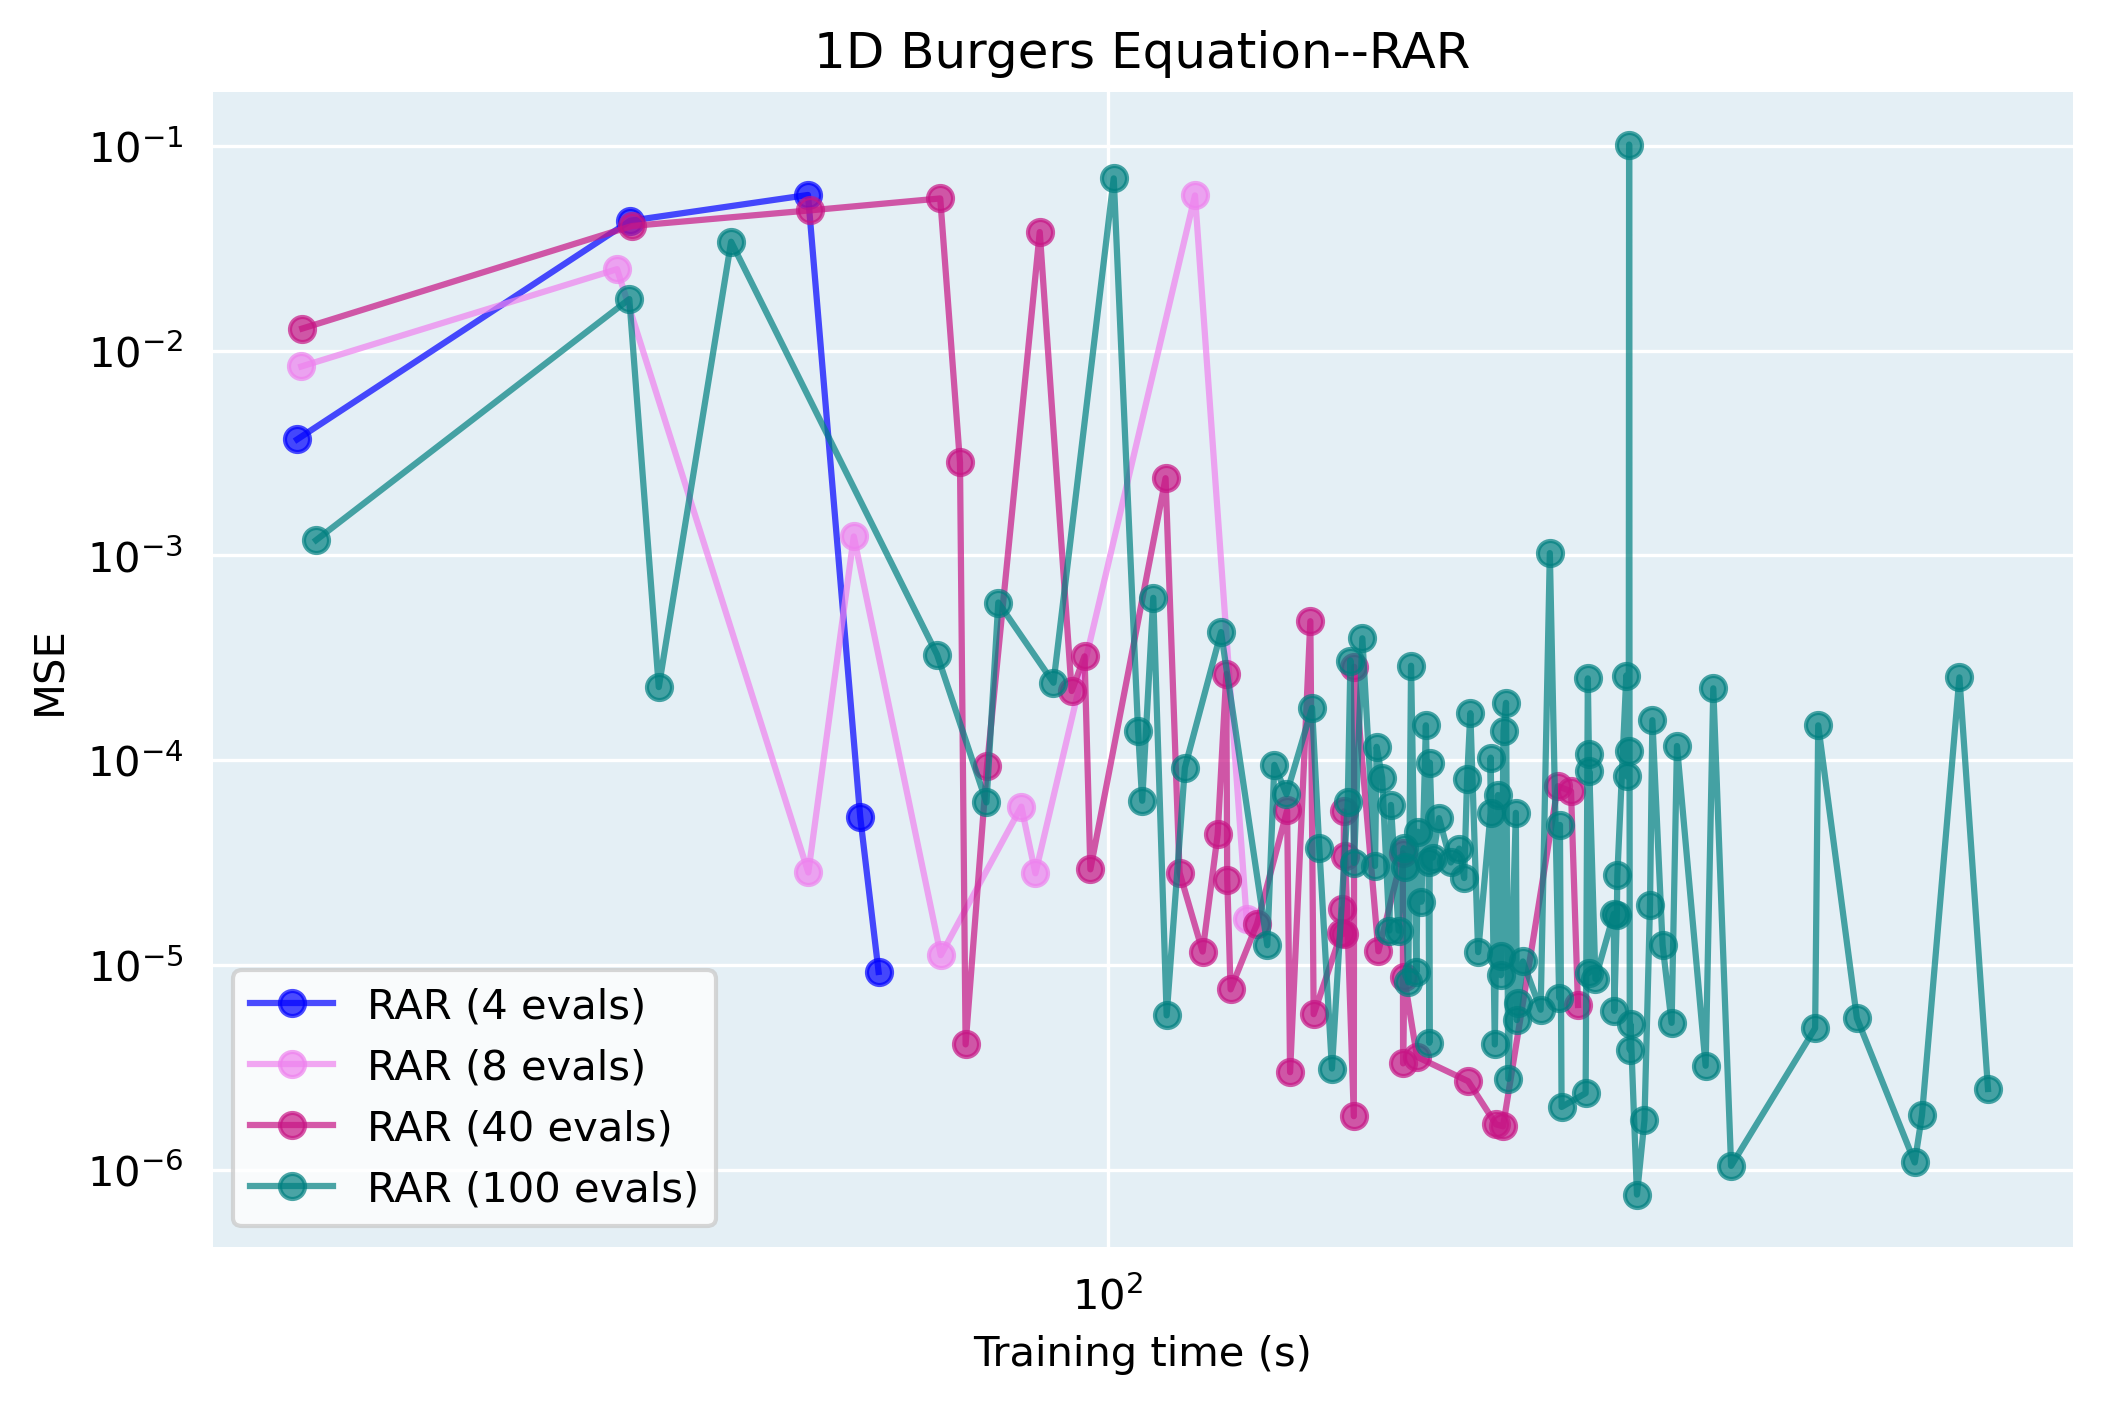

In [55]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

# Create FEniCS data
times_fenics = [59.9866251945495,16.0761799812316,4.94502711296081,2.04935121536254,0.935578823,0.319884539,0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics = [1.37E-11,4.04E-09,1.14E-06,1.44E-05,1.97E-05,2.59E-05,1.44E-05,0.000108454,0.00372555,0.004554599]
labels_fenics = ['n = 8193, dt = 0.001','e_num/dt = 2049000','e_num/dt = 513000','e_num/dt = 129000','e_num/dt = 33000','e_num/dt = 9000','e_num/dt = 102500','e_num/dt = 25700','e_num/dt = 6500','e_num/dt=3300','e_num/dt = 1700','e_num/dt = 500']
markers_fenics = ['^','^','^','^','^','^','s','s','s','s','^','h','8','>','D','X','H','o','s','s','s']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold']
#for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    #ax.scatter(x, y, color=color, marker=shape,label=label)
#ax.plot(times_fenics[0:6],mse_fenics[0:6],label="FEniCS (dt = 0.001)",color='orangered',marker='^')
#ax.plot(times_fenics[6:],mse_fenics[6:],label="FEniCS (dt = 0.01)",color='darkorange',marker='s')

load = np.load('Data_diff_train/vanilla_times_mses_5000nf50nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN (F: 5000, B: 100)',color='pink',marker='o',alpha=0.7)


load = np.load('Data_diff_train/vanilla_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN (F: 20000, B: 800)',color='fuchsia',marker='o')
# 8 x 40 PINN, 20000 domain, 400 boundary 400 ic

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')

load = np.load('gPINN_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')

load = np.load('2vanilla_times_mses_rar_1000at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='RAR (4 evals)',color='blue',marker='o',alpha=0.7)

load = np.load('2vanilla_times_mses_rar_500at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='RAR (8 evals)',color='violet',marker='o',alpha=0.7)

load = np.load('2vanilla_times_mses_rar_100at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (40 evals)',color='mediumvioletred',marker='o',alpha=0.7)

load = np.load('2vanilla_times_mses_rar_40at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (100 evals)',color='teal',marker='o',alpha=0.7)

ax.set_title('1D Burgers Equation--RAR')
#############################################
    
    
ax.legend()

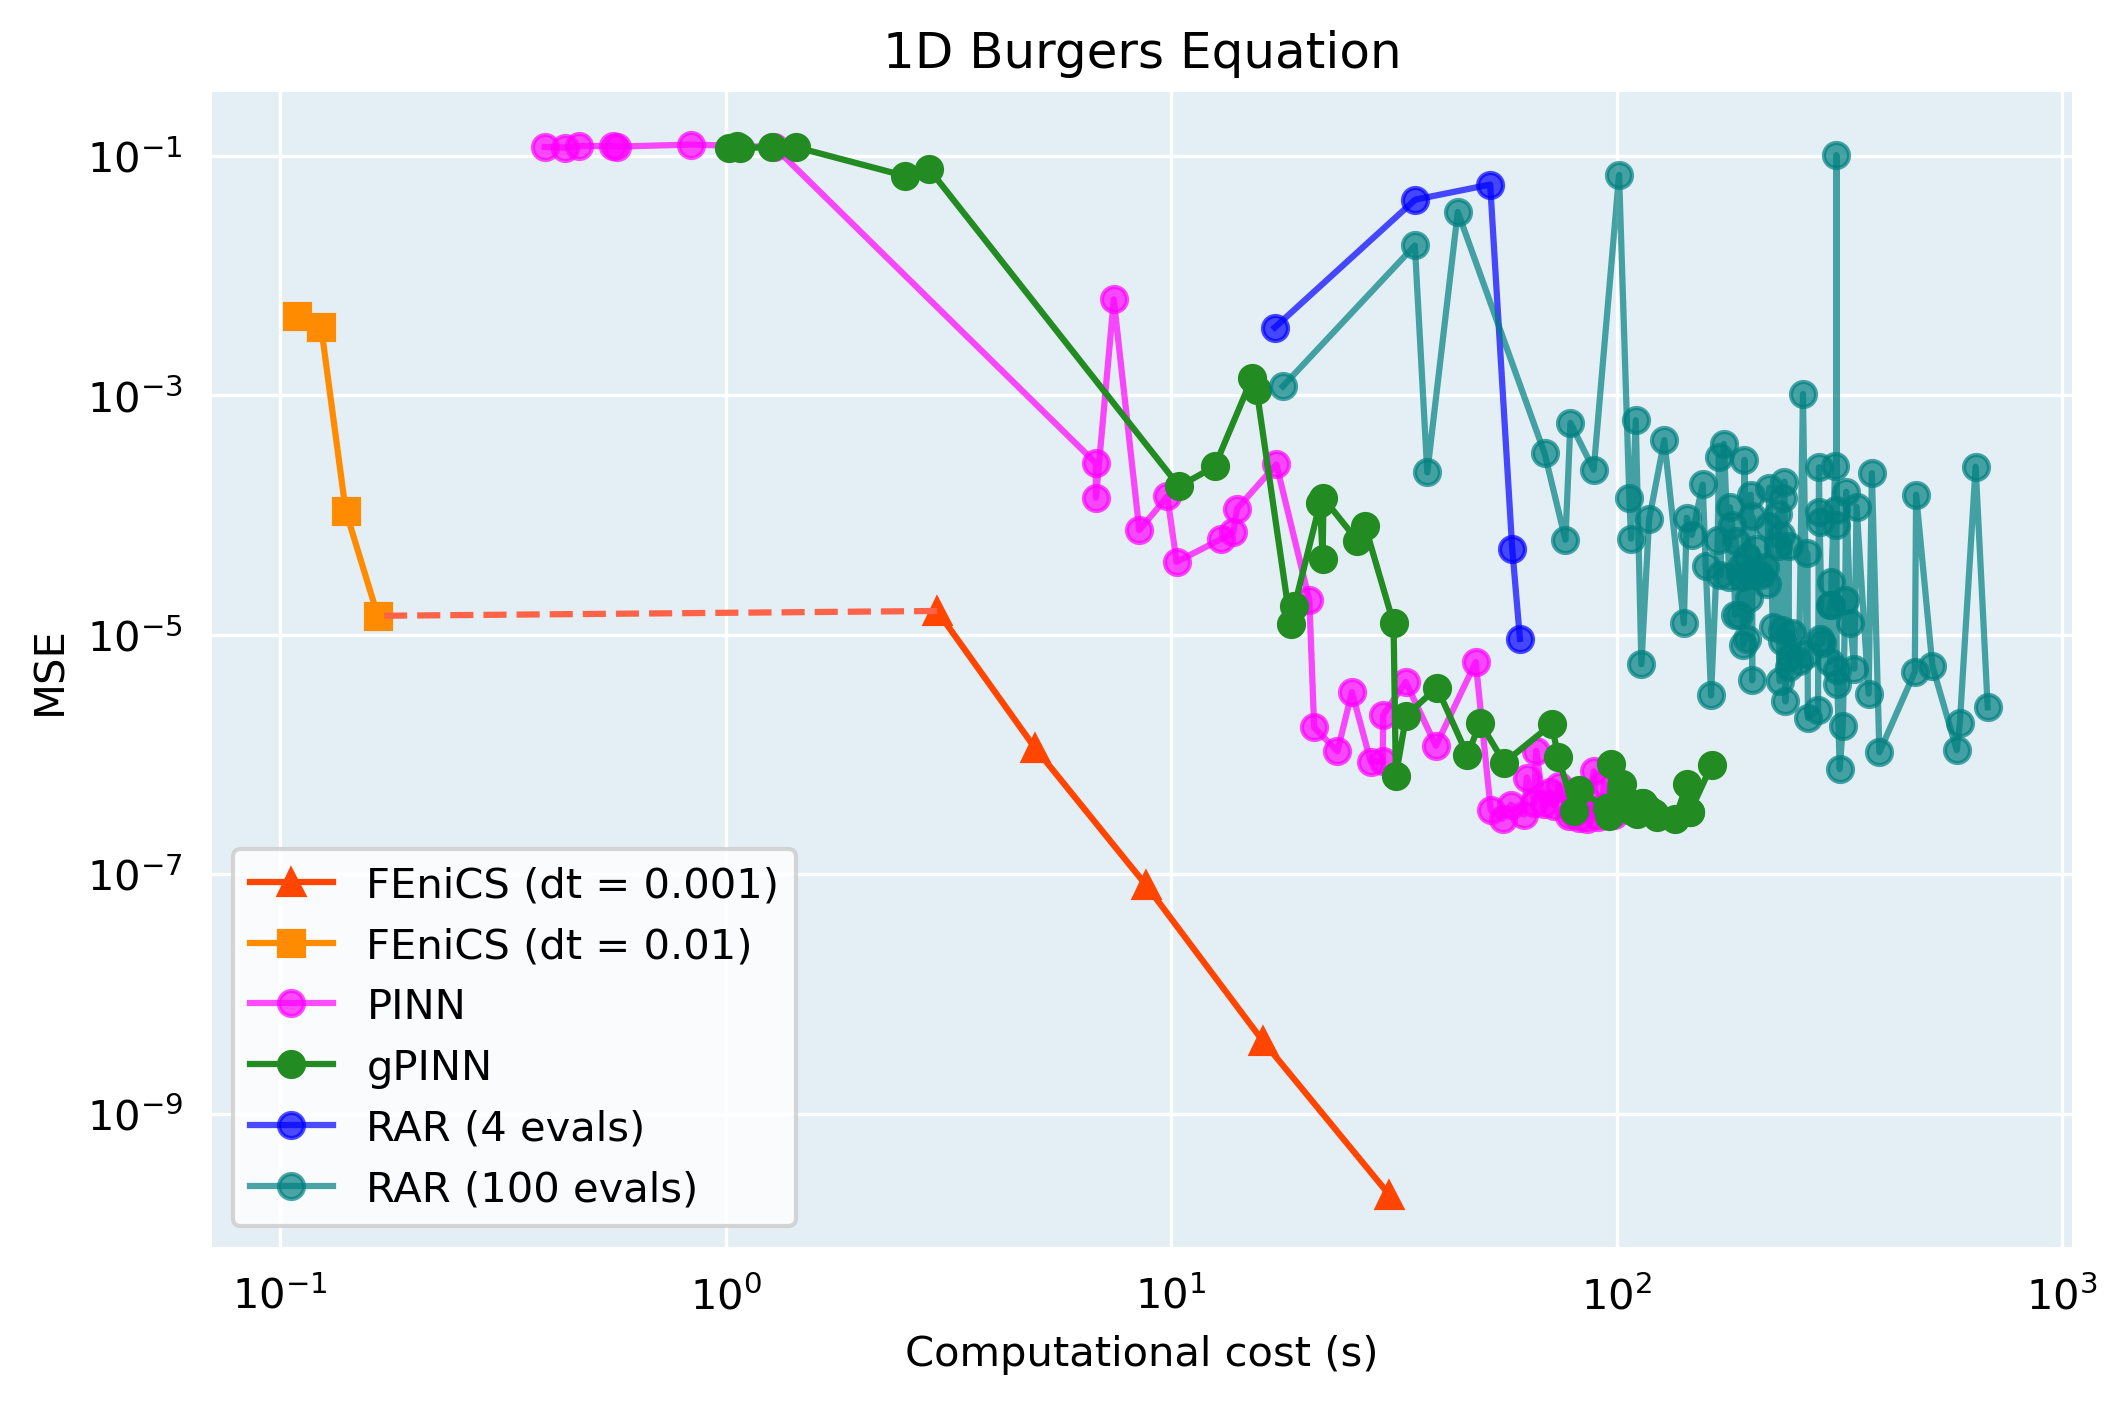

In [10]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

# Create FEniCS data
times_fenics = [59.9866251945495,16.0761799812316,4.94502711296081,2.04935121536254,0.935578823,0.319884539,0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics = [1.37E-11,4.04E-09,1.14E-06,1.44E-05,1.97E-05,2.59E-05,1.44E-05,0.000108454,0.00372555,0.004554599]
labels_fenics = ['n = 8193, dt = 0.001','e_num/dt = 2049000','e_num/dt = 513000','e_num/dt = 129000','e_num/dt = 33000','e_num/dt = 9000','e_num/dt = 102500','e_num/dt = 25700','e_num/dt = 6500','e_num/dt=3300','e_num/dt = 1700','e_num/dt = 500']
markers_fenics = ['^','^','^','^','^','^','s','s','s','s','^','h','8','>','D','X','H','o','s','s','s']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold']
#for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    #ax.scatter(x, y, color=color, marker=shape,label=label)
#ax.plot(times_fenics[0:6],mse_fenics[0:6],label="FEniCS (dt = 0.001)",color='orangered',marker='^')
#ax.plot(times_fenics[6:],mse_fenics[6:],label="FEniCS (dt = 0.01)",color='darkorange',marker='s')


times_fenics_001 = [30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526]
mse_fenics_001 = [2.11E-10,4.04E-09,8.14E-08,1.14E-06,1.58E-05]
n_elements_001 = [4097,2049,1025,513,257]

times_fenics_01 = [0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics_01 = [1.44E-05,0.000108454,0.00372555,0.004554599]
n_elements_01 = [65,33,17,5]

ax.plot(times_fenics_001,mse_fenics_001,label="FEniCS (dt = 0.001)",color='orangered',marker='^')
ax.plot(times_fenics_01,mse_fenics_01,label="FEniCS (dt = 0.01)",color='darkorange',marker='s')
ax.plot([2.98526,0.165743112564086],[1.58E-05,1.44E-05],color='tomato',linestyle='--')


load = np.load('Data_diff_train/vanilla_times_mses_5000nf50nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='PINN (F: 5000, U: 100)',color='fuchsia',marker='o',alpha=0.9)


load = np.load('Data_diff_train/vanilla_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN',color='fuchsia',marker='o',alpha=0.7)
# 8 x 40 PINN, 20000 domain, 400 boundary 400 ic

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')

load = np.load('gPINN_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')

load = np.load('2vanilla_times_mses_rar_1000at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='RAR (4 evals)',color='blue',marker='o',alpha=0.7)

load = np.load('2vanilla_times_mses_rar_500at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (8 evals)',color='violet',marker='o',alpha=0.7)

load = np.load('2vanilla_times_mses_rar_100at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='RAR (40 evals)',color='mediumvioletred',marker='o',alpha=0.7)

load = np.load('2vanilla_times_mses_rar_40at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='RAR (100 evals)',color='teal',marker='o',alpha=0.7)

ax.set_xlabel('Computational cost (s)')
#############################################
    
    
ax.legend()

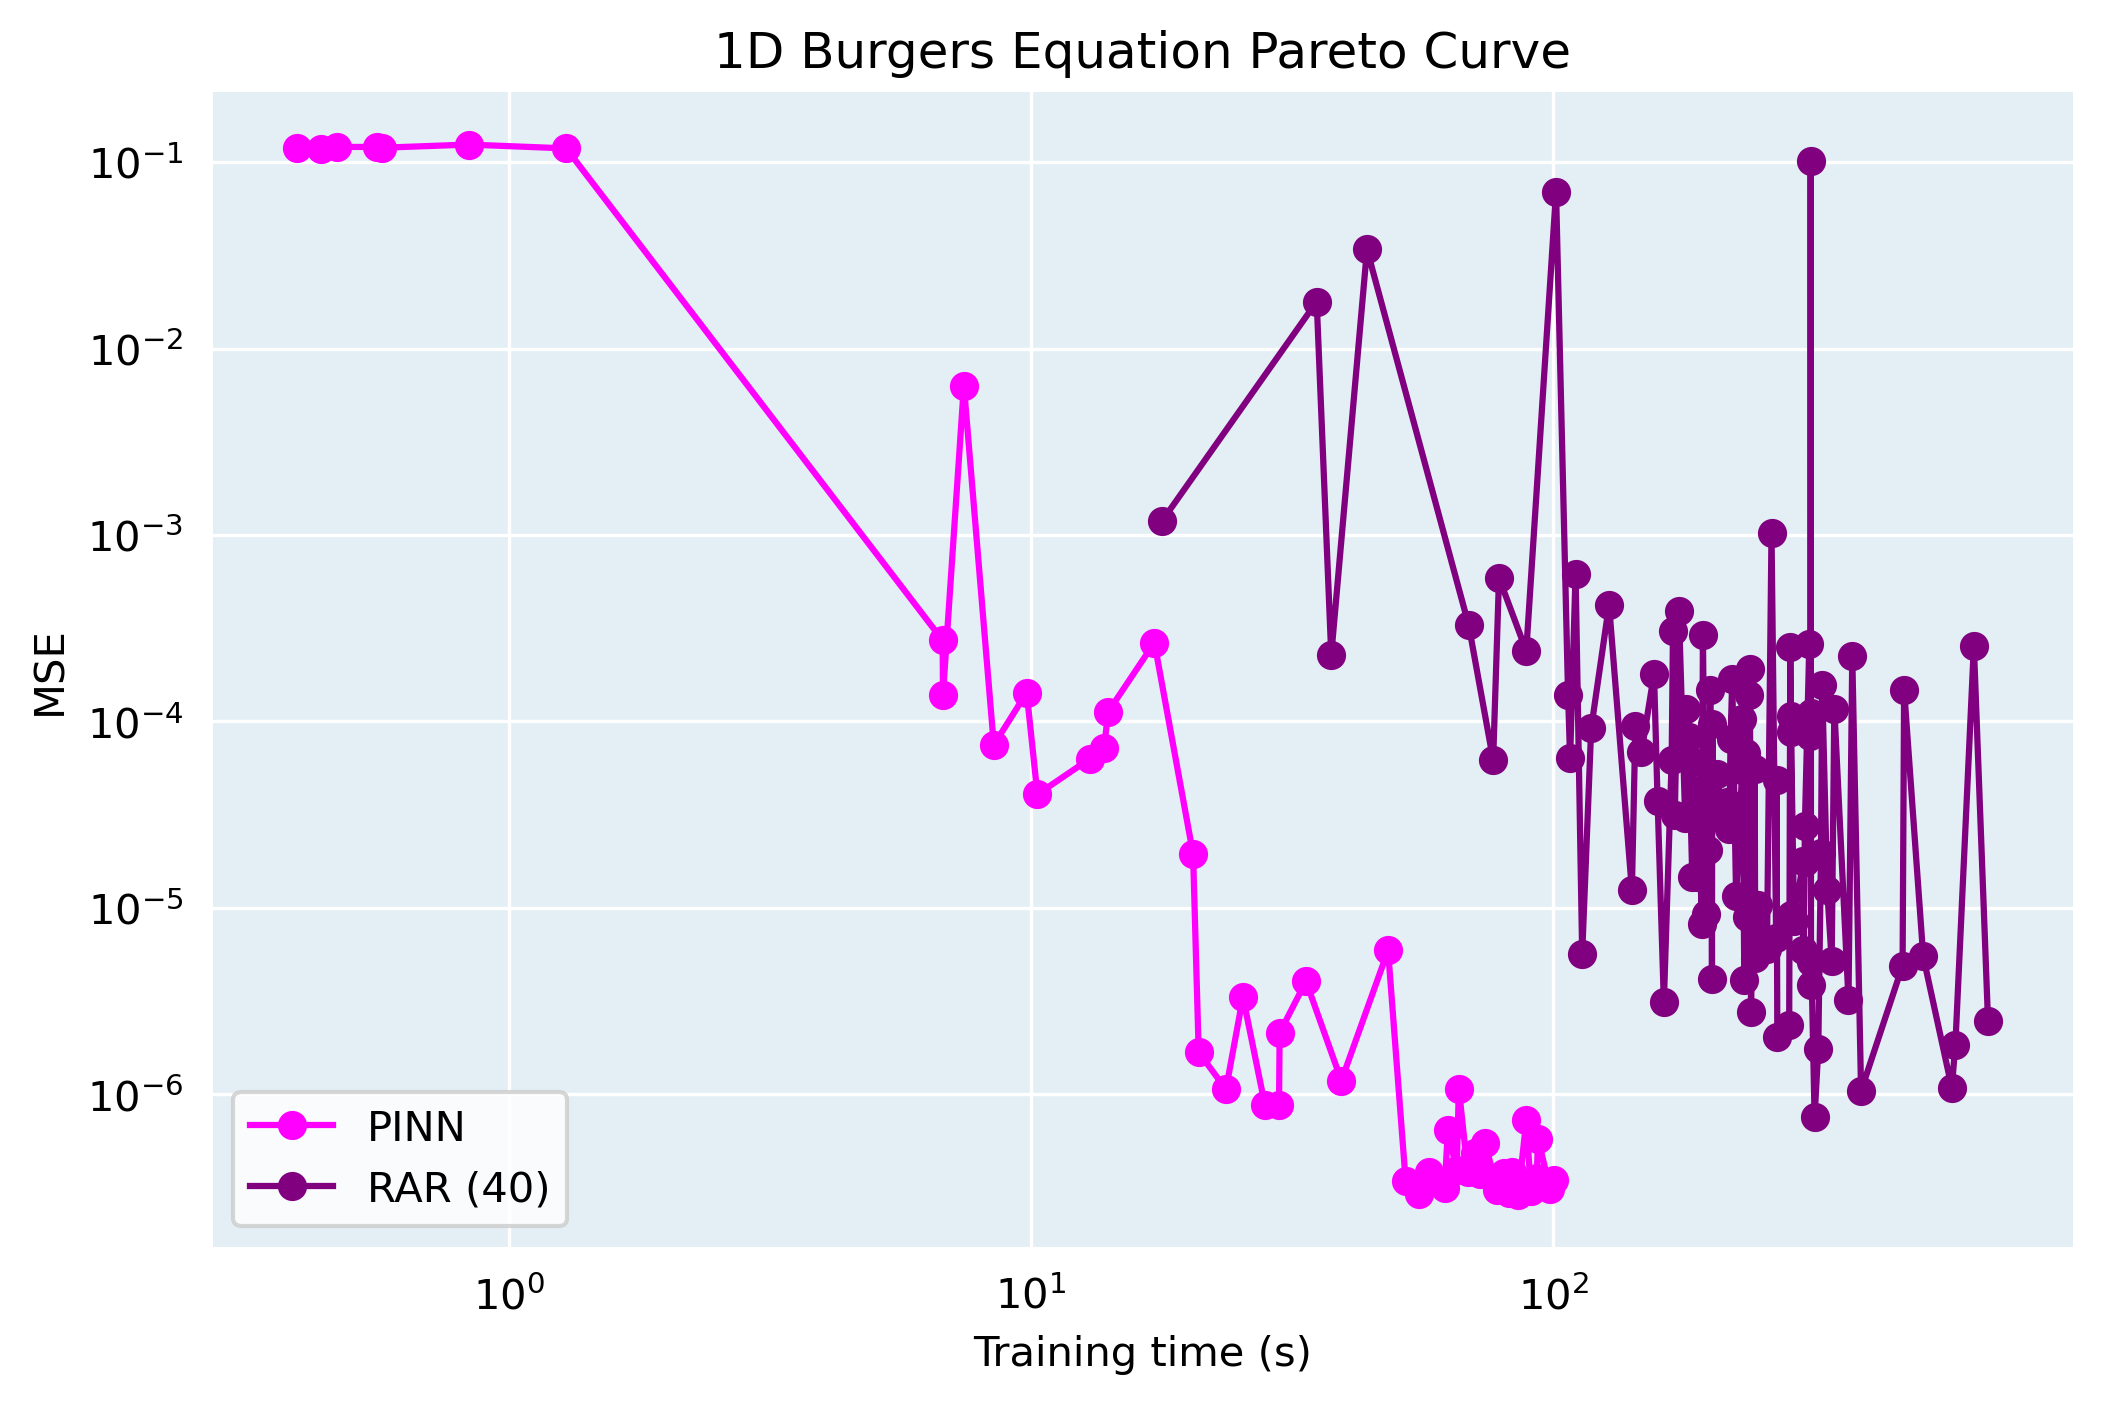

In [98]:
fig,ax=create_plot()

load = np.load('Data_diff_train/vanilla_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN',color='fuchsia',marker='o')
# 8 x 40 PINN, 20000 domain, 400 boundary 400 ic

load = np.load('2vanilla_times_mses_rar_40at_a_time.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='RAR (40)',color='purple',marker='o')

ax.legend()

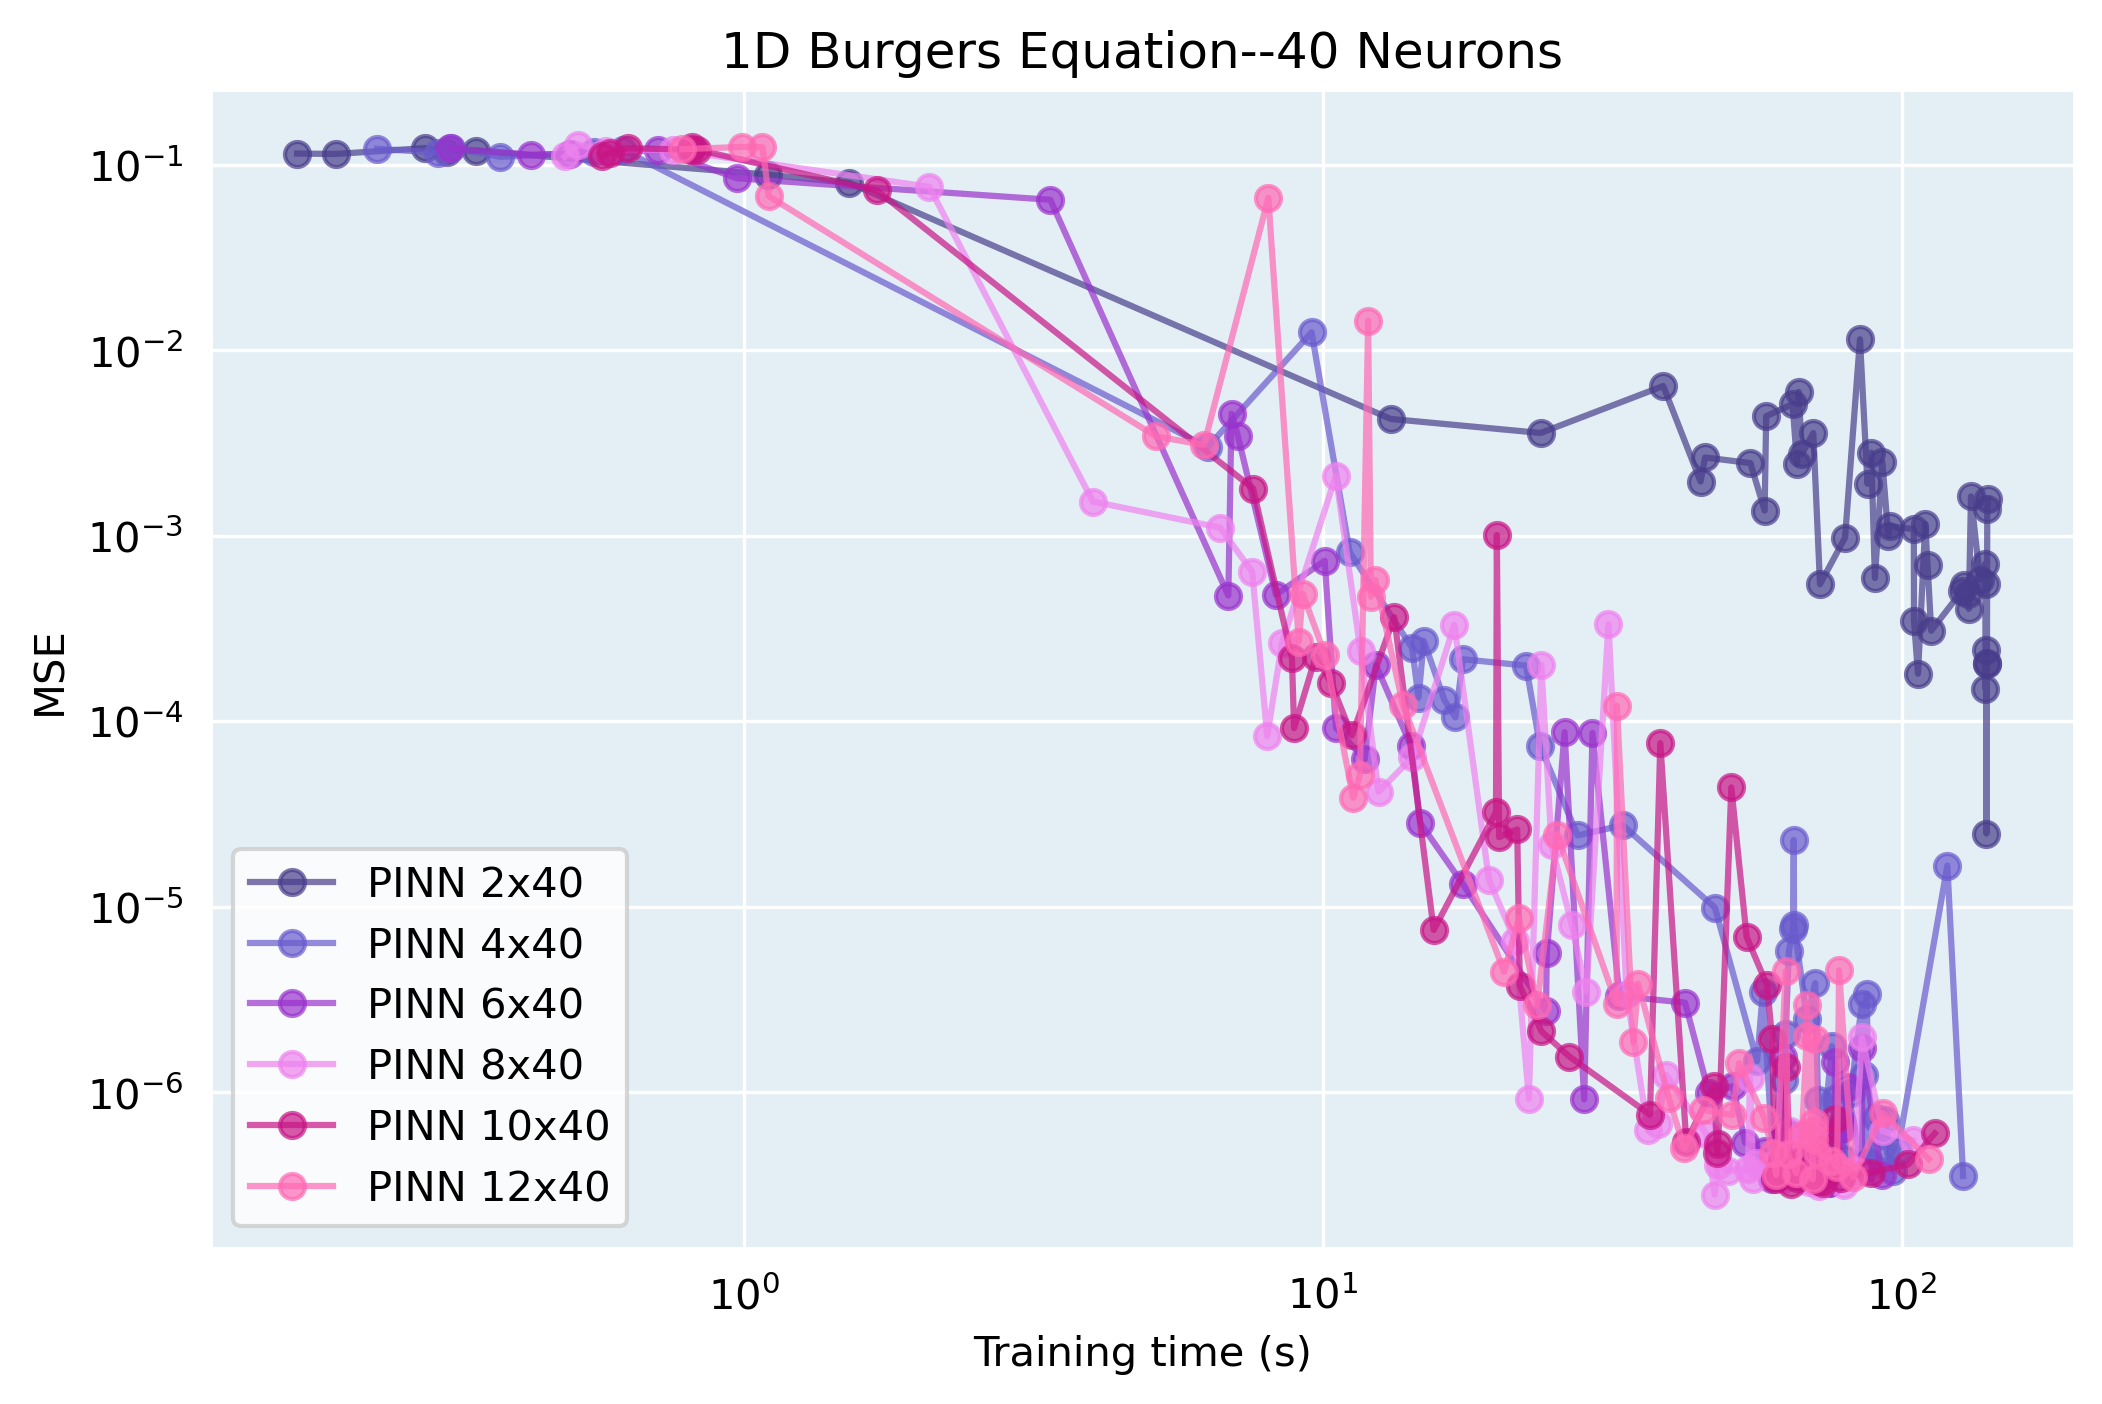

In [38]:
# WITH OTHER TIMESTEP

fig,ax=create_plot()

times_fenics_001 = [30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526]
mse_fenics_001 = [2.11E-10,4.04E-09,8.14E-08,1.14E-06,1.58E-05]
n_elements_001 = [4097,2049,1025,513,257]

times_fenics_01 = [0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics_01 = [1.44E-05,0.000108454,0.00372555,0.004554599]
n_elements_01 = [65,33,17,5]

#ax.plot(times_fenics_001,mse_fenics_001,label="FEniCS (dt = 0.001)",color='orangered',marker='^')
#ax.plot(times_fenics_01,mse_fenics_01,label="FEniCS (dt = 0.01)",color='darkorange',marker='s')
#ax.plot([2.98526,0.165743112564086],[1.58E-05,1.44E-05],color='tomato',linestyle='--')


######### NEURON, LAYERS VARIANTS #########
load = np.load('Data_diff_architectures/vanilla_times_mses_2x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 2x40',color='darkslateblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_4x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 4x40',color='slateblue',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_6x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 6x40',color='darkorchid',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x40',color='violet',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_10x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 10x40',color='mediumvioletred',marker='o',alpha=0.7)

load = np.load('Data_diff_architectures/vanilla_times_mses_12x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 12x40',color='hotpink',marker='o',alpha=0.7)


ax.set_xlabel("Training time (s)")
ax.set_title("1D Burgers Equation--40 Neurons")
#############################################
    
#    COMMENTS: 2 layers not enough. zoom in on others
    
#############################################
ax.legend()

1.5287477128895715


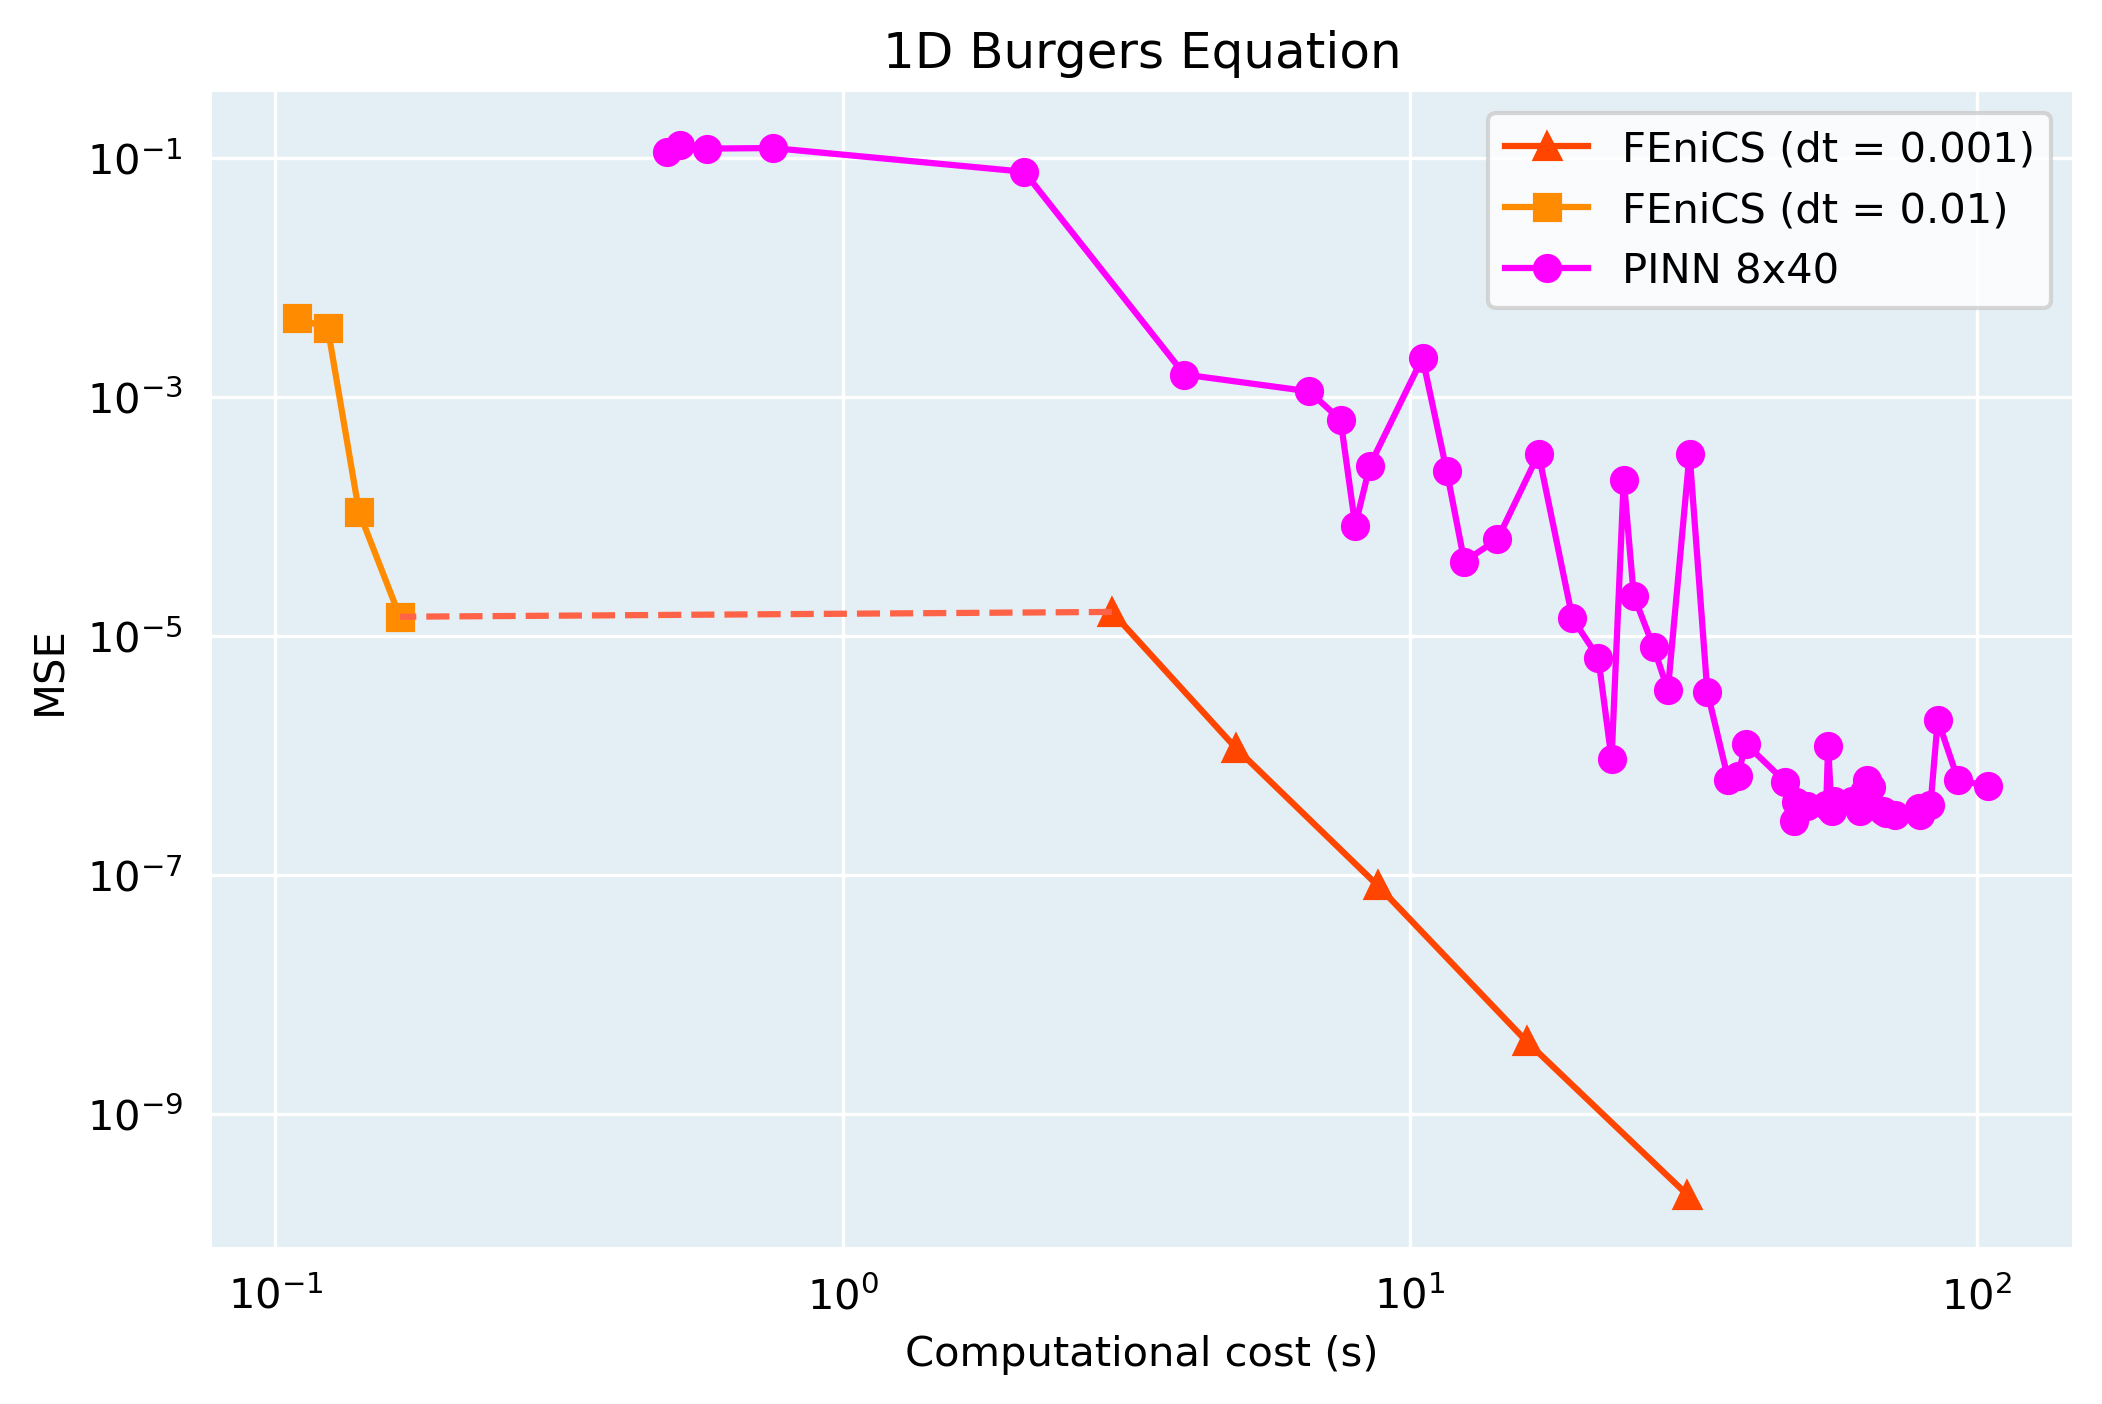

In [4]:
## FINAL

fig,ax = create_plot()

times_fenics_001 = [30.8553428649902,16.0761799812316,8.780892848968506,4.94502711296081,2.98526]
mse_fenics_001 = [2.11E-10,4.04E-09,8.14E-08,1.14E-06,1.58E-05]
n_elements_001 = [4097,2049,1025,513,257]

times_fenics_01 = [0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics_01 = [1.44E-05,0.000108454,0.00372555,0.004554599]
n_elements_01 = [65,33,17,5]

ax.plot(times_fenics_001,mse_fenics_001,label="FEniCS (dt = 0.001)",color='orangered',marker='^')
ax.plot(times_fenics_01,mse_fenics_01,label="FEniCS (dt = 0.01)",color='darkorange',marker='s')
ax.plot([2.98526,0.165743112564086],[1.58E-05,1.44E-05],color='tomato',linestyle='--')

load = np.load('Data_diff_architectures/vanilla_times_mses_8x40.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN 8x40',color='fuchsia',marker='o') #  (f = 10000, b = 200)

load = np.load('Data_diff_train/vanilla_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
mean1 = np.mean(times)
#ax.axvline(np.mean(times),color='fuchsia',alpha=0.7)
#ax.plot(times[time_inds],mses[time_inds],label='PINN',color='fuchsia',marker='o')

load = np.load('gPINN_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
mean2 = np.mean(times)
#ax.axvline(np.mean(times),color='forestgreen',alpha=0.7)
#ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')

ax.set_xlabel("Computational cost (s)")
#ax.set_title("1D Burgers Equation--gPINN")

#ax.set_xscale("linear")
ax.legend()#framealpha=0)
print(mean2/mean1)